## Import dataset

In [1]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('795813_1365687_bundle_archive/input_bcell.csv')

dataset.head()

parent_protein_id                                        protein_seq  \
0            A2T3T0  MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...   
1            F0V2I4  MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...   
2            O75508  MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...   
3            O84462  MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...   
4            P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...   

   start_position  end_position peptide_seq  chou_fasman  emini  \
0             161           165       SASFT        1.016  0.703   
1             251           255       LCLKI        0.770  0.179   
2             145           149       AHRET        0.852  3.427   
3             152           156       SNYDD        1.410  2.548   
4              85            89       DGTYR        1.214  1.908   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.018    2.22           5.810364     0.103275   
1                1.199   -3.86           6.210876     0.065476   
2                0.960    4.28           8.223938     0.091787   
3                0.936    6.32           4.237976     0.044776   
4                0.937    4.64           6.867493     0.103846   

   hydrophobicity  stability  target  
0       -0.143829  40.273300       1  
1       -0.036905  24.998512       1  
2        0.879227  27.863333       1  
3       -0.521393  30.765373       1  
4       -0.578846  21.684615       1

## Check columns

In [2]:
dataset.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

## Search for null values

In [3]:
dataset.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

## Search for categorical columns

In [4]:
for col in dataset.columns:
    x = dataset[col].unique()
    if len(x) < 20:
        print(f"{col}: {x}")

target: [1 0]


## Remove irrelevant features and get input data

In [5]:
X = dataset.drop(columns=['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'])
X.head()

start_position  end_position  chou_fasman  emini  kolaskar_tongaonkar  \
0             161           165        1.016  0.703                1.018   
1             251           255        0.770  0.179                1.199   
2             145           149        0.852  3.427                0.960   
3             152           156        1.410  2.548                0.936   
4              85            89        1.214  1.908                0.937   

   parker  isoelectric_point  aromaticity  hydrophobicity  stability  
0    2.22           5.810364     0.103275       -0.143829  40.273300  
1   -3.86           6.210876     0.065476       -0.036905  24.998512  
2    4.28           8.223938     0.091787        0.879227  27.863333  
3    6.32           4.237976     0.044776       -0.521393  30.765373  
4    4.64           6.867493     0.103846       -0.578846  21.684615

## Get output data

In [6]:
y = dataset['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Apply feature scaling

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X

array([[-0.3863855 , -0.40451394,  0.17066955, ...,  1.06912809,
         0.66463514, -0.20564963],
       [-0.13195355, -0.15007612, -1.80099114, ..., -0.39782531,
         0.93560006, -1.12130643],
       [-0.43161785, -0.44974733, -1.14377091, ...,  0.62331337,
         3.25724616, -0.9495729 ],
       ...,
       [-0.3072289 , -0.29708464, -1.39223222, ..., -0.15555999,
        -0.7475483 ,  0.19010766],
       [ 3.33962909,  3.34985741,  0.59545824, ..., -1.21820059,
        -0.67131514, -0.8518031 ],
       [ 3.81456874,  3.824808  , -0.26213401, ..., -1.21820059,
        -0.67131514, -0.8518031 ]])

## Split data in training and test sets

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## Prepare the ANN model structure

In [9]:
# Imports
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# Function that build the structure of the model
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

## Prepare grid search to search best hyperparameters for ANN 

### AND... train all ANN

In [10]:
# create the model
classifier = KerasClassifier(build_fn = build_classifier)

# define parameters (grid) for grid search
#   fit parameters: batch size, epochs
#   compile parameters: optimizer
parameters = {'batch_size': [10, 50],
              'epochs': [300, 500],
              'optimizer': ['adam', 'SGD']}

# define the gridsearch
    # cv = number of trainings to apply cross validation
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

# fit all gridsearch combinations
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/300
1166/1166 [==============================] - 1s 1ms/step - loss: 0.5662 - accuracy: 0.7278
Epoch 2/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.5530 - accuracy: 0.7277
Epoch 3/300
1166/1166 [==============================] - 1s 852us/step - loss: 0.5520 - accuracy: 0.7277
Epoch 4/300
1166/1166 [==============================] - 1s 846us/step - loss: 0.5508 - accuracy: 0.7277
Epoch 5/300
1166/1166 [==============================] - 1s 855us/step - loss: 0.5493 - accuracy: 0.7267
Epoch 6/300
1166/1166 [==============================] - 1s 852us/step - loss: 0.5485 - accuracy: 0.7303
Epoch 7/300
1166/1166 [==============================] - 1s 852us/step - loss: 0.5487 - accuracy: 0.7315
Epoch 8/300
1166/1166 [==============================] - 1s 852us/step - loss: 0.5477 - accuracy: 0.7358
Epoch 9/300
1166/1166 [==============================] - 1s 847us/step - loss: 0.5452 - accuracy: 0.7363
Epoch 10/300
1166/1166 [==============================] -

Epoch 78/300
1166/1166 [==============================] - 1s 889us/step - loss: 0.4041 - accuracy: 0.8173
Epoch 79/300
1166/1166 [==============================] - 1s 906us/step - loss: 0.4036 - accuracy: 0.8162
Epoch 80/300
1166/1166 [==============================] - 1s 906us/step - loss: 0.4009 - accuracy: 0.8167
Epoch 81/300
1166/1166 [==============================] - 1s 898us/step - loss: 0.4002 - accuracy: 0.8196
Epoch 82/300
1166/1166 [==============================] - 1s 875us/step - loss: 0.4007 - accuracy: 0.8192
Epoch 83/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.3979 - accuracy: 0.8190
Epoch 84/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.3968 - accuracy: 0.8237
Epoch 85/300
1166/1166 [==============================] - 1s 855us/step - loss: 0.3971 - accuracy: 0.8206
Epoch 86/300
1166/1166 [==============================] - 1s 864us/step - loss: 0.3944 - accuracy: 0.8206
Epoch 87/300
1166/1166 [======================

1166/1166 [==============================] - 1s 931us/step - loss: 0.3354 - accuracy: 0.8520
Epoch 231/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.3332 - accuracy: 0.8514
Epoch 232/300
1166/1166 [==============================] - 1s 929us/step - loss: 0.3330 - accuracy: 0.8521
Epoch 233/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3341 - accuracy: 0.8510
Epoch 234/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.3347 - accuracy: 0.8525
Epoch 235/300
1166/1166 [==============================] - 1s 927us/step - loss: 0.3322 - accuracy: 0.8532
Epoch 236/300
1166/1166 [==============================] - 1s 930us/step - loss: 0.3353 - accuracy: 0.8521
Epoch 237/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.3326 - accuracy: 0.8545
Epoch 238/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.3339 - accuracy: 0.8526
Epoch 239/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 924us/step - loss: 0.4013 - accuracy: 0.8173
Epoch 79/300
1166/1166 [==============================] - 1s 915us/step - loss: 0.3983 - accuracy: 0.8188
Epoch 80/300
1166/1166 [==============================] - 1s 917us/step - loss: 0.3977 - accuracy: 0.8183
Epoch 81/300
1166/1166 [==============================] - 1s 918us/step - loss: 0.3968 - accuracy: 0.8217
Epoch 82/300
1166/1166 [==============================] - 1s 921us/step - loss: 0.3969 - accuracy: 0.8181
Epoch 83/300
1166/1166 [==============================] - 1s 917us/step - loss: 0.3952 - accuracy: 0.8201
Epoch 84/300
1166/1166 [==============================] - 1s 917us/step - loss: 0.3968 - accuracy: 0.8191
Epoch 85/300
1166/1166 [==============================] - 1s 920us/step - loss: 0.3929 - accuracy: 0.8245
Epoch 86/300
1166/1166 [==============================] - 1s 920us/step - loss: 0.3916 - accuracy: 0.8238
Epoch 87/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 930us/step - loss: 0.3290 - accuracy: 0.8528
Epoch 231/300
1166/1166 [==============================] - 1s 920us/step - loss: 0.3288 - accuracy: 0.8552
Epoch 232/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3296 - accuracy: 0.8540
Epoch 233/300
1166/1166 [==============================] - 1s 921us/step - loss: 0.3293 - accuracy: 0.8523
Epoch 234/300
1166/1166 [==============================] - 1s 915us/step - loss: 0.3278 - accuracy: 0.8537
Epoch 235/300
1166/1166 [==============================] - 1s 925us/step - loss: 0.3291 - accuracy: 0.8536
Epoch 236/300
1166/1166 [==============================] - 1s 919us/step - loss: 0.3258 - accuracy: 0.8543
Epoch 237/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.3276 - accuracy: 0.8556
Epoch 238/300
1166/1166 [==============================] - 1s 924us/step - loss: 0.3279 - accuracy: 0.8541
Epoch 239/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 838us/step - loss: 0.3755 - accuracy: 0.8300
Epoch 84/300
1166/1166 [==============================] - 1s 836us/step - loss: 0.3755 - accuracy: 0.8296
Epoch 85/300
1166/1166 [==============================] - 1s 833us/step - loss: 0.3743 - accuracy: 0.8321
Epoch 86/300
1166/1166 [==============================] - 1s 840us/step - loss: 0.3730 - accuracy: 0.8327
Epoch 87/300
1166/1166 [==============================] - 1s 842us/step - loss: 0.3731 - accuracy: 0.8315
Epoch 88/300
1166/1166 [==============================] - 1s 838us/step - loss: 0.3696 - accuracy: 0.8351
Epoch 89/300
1166/1166 [==============================] - 1s 835us/step - loss: 0.3725 - accuracy: 0.8327
Epoch 90/300
1166/1166 [==============================] - 1s 842us/step - loss: 0.3735 - accuracy: 0.8325
Epoch 91/300
1166/1166 [==============================] - 1s 843us/step - loss: 0.3703 - accuracy: 0.8358
Epoch 92/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 893us/step - loss: 0.3170 - accuracy: 0.8642
Epoch 236/300
1166/1166 [==============================] - 1s 888us/step - loss: 0.3130 - accuracy: 0.8632
Epoch 237/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.3155 - accuracy: 0.8632
Epoch 238/300
1166/1166 [==============================] - 1s 907us/step - loss: 0.3154 - accuracy: 0.8619
Epoch 239/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.3162 - accuracy: 0.8651
Epoch 240/300
1166/1166 [==============================] - 1s 860us/step - loss: 0.3174 - accuracy: 0.8618
Epoch 241/300
1166/1166 [==============================] - 1s 856us/step - loss: 0.3165 - accuracy: 0.8606
Epoch 242/300
1166/1166 [==============================] - 1s 853us/step - loss: 0.3129 - accuracy: 0.8640
Epoch 243/300
1166/1166 [==============================] - 1s 855us/step - loss: 0.3130 - accuracy: 0.8640
Epoch 244/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 920us/step - loss: 0.3914 - accuracy: 0.8189
Epoch 89/300
1166/1166 [==============================] - 1s 922us/step - loss: 0.3907 - accuracy: 0.8202
Epoch 90/300
1166/1166 [==============================] - 1s 914us/step - loss: 0.3892 - accuracy: 0.8212
Epoch 91/300
1166/1166 [==============================] - 1s 922us/step - loss: 0.3898 - accuracy: 0.8186
Epoch 92/300
1166/1166 [==============================] - 1s 951us/step - loss: 0.3865 - accuracy: 0.8256
Epoch 93/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.3855 - accuracy: 0.8249
Epoch 94/300
1166/1166 [==============================] - 1s 912us/step - loss: 0.3853 - accuracy: 0.8227
Epoch 95/300
1166/1166 [==============================] - 1s 915us/step - loss: 0.3838 - accuracy: 0.8231
Epoch 96/300
1166/1166 [==============================] - 1s 909us/step - loss: 0.3836 - accuracy: 0.8249
Epoch 97/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 846us/step - loss: 0.3286 - accuracy: 0.8519
Epoch 241/300
1166/1166 [==============================] - 1s 843us/step - loss: 0.3297 - accuracy: 0.8547
Epoch 242/300
1166/1166 [==============================] - 1s 847us/step - loss: 0.3254 - accuracy: 0.8548
Epoch 243/300
1166/1166 [==============================] - 1s 846us/step - loss: 0.3281 - accuracy: 0.8562
Epoch 244/300
1166/1166 [==============================] - 1s 837us/step - loss: 0.3265 - accuracy: 0.8569
Epoch 245/300
1166/1166 [==============================] - 1s 840us/step - loss: 0.3285 - accuracy: 0.8555
Epoch 246/300
1166/1166 [==============================] - 1s 846us/step - loss: 0.3261 - accuracy: 0.8545
Epoch 247/300
1166/1166 [==============================] - 1s 836us/step - loss: 0.3283 - accuracy: 0.8577
Epoch 248/300
1166/1166 [==============================] - 1s 847us/step - loss: 0.3255 - accuracy: 0.8553
Epoch 249/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 847us/step - loss: 0.3896 - accuracy: 0.8223
Epoch 94/300
1166/1166 [==============================] - 1s 842us/step - loss: 0.3857 - accuracy: 0.8267
Epoch 95/300
1166/1166 [==============================] - 1s 834us/step - loss: 0.3846 - accuracy: 0.8291
Epoch 96/300
1166/1166 [==============================] - 1s 833us/step - loss: 0.3855 - accuracy: 0.8285
Epoch 97/300
1166/1166 [==============================] - 1s 840us/step - loss: 0.3851 - accuracy: 0.8296
Epoch 98/300
1166/1166 [==============================] - 1s 838us/step - loss: 0.3827 - accuracy: 0.8321
Epoch 99/300
1166/1166 [==============================] - 1s 840us/step - loss: 0.3837 - accuracy: 0.8299
Epoch 100/300
1166/1166 [==============================] - 1s 844us/step - loss: 0.3821 - accuracy: 0.8300
Epoch 101/300
1166/1166 [==============================] - 1s 832us/step - loss: 0.3823 - accuracy: 0.8297
Epoch 102/300
1166/1166 [==============================] 

1166/1166 [==============================] - 1s 926us/step - loss: 0.3300 - accuracy: 0.8565
Epoch 246/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3314 - accuracy: 0.8579
Epoch 247/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3293 - accuracy: 0.8569
Epoch 248/300
1166/1166 [==============================] - 1s 936us/step - loss: 0.3329 - accuracy: 0.8549
Epoch 249/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3297 - accuracy: 0.8575
Epoch 250/300
1166/1166 [==============================] - 1s 935us/step - loss: 0.3294 - accuracy: 0.8576
Epoch 251/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.3299 - accuracy: 0.8590
Epoch 252/300
1166/1166 [==============================] - 1s 934us/step - loss: 0.3289 - accuracy: 0.8591
Epoch 253/300
1166/1166 [==============================] - 1s 941us/step - loss: 0.3303 - accuracy: 0.8587
Epoch 254/300
1166/1166 [==========================

Epoch 98/300
1166/1166 [==============================] - 1s 906us/step - loss: 0.3752 - accuracy: 0.8302
Epoch 99/300
1166/1166 [==============================] - 1s 912us/step - loss: 0.3716 - accuracy: 0.8309
Epoch 100/300
1166/1166 [==============================] - 1s 910us/step - loss: 0.3722 - accuracy: 0.8305
Epoch 101/300
1166/1166 [==============================] - 1s 909us/step - loss: 0.3718 - accuracy: 0.8285
Epoch 102/300
1166/1166 [==============================] - 1s 907us/step - loss: 0.3701 - accuracy: 0.8314
Epoch 103/300
1166/1166 [==============================] - 1s 905us/step - loss: 0.3701 - accuracy: 0.8321
Epoch 104/300
1166/1166 [==============================] - 1s 903us/step - loss: 0.3705 - accuracy: 0.8311
Epoch 105/300
1166/1166 [==============================] - 1s 907us/step - loss: 0.3694 - accuracy: 0.8353
Epoch 106/300
1166/1166 [==============================] - 1s 899us/step - loss: 0.3686 - accuracy: 0.8343
Epoch 107/300
1166/1166 [==============

1166/1166 [==============================] - 1s 910us/step - loss: 0.3237 - accuracy: 0.8592
Epoch 251/300
1166/1166 [==============================] - 1s 906us/step - loss: 0.3205 - accuracy: 0.8616
Epoch 252/300
1166/1166 [==============================] - 1s 904us/step - loss: 0.3239 - accuracy: 0.8589
Epoch 253/300
1166/1166 [==============================] - 1s 902us/step - loss: 0.3252 - accuracy: 0.8563
Epoch 254/300
1166/1166 [==============================] - 1s 908us/step - loss: 0.3234 - accuracy: 0.8576
Epoch 255/300
1166/1166 [==============================] - 1s 914us/step - loss: 0.3221 - accuracy: 0.8604
Epoch 256/300
1166/1166 [==============================] - 1s 916us/step - loss: 0.3219 - accuracy: 0.8602
Epoch 257/300
1166/1166 [==============================] - 1s 908us/step - loss: 0.3190 - accuracy: 0.8624
Epoch 258/300
1166/1166 [==============================] - 1s 914us/step - loss: 0.3185 - accuracy: 0.8627
Epoch 259/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 862us/step - loss: 0.4798 - accuracy: 0.7822
Epoch 28/300
1166/1166 [==============================] - 1s 854us/step - loss: 0.4782 - accuracy: 0.7804
Epoch 29/300
1166/1166 [==============================] - 1s 861us/step - loss: 0.4755 - accuracy: 0.7777
Epoch 30/300
1166/1166 [==============================] - 1s 862us/step - loss: 0.4732 - accuracy: 0.7832
Epoch 31/300
1166/1166 [==============================] - 1s 859us/step - loss: 0.4719 - accuracy: 0.7794
Epoch 32/300
1166/1166 [==============================] - 1s 863us/step - loss: 0.4691 - accuracy: 0.7836
Epoch 33/300
1166/1166 [==============================] - 1s 868us/step - loss: 0.4671 - accuracy: 0.7848
Epoch 34/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.4669 - accuracy: 0.7825
Epoch 35/300
1166/1166 [==============================] - 1s 863us/step - loss: 0.4650 - accuracy: 0.7842
Epoch 36/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 937us/step - loss: 0.3521 - accuracy: 0.8394
Epoch 181/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.3522 - accuracy: 0.8423
Epoch 182/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3515 - accuracy: 0.8396
Epoch 183/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3494 - accuracy: 0.8406
Epoch 184/300
1166/1166 [==============================] - 1s 930us/step - loss: 0.3487 - accuracy: 0.8405
Epoch 185/300
1166/1166 [==============================] - 1s 929us/step - loss: 0.3495 - accuracy: 0.8375
Epoch 186/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3513 - accuracy: 0.8399
Epoch 187/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3495 - accuracy: 0.8399
Epoch 188/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3488 - accuracy: 0.8414
Epoch 189/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 935us/step - loss: 0.4527 - accuracy: 0.7813
Epoch 33/300
1166/1166 [==============================] - 1s 924us/step - loss: 0.4520 - accuracy: 0.7826
Epoch 34/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.4507 - accuracy: 0.7832
Epoch 35/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.4486 - accuracy: 0.7852
Epoch 36/300
1166/1166 [==============================] - 1s 944us/step - loss: 0.4463 - accuracy: 0.7868
Epoch 37/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.4439 - accuracy: 0.7913
Epoch 38/300
1166/1166 [==============================] - 1s 941us/step - loss: 0.4435 - accuracy: 0.7852
Epoch 39/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.4423 - accuracy: 0.7875
Epoch 40/300
1166/1166 [==============================] - 1s 940us/step - loss: 0.4403 - accuracy: 0.7871
Epoch 41/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 857us/step - loss: 0.3766 - accuracy: 0.8310
Epoch 110/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.3757 - accuracy: 0.8288
Epoch 111/300
1166/1166 [==============================] - 1s 864us/step - loss: 0.3750 - accuracy: 0.8288
Epoch 112/300
1166/1166 [==============================] - 1s 870us/step - loss: 0.3745 - accuracy: 0.8267
Epoch 113/300
1166/1166 [==============================] - 1s 857us/step - loss: 0.3734 - accuracy: 0.8315
Epoch 114/300
1166/1166 [==============================] - 1s 864us/step - loss: 0.3749 - accuracy: 0.8269
Epoch 115/300
1166/1166 [==============================] - 1s 858us/step - loss: 0.3738 - accuracy: 0.8273
Epoch 116/300
1166/1166 [==============================] - 1s 853us/step - loss: 0.3723 - accuracy: 0.8306
Epoch 117/300
1166/1166 [==============================] - 1s 862us/step - loss: 0.3728 - accuracy: 0.8305
Epoch 118/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 931us/step - loss: 0.3256 - accuracy: 0.8548
Epoch 262/300
1166/1166 [==============================] - 1s 930us/step - loss: 0.3272 - accuracy: 0.8542
Epoch 263/300
1166/1166 [==============================] - 1s 918us/step - loss: 0.3263 - accuracy: 0.8528
Epoch 264/300
1166/1166 [==============================] - 1s 918us/step - loss: 0.3282 - accuracy: 0.8528
Epoch 265/300
1166/1166 [==============================] - 1s 929us/step - loss: 0.3254 - accuracy: 0.8525
Epoch 266/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3250 - accuracy: 0.8543
Epoch 267/300
1166/1166 [==============================] - 1s 925us/step - loss: 0.3262 - accuracy: 0.8504
Epoch 268/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3266 - accuracy: 0.8541
Epoch 269/300
1166/1166 [==============================] - 1s 922us/step - loss: 0.3248 - accuracy: 0.8550
Epoch 270/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 939us/step - loss: 0.3800 - accuracy: 0.8190
Epoch 115/300
1166/1166 [==============================] - 1s 943us/step - loss: 0.3818 - accuracy: 0.8183
Epoch 116/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3813 - accuracy: 0.8201
Epoch 117/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3789 - accuracy: 0.8191
Epoch 118/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3783 - accuracy: 0.8194
Epoch 119/300
1166/1166 [==============================] - 1s 932us/step - loss: 0.3792 - accuracy: 0.8219
Epoch 120/300
1166/1166 [==============================] - 1s 936us/step - loss: 0.3792 - accuracy: 0.8180
Epoch 121/300
1166/1166 [==============================] - 1s 929us/step - loss: 0.3782 - accuracy: 0.8211
Epoch 122/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.3788 - accuracy: 0.8200
Epoch 123/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 940us/step - loss: 0.3421 - accuracy: 0.8349
Epoch 267/300
1166/1166 [==============================] - 1s 940us/step - loss: 0.3424 - accuracy: 0.8350
Epoch 268/300
1166/1166 [==============================] - 1s 927us/step - loss: 0.3442 - accuracy: 0.8348
Epoch 269/300
1166/1166 [==============================] - 1s 932us/step - loss: 0.3407 - accuracy: 0.8371
Epoch 270/300
1166/1166 [==============================] - 1s 942us/step - loss: 0.3428 - accuracy: 0.8340
Epoch 271/300
1166/1166 [==============================] - 1s 943us/step - loss: 0.3439 - accuracy: 0.8346
Epoch 272/300
1166/1166 [==============================] - 1s 942us/step - loss: 0.3412 - accuracy: 0.8354
Epoch 273/300
1166/1166 [==============================] - 1s 932us/step - loss: 0.3409 - accuracy: 0.8358
Epoch 274/300
1166/1166 [==============================] - 1s 940us/step - loss: 0.3424 - accuracy: 0.8363
Epoch 275/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 926us/step - loss: 0.3782 - accuracy: 0.8287
Epoch 120/300
1166/1166 [==============================] - 1s 921us/step - loss: 0.3798 - accuracy: 0.8283
Epoch 121/300
1166/1166 [==============================] - 1s 912us/step - loss: 0.3789 - accuracy: 0.8289
Epoch 122/300
1166/1166 [==============================] - 1s 928us/step - loss: 0.3771 - accuracy: 0.8296
Epoch 123/300
1166/1166 [==============================] - 1s 919us/step - loss: 0.3765 - accuracy: 0.8286
Epoch 124/300
1166/1166 [==============================] - 1s 918us/step - loss: 0.3766 - accuracy: 0.8296
Epoch 125/300
1166/1166 [==============================] - 1s 919us/step - loss: 0.3748 - accuracy: 0.8293
Epoch 126/300
1166/1166 [==============================] - 1s 925us/step - loss: 0.3754 - accuracy: 0.8303
Epoch 127/300
1166/1166 [==============================] - 1s 921us/step - loss: 0.3750 - accuracy: 0.8316
Epoch 128/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 931us/step - loss: 0.3357 - accuracy: 0.8475
Epoch 272/300
1166/1166 [==============================] - 1s 928us/step - loss: 0.3329 - accuracy: 0.8527
Epoch 273/300
1166/1166 [==============================] - 1s 935us/step - loss: 0.3362 - accuracy: 0.8498
Epoch 274/300
1166/1166 [==============================] - 1s 924us/step - loss: 0.3335 - accuracy: 0.8499
Epoch 275/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3318 - accuracy: 0.8508
Epoch 276/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.3325 - accuracy: 0.8521
Epoch 277/300
1166/1166 [==============================] - 1s 925us/step - loss: 0.3336 - accuracy: 0.8487
Epoch 278/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3331 - accuracy: 0.8517
Epoch 279/300
1166/1166 [==============================] - 1s 927us/step - loss: 0.3339 - accuracy: 0.8499
Epoch 280/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 785us/step - loss: 0.4029 - accuracy: 0.8076
Epoch 125/300
1166/1166 [==============================] - 1s 778us/step - loss: 0.4019 - accuracy: 0.8091
Epoch 126/300
1166/1166 [==============================] - 1s 823us/step - loss: 0.4015 - accuracy: 0.8091
Epoch 127/300
1166/1166 [==============================] - 1s 881us/step - loss: 0.4018 - accuracy: 0.8061
Epoch 128/300
1166/1166 [==============================] - 1s 865us/step - loss: 0.4018 - accuracy: 0.8085
Epoch 129/300
1166/1166 [==============================] - 1s 854us/step - loss: 0.4003 - accuracy: 0.8055
Epoch 130/300
1166/1166 [==============================] - 1s 860us/step - loss: 0.4007 - accuracy: 0.8092
Epoch 131/300
1166/1166 [==============================] - 1s 848us/step - loss: 0.4015 - accuracy: 0.8079
Epoch 132/300
1166/1166 [==============================] - 1s 851us/step - loss: 0.4009 - accuracy: 0.8086
Epoch 133/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 855us/step - loss: 0.3649 - accuracy: 0.8296
Epoch 277/300
1166/1166 [==============================] - 1s 850us/step - loss: 0.3628 - accuracy: 0.8317
Epoch 278/300
1166/1166 [==============================] - 1s 863us/step - loss: 0.3639 - accuracy: 0.8280
Epoch 279/300
1166/1166 [==============================] - 1s 852us/step - loss: 0.3635 - accuracy: 0.8312
Epoch 280/300
1166/1166 [==============================] - 1s 857us/step - loss: 0.3644 - accuracy: 0.8292
Epoch 281/300
1166/1166 [==============================] - 1s 859us/step - loss: 0.3623 - accuracy: 0.8311
Epoch 282/300
1166/1166 [==============================] - 1s 854us/step - loss: 0.3638 - accuracy: 0.8296
Epoch 283/300
1166/1166 [==============================] - 1s 857us/step - loss: 0.3648 - accuracy: 0.8298
Epoch 284/300
1166/1166 [==============================] - 1s 859us/step - loss: 0.3634 - accuracy: 0.8279
Epoch 285/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 933us/step - loss: 0.3490 - accuracy: 0.8451
Epoch 131/300
1166/1166 [==============================] - 1s 938us/step - loss: 0.3513 - accuracy: 0.8463
Epoch 132/300
1166/1166 [==============================] - 1s 942us/step - loss: 0.3480 - accuracy: 0.8480
Epoch 133/300
1166/1166 [==============================] - 1s 936us/step - loss: 0.3495 - accuracy: 0.8464
Epoch 134/300
1166/1166 [==============================] - 1s 938us/step - loss: 0.3499 - accuracy: 0.8497
Epoch 135/300
1166/1166 [==============================] - 1s 941us/step - loss: 0.3478 - accuracy: 0.8436
Epoch 136/300
1166/1166 [==============================] - 1s 940us/step - loss: 0.3480 - accuracy: 0.8476
Epoch 137/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3469 - accuracy: 0.8504
Epoch 138/300
1166/1166 [==============================] - 1s 943us/step - loss: 0.3482 - accuracy: 0.8464
Epoch 139/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 935us/step - loss: 0.3117 - accuracy: 0.8659
Epoch 283/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3172 - accuracy: 0.8628
Epoch 284/300
1166/1166 [==============================] - 1s 942us/step - loss: 0.3176 - accuracy: 0.8637
Epoch 285/300
1166/1166 [==============================] - 1s 928us/step - loss: 0.3163 - accuracy: 0.8633
Epoch 286/300
1166/1166 [==============================] - 1s 935us/step - loss: 0.3129 - accuracy: 0.8634
Epoch 287/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3172 - accuracy: 0.8624
Epoch 288/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.3118 - accuracy: 0.8625
Epoch 289/300
1166/1166 [==============================] - 1s 938us/step - loss: 0.3111 - accuracy: 0.8646
Epoch 290/300
1166/1166 [==============================] - 1s 932us/step - loss: 0.3132 - accuracy: 0.8660
Epoch 291/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 873us/step - loss: 0.3751 - accuracy: 0.8273
Epoch 135/300
1166/1166 [==============================] - 1s 909us/step - loss: 0.3734 - accuracy: 0.8289
Epoch 136/300
1166/1166 [==============================] - 1s 892us/step - loss: 0.3741 - accuracy: 0.8262
Epoch 137/300
1166/1166 [==============================] - 1s 866us/step - loss: 0.3737 - accuracy: 0.8268
Epoch 138/300
1166/1166 [==============================] - 1s 861us/step - loss: 0.3728 - accuracy: 0.8289
Epoch 139/300
1166/1166 [==============================] - 1s 873us/step - loss: 0.3720 - accuracy: 0.8293
Epoch 140/300
1166/1166 [==============================] - 1s 860us/step - loss: 0.3724 - accuracy: 0.8292
Epoch 141/300
1166/1166 [==============================] - 1s 862us/step - loss: 0.3745 - accuracy: 0.8265
Epoch 142/300
1166/1166 [==============================] - 1s 865us/step - loss: 0.3740 - accuracy: 0.8303
Epoch 143/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 864us/step - loss: 0.3377 - accuracy: 0.8479
Epoch 287/300
1166/1166 [==============================] - 1s 854us/step - loss: 0.3373 - accuracy: 0.8485
Epoch 288/300
1166/1166 [==============================] - 1s 852us/step - loss: 0.3381 - accuracy: 0.8467
Epoch 289/300
1166/1166 [==============================] - 1s 864us/step - loss: 0.3381 - accuracy: 0.8452
Epoch 290/300
1166/1166 [==============================] - 1s 854us/step - loss: 0.3383 - accuracy: 0.8489
Epoch 291/300
1166/1166 [==============================] - 1s 853us/step - loss: 0.3378 - accuracy: 0.8467
Epoch 292/300
1166/1166 [==============================] - 1s 854us/step - loss: 0.3397 - accuracy: 0.8462
Epoch 293/300
1166/1166 [==============================] - 1s 853us/step - loss: 0.3368 - accuracy: 0.8479
Epoch 294/300
1166/1166 [==============================] - 1s 856us/step - loss: 0.3359 - accuracy: 0.8490
Epoch 295/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 922us/step - loss: 0.4174 - accuracy: 0.7970
Epoch 64/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.4152 - accuracy: 0.7959
Epoch 65/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.4144 - accuracy: 0.7976
Epoch 66/300
1166/1166 [==============================] - 1s 927us/step - loss: 0.4125 - accuracy: 0.8000
Epoch 67/300
1166/1166 [==============================] - 1s 920us/step - loss: 0.4126 - accuracy: 0.8006
Epoch 68/300
1166/1166 [==============================] - 1s 922us/step - loss: 0.4122 - accuracy: 0.8016
Epoch 69/300
1166/1166 [==============================] - 1s 930us/step - loss: 0.4105 - accuracy: 0.8032
Epoch 70/300
1166/1166 [==============================] - 1s 904us/step - loss: 0.4104 - accuracy: 0.8028
Epoch 71/300
1166/1166 [==============================] - 1s 870us/step - loss: 0.4098 - accuracy: 0.8013
Epoch 72/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 940us/step - loss: 0.3756 - accuracy: 0.8229
Epoch 141/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.3769 - accuracy: 0.8223
Epoch 142/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3759 - accuracy: 0.8261
Epoch 143/300
1166/1166 [==============================] - 1s 967us/step - loss: 0.3740 - accuracy: 0.8262
Epoch 144/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3734 - accuracy: 0.8258
Epoch 145/300
1166/1166 [==============================] - 1s 929us/step - loss: 0.3738 - accuracy: 0.8264
Epoch 146/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3729 - accuracy: 0.8277
Epoch 147/300
1166/1166 [==============================] - 1s 933us/step - loss: 0.3720 - accuracy: 0.8261
Epoch 148/300
1166/1166 [==============================] - 1s 961us/step - loss: 0.3730 - accuracy: 0.8287
Epoch 149/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 936us/step - loss: 0.3434 - accuracy: 0.8448
Epoch 293/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3434 - accuracy: 0.8430
Epoch 294/300
1166/1166 [==============================] - 1s 929us/step - loss: 0.3444 - accuracy: 0.8406
Epoch 295/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3413 - accuracy: 0.8412
Epoch 296/300
1166/1166 [==============================] - 1s 980us/step - loss: 0.3428 - accuracy: 0.8404
Epoch 297/300
1166/1166 [==============================] - 1s 977us/step - loss: 0.3418 - accuracy: 0.8442
Epoch 298/300
1166/1166 [==============================] - 1s 986us/step - loss: 0.3412 - accuracy: 0.8454
Epoch 299/300
1166/1166 [==============================] - 1s 977us/step - loss: 0.3437 - accuracy: 0.8428
Epoch 300/300
1166/1166 [==============================] - 1s 991us/step - loss: 0.3422 - accuracy: 0.8439
Epoch 1/300
1166/1166 [============================

1166/1166 [==============================] - 1s 941us/step - loss: 0.3465 - accuracy: 0.8510
Epoch 146/300
1166/1166 [==============================] - 1s 954us/step - loss: 0.3457 - accuracy: 0.8511
Epoch 147/300
1166/1166 [==============================] - 1s 946us/step - loss: 0.3447 - accuracy: 0.8521
Epoch 148/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3452 - accuracy: 0.8533
Epoch 149/300
1166/1166 [==============================] - 1s 939us/step - loss: 0.3438 - accuracy: 0.8502
Epoch 150/300
1166/1166 [==============================] - 1s 951us/step - loss: 0.3437 - accuracy: 0.8525
Epoch 151/300
1166/1166 [==============================] - 1s 940us/step - loss: 0.3437 - accuracy: 0.8501
Epoch 152/300
1166/1166 [==============================] - 1s 944us/step - loss: 0.3442 - accuracy: 0.8503
Epoch 153/300
1166/1166 [==============================] - 1s 980us/step - loss: 0.3453 - accuracy: 0.8494
Epoch 154/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 943us/step - loss: 0.3131 - accuracy: 0.8637
Epoch 298/300
1166/1166 [==============================] - 1s 934us/step - loss: 0.3144 - accuracy: 0.8648
Epoch 299/300
1166/1166 [==============================] - 1s 943us/step - loss: 0.3137 - accuracy: 0.8637
Epoch 300/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3092 - accuracy: 0.8695
Epoch 1/300
1166/1166 [==============================] - 1s 854us/step - loss: 0.5653 - accuracy: 0.7302
Epoch 2/300
1166/1166 [==============================] - 1s 791us/step - loss: 0.5516 - accuracy: 0.7303
Epoch 3/300
1166/1166 [==============================] - 1s 809us/step - loss: 0.5482 - accuracy: 0.7303
Epoch 4/300
1166/1166 [==============================] - 1s 864us/step - loss: 0.5476 - accuracy: 0.7328
Epoch 5/300
1166/1166 [==============================] - 1s 856us/step - loss: 0.5464 - accuracy: 0.7377
Epoch 6/300
1166/1166 [==============================] - 1s 8

1166/1166 [==============================] - 1s 904us/step - loss: 0.3674 - accuracy: 0.8359
Epoch 151/300
1166/1166 [==============================] - 1s 927us/step - loss: 0.3675 - accuracy: 0.8382
Epoch 152/300
1166/1166 [==============================] - 1s 928us/step - loss: 0.3703 - accuracy: 0.8338
Epoch 153/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3663 - accuracy: 0.8362
Epoch 154/300
1166/1166 [==============================] - 1s 925us/step - loss: 0.3672 - accuracy: 0.8344
Epoch 155/300
1166/1166 [==============================] - 1s 915us/step - loss: 0.3664 - accuracy: 0.8377
Epoch 156/300
1166/1166 [==============================] - 1s 930us/step - loss: 0.3673 - accuracy: 0.8361
Epoch 157/300
1166/1166 [==============================] - 1s 928us/step - loss: 0.3653 - accuracy: 0.8366
Epoch 158/300
1166/1166 [==============================] - 1s 924us/step - loss: 0.3640 - accuracy: 0.8393
Epoch 159/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 992us/step - loss: 0.5511 - accuracy: 0.7299
Epoch 3/300
1166/1166 [==============================] - 1s 999us/step - loss: 0.5483 - accuracy: 0.7299
Epoch 4/300
1166/1166 [==============================] - 1s 985us/step - loss: 0.5469 - accuracy: 0.7310
Epoch 5/300
1166/1166 [==============================] - 1s 996us/step - loss: 0.5449 - accuracy: 0.7375
Epoch 6/300
1166/1166 [==============================] - 1s 998us/step - loss: 0.5436 - accuracy: 0.7417
Epoch 7/300
1166/1166 [==============================] - 1s 998us/step - loss: 0.5398 - accuracy: 0.7424
Epoch 8/300
1166/1166 [==============================] - 1s 985us/step - loss: 0.5326 - accuracy: 0.74980s - loss: 0
Epoch 9/300
1166/1166 [==============================] - 1s 994us/step - loss: 0.5257 - accuracy: 0.7521
Epoch 10/300
1166/1166 [==============================] - 1s 1ms/step - loss: 0.5166 - accuracy: 0.7553
Epoch 11/300
1166/1166 [==============================] 

1166/1166 [==============================] - 1s 949us/step - loss: 0.3621 - accuracy: 0.8377
Epoch 156/300
1166/1166 [==============================] - 1s 935us/step - loss: 0.3624 - accuracy: 0.8382
Epoch 157/300
1166/1166 [==============================] - 1s 943us/step - loss: 0.3584 - accuracy: 0.8401
Epoch 158/300
1166/1166 [==============================] - 1s 937us/step - loss: 0.3616 - accuracy: 0.8389
Epoch 159/300
1166/1166 [==============================] - 1s 941us/step - loss: 0.3591 - accuracy: 0.8427
Epoch 160/300
1166/1166 [==============================] - 1s 885us/step - loss: 0.3590 - accuracy: 0.8399
Epoch 161/300
1166/1166 [==============================] - 1s 888us/step - loss: 0.3601 - accuracy: 0.8412
Epoch 162/300
1166/1166 [==============================] - 1s 916us/step - loss: 0.3597 - accuracy: 0.8399
Epoch 163/300
1166/1166 [==============================] - 1s 934us/step - loss: 0.3576 - accuracy: 0.8407
Epoch 164/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 881us/step - loss: 0.5294 - accuracy: 0.7403
Epoch 8/300
1166/1166 [==============================] - 1s 891us/step - loss: 0.5219 - accuracy: 0.7421
Epoch 9/300
1166/1166 [==============================] - 1s 892us/step - loss: 0.5145 - accuracy: 0.7436
Epoch 10/300
1166/1166 [==============================] - 1s 890us/step - loss: 0.5078 - accuracy: 0.7525
Epoch 11/300
1166/1166 [==============================] - 1s 901us/step - loss: 0.5004 - accuracy: 0.7588
Epoch 12/300
1166/1166 [==============================] - 1s 881us/step - loss: 0.4928 - accuracy: 0.7583
Epoch 13/300
1166/1166 [==============================] - 1s 883us/step - loss: 0.4876 - accuracy: 0.7602
Epoch 14/300
1166/1166 [==============================] - 1s 885us/step - loss: 0.4826 - accuracy: 0.7663
Epoch 15/300
1166/1166 [==============================] - 1s 888us/step - loss: 0.4788 - accuracy: 0.7622
Epoch 16/300
1166/1166 [==============================] - 1s 

1166/1166 [==============================] - 1s 944us/step - loss: 0.3545 - accuracy: 0.8408
Epoch 161/300
1166/1166 [==============================] - 1s 943us/step - loss: 0.3510 - accuracy: 0.8405
Epoch 162/300
1166/1166 [==============================] - 1s 943us/step - loss: 0.3517 - accuracy: 0.8400
Epoch 163/300
1166/1166 [==============================] - 1s 941us/step - loss: 0.3509 - accuracy: 0.8396
Epoch 164/300
1166/1166 [==============================] - 1s 931us/step - loss: 0.3500 - accuracy: 0.8440
Epoch 165/300
1166/1166 [==============================] - 1s 936us/step - loss: 0.3493 - accuracy: 0.8406
Epoch 166/300
1166/1166 [==============================] - 1s 930us/step - loss: 0.3513 - accuracy: 0.8406
Epoch 167/300
1166/1166 [==============================] - 1s 932us/step - loss: 0.3478 - accuracy: 0.8419
Epoch 168/300
1166/1166 [==============================] - 1s 939us/step - loss: 0.3501 - accuracy: 0.8426
Epoch 169/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 861us/step - loss: 0.4851 - accuracy: 0.7646
Epoch 13/300
1166/1166 [==============================] - 1s 867us/step - loss: 0.4801 - accuracy: 0.7676
Epoch 14/300
1166/1166 [==============================] - 1s 860us/step - loss: 0.4772 - accuracy: 0.7672
Epoch 15/300
1166/1166 [==============================] - 1s 867us/step - loss: 0.4713 - accuracy: 0.7745
Epoch 16/300
1166/1166 [==============================] - 1s 862us/step - loss: 0.4705 - accuracy: 0.7751
Epoch 17/300
1166/1166 [==============================] - 1s 872us/step - loss: 0.4681 - accuracy: 0.7718
Epoch 18/300
1166/1166 [==============================] - 1s 865us/step - loss: 0.4633 - accuracy: 0.7769
Epoch 19/300
1166/1166 [==============================] - 1s 869us/step - loss: 0.4626 - accuracy: 0.7802
Epoch 20/300
1166/1166 [==============================] - 1s 867us/step - loss: 0.4607 - accuracy: 0.7796
Epoch 21/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 869us/step - loss: 0.3466 - accuracy: 0.8444
Epoch 166/300
1166/1166 [==============================] - 1s 866us/step - loss: 0.3453 - accuracy: 0.8471
Epoch 167/300
1166/1166 [==============================] - 1s 862us/step - loss: 0.3455 - accuracy: 0.8446
Epoch 168/300
1166/1166 [==============================] - 1s 870us/step - loss: 0.3455 - accuracy: 0.8434
Epoch 169/300
1166/1166 [==============================] - 1s 870us/step - loss: 0.3429 - accuracy: 0.8485
Epoch 170/300
1166/1166 [==============================] - 1s 872us/step - loss: 0.3427 - accuracy: 0.8484
Epoch 171/300
1166/1166 [==============================] - 1s 871us/step - loss: 0.3437 - accuracy: 0.8455
Epoch 172/300
1166/1166 [==============================] - 1s 869us/step - loss: 0.3447 - accuracy: 0.8451
Epoch 173/300
1166/1166 [==============================] - 1s 865us/step - loss: 0.3422 - accuracy: 0.8474
Epoch 174/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 922us/step - loss: 0.4881 - accuracy: 0.7628
Epoch 18/300
1166/1166 [==============================] - 1s 919us/step - loss: 0.4818 - accuracy: 0.7678
Epoch 19/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.4749 - accuracy: 0.7697
Epoch 20/300
1166/1166 [==============================] - 1s 922us/step - loss: 0.4693 - accuracy: 0.7743
Epoch 21/300
1166/1166 [==============================] - 1s 926us/step - loss: 0.4653 - accuracy: 0.7736
Epoch 22/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.4606 - accuracy: 0.7761
Epoch 23/300
1166/1166 [==============================] - 1s 927us/step - loss: 0.4581 - accuracy: 0.7782
Epoch 24/300
1166/1166 [==============================] - 1s 916us/step - loss: 0.4564 - accuracy: 0.7819
Epoch 25/300
1166/1166 [==============================] - 1s 930us/step - loss: 0.4537 - accuracy: 0.7833
Epoch 26/300
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 929us/step - loss: 0.3385 - accuracy: 0.8488
Epoch 171/300
1166/1166 [==============================] - 1s 921us/step - loss: 0.3369 - accuracy: 0.8504
Epoch 172/300
1166/1166 [==============================] - 1s 916us/step - loss: 0.3391 - accuracy: 0.8510
Epoch 173/300
1166/1166 [==============================] - 1s 916us/step - loss: 0.3370 - accuracy: 0.8498
Epoch 174/300
1166/1166 [==============================] - 1s 919us/step - loss: 0.3394 - accuracy: 0.8486
Epoch 175/300
1166/1166 [==============================] - 1s 923us/step - loss: 0.3378 - accuracy: 0.8503
Epoch 176/300
1166/1166 [==============================] - 1s 924us/step - loss: 0.3365 - accuracy: 0.8490
Epoch 177/300
1166/1166 [==============================] - 1s 897us/step - loss: 0.3373 - accuracy: 0.8511
Epoch 178/300
1166/1166 [==============================] - 1s 788us/step - loss: 0.3347 - accuracy: 0.8516
Epoch 179/300
1166/1166 [==========================

1166/1166 [==============================] - 1s 876us/step - loss: 0.4575 - accuracy: 0.7804
Epoch 24/500
1166/1166 [==============================] - 1s 888us/step - loss: 0.4541 - accuracy: 0.7825
Epoch 25/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.4520 - accuracy: 0.7846
Epoch 26/500
1166/1166 [==============================] - 1s 902us/step - loss: 0.4495 - accuracy: 0.7868
Epoch 27/500
1166/1166 [==============================] - 1s 883us/step - loss: 0.4484 - accuracy: 0.7836
Epoch 28/500
1166/1166 [==============================] - 1s 904us/step - loss: 0.4479 - accuracy: 0.7858
Epoch 29/500
1166/1166 [==============================] - 1s 874us/step - loss: 0.4448 - accuracy: 0.7881
Epoch 30/500
1166/1166 [==============================] - 1s 887us/step - loss: 0.4442 - accuracy: 0.7853
Epoch 31/500
1166/1166 [==============================] - 1s 882us/step - loss: 0.4445 - accuracy: 0.7885
Epoch 32/500
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 873us/step - loss: 0.3454 - accuracy: 0.8477
Epoch 177/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3474 - accuracy: 0.8448
Epoch 178/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.3464 - accuracy: 0.8473
Epoch 179/500
1166/1166 [==============================] - 1s 875us/step - loss: 0.3441 - accuracy: 0.8487
Epoch 180/500
1166/1166 [==============================] - 1s 879us/step - loss: 0.3468 - accuracy: 0.8477
Epoch 181/500
1166/1166 [==============================] - 1s 885us/step - loss: 0.3446 - accuracy: 0.8485
Epoch 182/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3436 - accuracy: 0.8491
Epoch 183/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.3445 - accuracy: 0.8493
Epoch 184/500
1166/1166 [==============================] - 1s 875us/step - loss: 0.3417 - accuracy: 0.8505
Epoch 185/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 886us/step - loss: 0.3139 - accuracy: 0.8624
Epoch 329/500
1166/1166 [==============================] - 1s 893us/step - loss: 0.3152 - accuracy: 0.8593
Epoch 330/500
1166/1166 [==============================] - 1s 879us/step - loss: 0.3149 - accuracy: 0.8618
Epoch 331/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3115 - accuracy: 0.8623
Epoch 332/500
1166/1166 [==============================] - 1s 893us/step - loss: 0.3149 - accuracy: 0.8618
Epoch 333/500
1166/1166 [==============================] - 1s 871us/step - loss: 0.3132 - accuracy: 0.8619
Epoch 334/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.3139 - accuracy: 0.8620
Epoch 335/500
1166/1166 [==============================] - 1s 882us/step - loss: 0.3181 - accuracy: 0.8603
Epoch 336/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3128 - accuracy: 0.8617
Epoch 337/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 935us/step - loss: 0.3000 - accuracy: 0.8670
Epoch 481/500
1166/1166 [==============================] - 1s 980us/step - loss: 0.3008 - accuracy: 0.8670
Epoch 482/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3019 - accuracy: 0.8671
Epoch 483/500
1166/1166 [==============================] - 1s 840us/step - loss: 0.2989 - accuracy: 0.8676
Epoch 484/500
1166/1166 [==============================] - 1s 806us/step - loss: 0.3009 - accuracy: 0.8678
Epoch 485/500
1166/1166 [==============================] - 1s 815us/step - loss: 0.2996 - accuracy: 0.8684
Epoch 486/500
1166/1166 [==============================] - 1s 836us/step - loss: 0.3001 - accuracy: 0.8680
Epoch 487/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3010 - accuracy: 0.8672
Epoch 488/500
1166/1166 [==============================] - 1s 884us/step - loss: 0.2978 - accuracy: 0.8664
Epoch 489/500
1166/1166 [============================

Epoch 131/500
1166/1166 [==============================] - 1s 886us/step - loss: 0.3789 - accuracy: 0.8263
Epoch 132/500
1166/1166 [==============================] - 1s 886us/step - loss: 0.3808 - accuracy: 0.8227
Epoch 133/500
1166/1166 [==============================] - 1s 863us/step - loss: 0.3780 - accuracy: 0.8256
Epoch 134/500
1166/1166 [==============================] - 1s 882us/step - loss: 0.3759 - accuracy: 0.8279
Epoch 135/500
1166/1166 [==============================] - 1s 942us/step - loss: 0.3768 - accuracy: 0.8269
Epoch 136/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.3765 - accuracy: 0.8277
Epoch 137/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.3757 - accuracy: 0.8267
Epoch 138/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3742 - accuracy: 0.8250
Epoch 139/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.3744 - accuracy: 0.8284
Epoch 140/500
1166/1166 [============

1166/1166 [==============================] - 1s 873us/step - loss: 0.3389 - accuracy: 0.8486
Epoch 284/500
1166/1166 [==============================] - 1s 863us/step - loss: 0.3366 - accuracy: 0.8486
Epoch 285/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3344 - accuracy: 0.8507
Epoch 286/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.3364 - accuracy: 0.8497
Epoch 287/500
1166/1166 [==============================] - 1s 863us/step - loss: 0.3352 - accuracy: 0.8490
Epoch 288/500
1166/1166 [==============================] - 1s 868us/step - loss: 0.3376 - accuracy: 0.8479
Epoch 289/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3379 - accuracy: 0.8473
Epoch 290/500
1166/1166 [==============================] - 1s 873us/step - loss: 0.3344 - accuracy: 0.84790s - loss: 0.3315 - 
Epoch 291/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.3364 - accuracy: 0.8500
Epoch 292/500
1166/1166 [======

1166/1166 [==============================] - 1s 865us/step - loss: 0.3183 - accuracy: 0.8549
Epoch 436/500
1166/1166 [==============================] - 1s 857us/step - loss: 0.3176 - accuracy: 0.8584
Epoch 437/500
1166/1166 [==============================] - 1s 863us/step - loss: 0.3199 - accuracy: 0.8587
Epoch 438/500
1166/1166 [==============================] - 1s 860us/step - loss: 0.3188 - accuracy: 0.8574
Epoch 439/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3175 - accuracy: 0.8584
Epoch 440/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3170 - accuracy: 0.8594
Epoch 441/500
1166/1166 [==============================] - 1s 944us/step - loss: 0.3183 - accuracy: 0.8588
Epoch 442/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3180 - accuracy: 0.8587
Epoch 443/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3202 - accuracy: 0.8579
Epoch 444/500
1166/1166 [==========================

Epoch 88/500
1166/1166 [==============================] - 1s 942us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 89/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 90/500
1166/1166 [==============================] - 1s 945us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 91/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 92/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 93/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 94/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 95/500
1166/1166 [==============================] - 1s 958us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 96/500
1166/1166 [==============================] - 1s 934us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 97/500
1166/1166 [======================

1166/1166 [==============================] - 1s 955us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 241/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 242/500
1166/1166 [==============================] - 1s 947us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 243/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 244/500
1166/1166 [==============================] - 1s 945us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 245/500
1166/1166 [==============================] - 1s 958us/step - loss: 0.5847 - accuracy: 0.72860s
Epoch 246/500
1166/1166 [==============================] - 1s 939us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 247/500
1166/1166 [==============================] - 1s 958us/step - loss: 0.5847 - accuracy: 0.72860s - loss: 0.5823 - 
Epoch 248/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 249/500
1166/1166 [====

1166/1166 [==============================] - 1s 1ms/step - loss: 0.5847 - accuracy: 0.7286
Epoch 393/500
1166/1166 [==============================] - 1s 979us/step - loss: 0.5848 - accuracy: 0.7286
Epoch 394/500
1166/1166 [==============================] - 1s 973us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 395/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 396/500
1166/1166 [==============================] - 1s 956us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 397/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 398/500
1166/1166 [==============================] - 1s 989us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 399/500
1166/1166 [==============================] - 1s 972us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 400/500
1166/1166 [==============================] - 1s 968us/step - loss: 0.5847 - accuracy: 0.7286
Epoch 401/500
1166/1166 [============================

1166/1166 [==============================] - 1s 932us/step - loss: 0.4307 - accuracy: 0.7906
Epoch 46/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.4301 - accuracy: 0.7899
Epoch 47/500
1166/1166 [==============================] - 1s 932us/step - loss: 0.4288 - accuracy: 0.7940
Epoch 48/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.4275 - accuracy: 0.7923
Epoch 49/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.4249 - accuracy: 0.7960
Epoch 50/500
1166/1166 [==============================] - 1s 925us/step - loss: 0.4244 - accuracy: 0.7958
Epoch 51/500
1166/1166 [==============================] - 1s 961us/step - loss: 0.4224 - accuracy: 0.7965
Epoch 52/500
1166/1166 [==============================] - 1s 933us/step - loss: 0.4234 - accuracy: 0.7952
Epoch 53/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.4215 - accuracy: 0.7983
Epoch 54/500
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 957us/step - loss: 0.3413 - accuracy: 0.8459
Epoch 199/500
1166/1166 [==============================] - 1s 955us/step - loss: 0.3395 - accuracy: 0.8468
Epoch 200/500
1166/1166 [==============================] - 1s 963us/step - loss: 0.3404 - accuracy: 0.8489
Epoch 201/500
1166/1166 [==============================] - 1s 989us/step - loss: 0.3412 - accuracy: 0.8469
Epoch 202/500
1166/1166 [==============================] - 1s 958us/step - loss: 0.3376 - accuracy: 0.8488
Epoch 203/500
1166/1166 [==============================] - 1s 963us/step - loss: 0.3403 - accuracy: 0.8470
Epoch 204/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3390 - accuracy: 0.8462
Epoch 205/500
1166/1166 [==============================] - 1s 940us/step - loss: 0.3389 - accuracy: 0.8459
Epoch 206/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3388 - accuracy: 0.8468
Epoch 207/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 947us/step - loss: 0.3133 - accuracy: 0.8609
Epoch 351/500
1166/1166 [==============================] - 1s 947us/step - loss: 0.3128 - accuracy: 0.8596
Epoch 352/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.3123 - accuracy: 0.8593
Epoch 353/500
1166/1166 [==============================] - 1s 945us/step - loss: 0.3116 - accuracy: 0.8583
Epoch 354/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.3133 - accuracy: 0.8586
Epoch 355/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.3115 - accuracy: 0.8598
Epoch 356/500
1166/1166 [==============================] - 1s 936us/step - loss: 0.3083 - accuracy: 0.8612
Epoch 357/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3086 - accuracy: 0.8596
Epoch 358/500
1166/1166 [==============================] - 1s 940us/step - loss: 0.3136 - accuracy: 0.8568
Epoch 359/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 941us/step - loss: 0.5545 - accuracy: 0.7273
Epoch 3/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.5521 - accuracy: 0.7273
Epoch 4/500
1166/1166 [==============================] - 1s 945us/step - loss: 0.5499 - accuracy: 0.7296
Epoch 5/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.5489 - accuracy: 0.7327
Epoch 6/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.5486 - accuracy: 0.7350
Epoch 7/500
1166/1166 [==============================] - 1s 926us/step - loss: 0.5480 - accuracy: 0.7345
Epoch 8/500
1166/1166 [==============================] - 1s 930us/step - loss: 0.5470 - accuracy: 0.7369
Epoch 9/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.5460 - accuracy: 0.7390
Epoch 10/500
1166/1166 [==============================] - 1s 939us/step - loss: 0.5443 - accuracy: 0.7392
Epoch 11/500
1166/1166 [==============================] - 1s 950us

1166/1166 [==============================] - 1s 867us/step - loss: 0.4029 - accuracy: 0.8057
Epoch 79/500
1166/1166 [==============================] - 1s 859us/step - loss: 0.4041 - accuracy: 0.8077
Epoch 80/500
1166/1166 [==============================] - 1s 871us/step - loss: 0.4031 - accuracy: 0.8055
Epoch 81/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.4013 - accuracy: 0.8095
Epoch 82/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.4025 - accuracy: 0.8077
Epoch 83/500
1166/1166 [==============================] - 1s 861us/step - loss: 0.3995 - accuracy: 0.8075
Epoch 84/500
1166/1166 [==============================] - 1s 872us/step - loss: 0.4005 - accuracy: 0.8079
Epoch 85/500
1166/1166 [==============================] - 1s 865us/step - loss: 0.4004 - accuracy: 0.8110
Epoch 86/500
1166/1166 [==============================] - 1s 871us/step - loss: 0.3974 - accuracy: 0.8115
Epoch 87/500
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 870us/step - loss: 0.3431 - accuracy: 0.8433
Epoch 231/500
1166/1166 [==============================] - 1s 871us/step - loss: 0.3421 - accuracy: 0.8463
Epoch 232/500
1166/1166 [==============================] - 1s 865us/step - loss: 0.3416 - accuracy: 0.8478
Epoch 233/500
1166/1166 [==============================] - 1s 868us/step - loss: 0.3424 - accuracy: 0.8451
Epoch 234/500
1166/1166 [==============================] - 1s 862us/step - loss: 0.3394 - accuracy: 0.8485
Epoch 235/500
1166/1166 [==============================] - 1s 865us/step - loss: 0.3395 - accuracy: 0.8471
Epoch 236/500
1166/1166 [==============================] - 1s 860us/step - loss: 0.3380 - accuracy: 0.8479
Epoch 237/500
1166/1166 [==============================] - 1s 866us/step - loss: 0.3401 - accuracy: 0.8454
Epoch 238/500
1166/1166 [==============================] - 1s 868us/step - loss: 0.3422 - accuracy: 0.8448
Epoch 239/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 903us/step - loss: 0.3238 - accuracy: 0.8575
Epoch 383/500
1166/1166 [==============================] - 1s 818us/step - loss: 0.3160 - accuracy: 0.8616
Epoch 384/500
1166/1166 [==============================] - 1s 850us/step - loss: 0.3186 - accuracy: 0.8566
Epoch 385/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.3214 - accuracy: 0.8560
Epoch 386/500
1166/1166 [==============================] - 1s 897us/step - loss: 0.3186 - accuracy: 0.8556
Epoch 387/500
1166/1166 [==============================] - 1s 899us/step - loss: 0.3151 - accuracy: 0.8612
Epoch 388/500
1166/1166 [==============================] - 1s 874us/step - loss: 0.3177 - accuracy: 0.8580
Epoch 389/500
1166/1166 [==============================] - 1s 873us/step - loss: 0.3144 - accuracy: 0.8594
Epoch 390/500
1166/1166 [==============================] - 1s 860us/step - loss: 0.3164 - accuracy: 0.8575
Epoch 391/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 870us/step - loss: 0.4582 - accuracy: 0.7875
Epoch 35/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.4554 - accuracy: 0.7882
Epoch 36/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.4559 - accuracy: 0.7856
Epoch 37/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.4510 - accuracy: 0.7892
Epoch 38/500
1166/1166 [==============================] - 1s 888us/step - loss: 0.4506 - accuracy: 0.7876
Epoch 39/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.4484 - accuracy: 0.7914
Epoch 40/500
1166/1166 [==============================] - 1s 875us/step - loss: 0.4455 - accuracy: 0.7904
Epoch 41/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.4455 - accuracy: 0.7907
Epoch 42/500
1166/1166 [==============================] - 1s 879us/step - loss: 0.4434 - accuracy: 0.7940
Epoch 43/500
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 962us/step - loss: 0.3890 - accuracy: 0.8217
Epoch 112/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.3893 - accuracy: 0.8181
Epoch 113/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3867 - accuracy: 0.8213
Epoch 114/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3864 - accuracy: 0.8235
Epoch 115/500
1166/1166 [==============================] - 1s 816us/step - loss: 0.3870 - accuracy: 0.8215
Epoch 116/500
1166/1166 [==============================] - 1s 840us/step - loss: 0.3857 - accuracy: 0.8262
Epoch 117/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.3861 - accuracy: 0.8242
Epoch 118/500
1166/1166 [==============================] - ETA: 0s - loss: 0.3872 - accuracy: 0.82 - 1s 949us/step - loss: 0.3871 - accuracy: 0.8213
Epoch 119/500
1166/1166 [==============================] - 1s 919us/step - loss: 0.3836 - accuracy: 0.8248
Epoch 120/5

1166/1166 [==============================] - 1s 940us/step - loss: 0.3340 - accuracy: 0.8510
Epoch 264/500
1166/1166 [==============================] - 1s 935us/step - loss: 0.3348 - accuracy: 0.8467
Epoch 265/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3400 - accuracy: 0.8467
Epoch 266/500
1166/1166 [==============================] - 1s 857us/step - loss: 0.3351 - accuracy: 0.8515
Epoch 267/500
1166/1166 [==============================] - 1s 914us/step - loss: 0.3333 - accuracy: 0.8496
Epoch 268/500
1166/1166 [==============================] - 1s 932us/step - loss: 0.3347 - accuracy: 0.8510
Epoch 269/500
1166/1166 [==============================] - 1s 912us/step - loss: 0.3353 - accuracy: 0.8539
Epoch 270/500
1166/1166 [==============================] - 1s 913us/step - loss: 0.3366 - accuracy: 0.8494
Epoch 271/500
1166/1166 [==============================] - 1s 940us/step - loss: 0.3341 - accuracy: 0.8505
Epoch 272/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 950us/step - loss: 0.3102 - accuracy: 0.8630
Epoch 416/500
1166/1166 [==============================] - 1s 938us/step - loss: 0.3110 - accuracy: 0.8636
Epoch 417/500
1166/1166 [==============================] - 1s 938us/step - loss: 0.3082 - accuracy: 0.8646
Epoch 418/500
1166/1166 [==============================] - 1s 944us/step - loss: 0.3098 - accuracy: 0.8629
Epoch 419/500
1166/1166 [==============================] - 1s 942us/step - loss: 0.3089 - accuracy: 0.8649
Epoch 420/500
1166/1166 [==============================] - 1s 947us/step - loss: 0.3114 - accuracy: 0.8636
Epoch 421/500
1166/1166 [==============================] - 1s 936us/step - loss: 0.3077 - accuracy: 0.8624
Epoch 422/500
1166/1166 [==============================] - 1s 977us/step - loss: 0.3100 - accuracy: 0.8627
Epoch 423/500
1166/1166 [==============================] - 1s 970us/step - loss: 0.3094 - accuracy: 0.8658
Epoch 424/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 947us/step - loss: 0.4208 - accuracy: 0.8007
Epoch 69/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.4198 - accuracy: 0.7992
Epoch 70/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.4196 - accuracy: 0.8038
Epoch 71/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.4176 - accuracy: 0.80470s - loss: 0.416
Epoch 72/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.4169 - accuracy: 0.8050
Epoch 73/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.4160 - accuracy: 0.8067
Epoch 74/500
1166/1166 [==============================] - 1s 960us/step - loss: 0.4161 - accuracy: 0.8061
Epoch 75/500
1166/1166 [==============================] - 1s 945us/step - loss: 0.4140 - accuracy: 0.8074
Epoch 76/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.4132 - accuracy: 0.8077
Epoch 77/500
1166/1166 [===================

1166/1166 [==============================] - 1s 955us/step - loss: 0.3416 - accuracy: 0.8477
Epoch 221/500
1166/1166 [==============================] - 1s 984us/step - loss: 0.3395 - accuracy: 0.8479
Epoch 222/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.3421 - accuracy: 0.8467
Epoch 223/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3387 - accuracy: 0.8467
Epoch 224/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.3396 - accuracy: 0.8490
Epoch 225/500
1166/1166 [==============================] - 1s 962us/step - loss: 0.3388 - accuracy: 0.8467
Epoch 226/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3382 - accuracy: 0.8480
Epoch 227/500
1166/1166 [==============================] - 1s 952us/step - loss: 0.3370 - accuracy: 0.8497
Epoch 228/500
1166/1166 [==============================] - 1s 944us/step - loss: 0.3398 - accuracy: 0.8484
Epoch 229/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 921us/step - loss: 0.3112 - accuracy: 0.8664
Epoch 373/500
1166/1166 [==============================] - 1s 919us/step - loss: 0.3101 - accuracy: 0.8631
Epoch 374/500
1166/1166 [==============================] - 1s 928us/step - loss: 0.3106 - accuracy: 0.8639
Epoch 375/500
1166/1166 [==============================] - 1s 914us/step - loss: 0.3091 - accuracy: 0.8636
Epoch 376/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.3079 - accuracy: 0.8651
Epoch 377/500
1166/1166 [==============================] - 1s 999us/step - loss: 0.3086 - accuracy: 0.8658
Epoch 378/500
1166/1166 [==============================] - 1s 998us/step - loss: 0.3116 - accuracy: 0.8625
Epoch 379/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3085 - accuracy: 0.8630
Epoch 380/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3108 - accuracy: 0.8648
Epoch 381/500
1166/1166 [==============================

1166/1166 [==============================] - 1s 885us/step - loss: 0.4471 - accuracy: 0.7843
Epoch 26/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.4436 - accuracy: 0.7854
Epoch 27/500
1166/1166 [==============================] - 1s 862us/step - loss: 0.4435 - accuracy: 0.7877
Epoch 28/500
1166/1166 [==============================] - 1s 940us/step - loss: 0.4424 - accuracy: 0.7898
Epoch 29/500
1166/1166 [==============================] - 1s 863us/step - loss: 0.4408 - accuracy: 0.7879
Epoch 30/500
1166/1166 [==============================] - 1s 820us/step - loss: 0.4395 - accuracy: 0.7887
Epoch 31/500
1166/1166 [==============================] - 1s 809us/step - loss: 0.4369 - accuracy: 0.7894
Epoch 32/500
1166/1166 [==============================] - 1s 893us/step - loss: 0.4362 - accuracy: 0.7893
Epoch 33/500
1166/1166 [==============================] - 1s 834us/step - loss: 0.4373 - accuracy: 0.7919
Epoch 34/500
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 866us/step - loss: 0.3306 - accuracy: 0.8507
Epoch 178/500
1166/1166 [==============================] - 1s 866us/step - loss: 0.3320 - accuracy: 0.8518
Epoch 179/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3313 - accuracy: 0.8515
Epoch 180/500
1166/1166 [==============================] - 1s 866us/step - loss: 0.3317 - accuracy: 0.8493
Epoch 181/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.3296 - accuracy: 0.8509
Epoch 182/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3271 - accuracy: 0.8513
Epoch 183/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.3307 - accuracy: 0.8506
Epoch 184/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3296 - accuracy: 0.8509
Epoch 185/500
1166/1166 [==============================] - 1s 919us/step - loss: 0.3268 - accuracy: 0.8514
Epoch 186/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 893us/step - loss: 0.2977 - accuracy: 0.8678
Epoch 330/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.3002 - accuracy: 0.8665
Epoch 331/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.2942 - accuracy: 0.8691
Epoch 332/500
1166/1166 [==============================] - 1s 878us/step - loss: 0.3001 - accuracy: 0.8680
Epoch 333/500
1166/1166 [==============================] - 1s 893us/step - loss: 0.2928 - accuracy: 0.8714
Epoch 334/500
1166/1166 [==============================] - 1s 923us/step - loss: 0.2955 - accuracy: 0.8684
Epoch 335/500
1166/1166 [==============================] - 1s 958us/step - loss: 0.2962 - accuracy: 0.8683
Epoch 336/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.2954 - accuracy: 0.8689
Epoch 337/500
1166/1166 [==============================] - 1s 962us/step - loss: 0.2949 - accuracy: 0.8686
Epoch 338/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 935us/step - loss: 0.2758 - accuracy: 0.8775
Epoch 482/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.2786 - accuracy: 0.8771
Epoch 483/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.8762
Epoch 484/500
1166/1166 [==============================] - 1s 851us/step - loss: 0.2789 - accuracy: 0.8761
Epoch 485/500
1166/1166 [==============================] - 1s 921us/step - loss: 0.2804 - accuracy: 0.8767
Epoch 486/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.2781 - accuracy: 0.8782
Epoch 487/500
1166/1166 [==============================] - 1s 868us/step - loss: 0.2761 - accuracy: 0.8786
Epoch 488/500
1166/1166 [==============================] - 1s 897us/step - loss: 0.2780 - accuracy: 0.8763
Epoch 489/500
1166/1166 [==============================] - 1s 934us/step - loss: 0.2759 - accuracy: 0.8779
Epoch 490/500
1166/1166 [==============================

1166/1166 [==============================] - 1s 896us/step - loss: 0.4278 - accuracy: 0.8000
Epoch 59/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.4248 - accuracy: 0.8039
Epoch 60/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.4245 - accuracy: 0.8032
Epoch 61/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.4230 - accuracy: 0.8044
Epoch 62/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.4245 - accuracy: 0.8038
Epoch 63/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.4209 - accuracy: 0.8037
Epoch 64/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.4180 - accuracy: 0.8060
Epoch 65/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.4208 - accuracy: 0.8064
Epoch 66/500
1166/1166 [==============================] - 1s 882us/step - loss: 0.4176 - accuracy: 0.8101
Epoch 67/500
1166/1166 [==============================] - 1s 

1166/1166 [==============================] - 1s 968us/step - loss: 0.3716 - accuracy: 0.8334
Epoch 136/500
1166/1166 [==============================] - 1s 984us/step - loss: 0.3713 - accuracy: 0.8331
Epoch 137/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3685 - accuracy: 0.8358
Epoch 138/500
1166/1166 [==============================] - 1s 979us/step - loss: 0.3679 - accuracy: 0.8346
Epoch 139/500
1166/1166 [==============================] - 1s 848us/step - loss: 0.3667 - accuracy: 0.8371
Epoch 140/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.3690 - accuracy: 0.8325
Epoch 141/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3686 - accuracy: 0.8351
Epoch 142/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.3665 - accuracy: 0.8363
Epoch 143/500
1166/1166 [==============================] - 1s 925us/step - loss: 0.3651 - accuracy: 0.8334
Epoch 144/500
1166/1166 [============================

1166/1166 [==============================] - 1s 969us/step - loss: 0.3306 - accuracy: 0.8531
Epoch 288/500
1166/1166 [==============================] - 1s 942us/step - loss: 0.3250 - accuracy: 0.8544
Epoch 289/500
1166/1166 [==============================] - 1s 947us/step - loss: 0.3293 - accuracy: 0.8530
Epoch 290/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3313 - accuracy: 0.8517
Epoch 291/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3282 - accuracy: 0.8528
Epoch 292/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.3314 - accuracy: 0.8533
Epoch 293/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3269 - accuracy: 0.8564
Epoch 294/500
1166/1166 [==============================] - 1s 940us/step - loss: 0.3282 - accuracy: 0.8522
Epoch 295/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3292 - accuracy: 0.8553
Epoch 296/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 948us/step - loss: 0.3078 - accuracy: 0.8640
Epoch 440/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.3089 - accuracy: 0.8661
Epoch 441/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3087 - accuracy: 0.8644
Epoch 442/500
1166/1166 [==============================] - 1s 944us/step - loss: 0.3090 - accuracy: 0.8643
Epoch 443/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.3042 - accuracy: 0.8649
Epoch 444/500
1166/1166 [==============================] - 1s 951us/step - loss: 0.3067 - accuracy: 0.8654
Epoch 445/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.3046 - accuracy: 0.86380s - loss: 0.304
Epoch 446/500
1166/1166 [==============================] - 1s 960us/step - loss: 0.3117 - accuracy: 0.8632
Epoch 447/500
1166/1166 [==============================] - 1s 958us/step - loss: 0.3061 - accuracy: 0.8669
Epoch 448/500
1166/1166 [==========

1166/1166 [==============================] - 1s 936us/step - loss: 0.3857 - accuracy: 0.8267
Epoch 93/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3844 - accuracy: 0.8273
Epoch 94/500
1166/1166 [==============================] - 1s 927us/step - loss: 0.3851 - accuracy: 0.8280
Epoch 95/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3850 - accuracy: 0.8278
Epoch 96/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3838 - accuracy: 0.8278
Epoch 97/500
1166/1166 [==============================] - 1s 939us/step - loss: 0.3849 - accuracy: 0.8284
Epoch 98/500
1166/1166 [==============================] - 1s 936us/step - loss: 0.3826 - accuracy: 0.8297
Epoch 99/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.3836 - accuracy: 0.8286
Epoch 100/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.3839 - accuracy: 0.8290
Epoch 101/500
1166/1166 [==============================] -

1166/1166 [==============================] - 1s 882us/step - loss: 0.3372 - accuracy: 0.8507
Epoch 245/500
1166/1166 [==============================] - 1s 920us/step - loss: 0.3392 - accuracy: 0.8500
Epoch 246/500
1166/1166 [==============================] - 1s 882us/step - loss: 0.3399 - accuracy: 0.8478
Epoch 247/500
1166/1166 [==============================] - 1s 926us/step - loss: 0.3368 - accuracy: 0.8492
Epoch 248/500
1166/1166 [==============================] - 1s 884us/step - loss: 0.3381 - accuracy: 0.8514
Epoch 249/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3368 - accuracy: 0.8532
Epoch 250/500
1166/1166 [==============================] - 1s 872us/step - loss: 0.3362 - accuracy: 0.8506
Epoch 251/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3364 - accuracy: 0.8511
Epoch 252/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.3339 - accuracy: 0.8531
Epoch 253/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 940us/step - loss: 0.3195 - accuracy: 0.8603
Epoch 397/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.3189 - accuracy: 0.8601
Epoch 398/500
1166/1166 [==============================] - 1s 967us/step - loss: 0.3183 - accuracy: 0.8606
Epoch 399/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3185 - accuracy: 0.8573
Epoch 400/500
1166/1166 [==============================] - 1s 892us/step - loss: 0.3202 - accuracy: 0.8597
Epoch 401/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3183 - accuracy: 0.8597
Epoch 402/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3167 - accuracy: 0.8601
Epoch 403/500
1166/1166 [==============================] - 1s 944us/step - loss: 0.3167 - accuracy: 0.8600
Epoch 404/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3190 - accuracy: 0.8596
Epoch 405/500
1166/1166 [============================

1166/1166 [==============================] - 1s 948us/step - loss: 0.4363 - accuracy: 0.79240s - loss:
Epoch 49/500
1166/1166 [==============================] - 1s 942us/step - loss: 0.4351 - accuracy: 0.7916
Epoch 50/500
1166/1166 [==============================] - 1s 947us/step - loss: 0.4318 - accuracy: 0.7958
Epoch 51/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.4332 - accuracy: 0.7934
Epoch 52/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.4298 - accuracy: 0.7954
Epoch 53/500
1166/1166 [==============================] - 1s 936us/step - loss: 0.4282 - accuracy: 0.7994
Epoch 54/500
1166/1166 [==============================] - 1s 961us/step - loss: 0.4288 - accuracy: 0.7985
Epoch 55/500
1166/1166 [==============================] - 1s 954us/step - loss: 0.4263 - accuracy: 0.8007
Epoch 56/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.4275 - accuracy: 0.7978
Epoch 57/500
1166/1166 [=========================

1166/1166 [==============================] - 1s 957us/step - loss: 0.3482 - accuracy: 0.8425
Epoch 201/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3464 - accuracy: 0.8478
Epoch 202/500
1166/1166 [==============================] - 1s 951us/step - loss: 0.3465 - accuracy: 0.8458
Epoch 203/500
1166/1166 [==============================] - 1s 952us/step - loss: 0.3461 - accuracy: 0.8460
Epoch 204/500
1166/1166 [==============================] - 1s 955us/step - loss: 0.3465 - accuracy: 0.8476
Epoch 205/500
1166/1166 [==============================] - 1s 955us/step - loss: 0.3464 - accuracy: 0.8445
Epoch 206/500
1166/1166 [==============================] - 1s 943us/step - loss: 0.3469 - accuracy: 0.8450
Epoch 207/500
1166/1166 [==============================] - 1s 947us/step - loss: 0.3448 - accuracy: 0.8462
Epoch 208/500
1166/1166 [==============================] - 1s 944us/step - loss: 0.3448 - accuracy: 0.8433
Epoch 209/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 962us/step - loss: 0.3175 - accuracy: 0.8606
Epoch 353/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3166 - accuracy: 0.8613
Epoch 354/500
1166/1166 [==============================] - 1s 969us/step - loss: 0.3210 - accuracy: 0.8600
Epoch 355/500
1166/1166 [==============================] - 1s 961us/step - loss: 0.3178 - accuracy: 0.8619
Epoch 356/500
1166/1166 [==============================] - 1s 945us/step - loss: 0.3169 - accuracy: 0.8592
Epoch 357/500
1166/1166 [==============================] - 1s 961us/step - loss: 0.3197 - accuracy: 0.8601
Epoch 358/500
1166/1166 [==============================] - 1s 964us/step - loss: 0.3167 - accuracy: 0.8616
Epoch 359/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.3204 - accuracy: 0.8587
Epoch 360/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.3176 - accuracy: 0.8589
Epoch 361/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 968us/step - loss: 0.5496 - accuracy: 0.7283
Epoch 5/500
1166/1166 [==============================] - 1s 951us/step - loss: 0.5480 - accuracy: 0.7283
Epoch 6/500
1166/1166 [==============================] - 1s 938us/step - loss: 0.5460 - accuracy: 0.7343
Epoch 7/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.5458 - accuracy: 0.7371
Epoch 8/500
1166/1166 [==============================] - 1s 962us/step - loss: 0.5428 - accuracy: 0.7377
Epoch 9/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.5404 - accuracy: 0.7371
Epoch 10/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.5367 - accuracy: 0.7403
Epoch 11/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.5341 - accuracy: 0.7444
Epoch 12/500
1166/1166 [==============================] - 1s 955us/step - loss: 0.5303 - accuracy: 0.7485
Epoch 13/500
1166/1166 [==============================] - 1s 949

1166/1166 [==============================] - 1s 960us/step - loss: 0.3442 - accuracy: 0.8450
Epoch 158/500
1166/1166 [==============================] - 1s 963us/step - loss: 0.3440 - accuracy: 0.8462
Epoch 159/500
1166/1166 [==============================] - 1s 956us/step - loss: 0.3417 - accuracy: 0.8443
Epoch 160/500
1166/1166 [==============================] - 1s 976us/step - loss: 0.3426 - accuracy: 0.8476
Epoch 161/500
1166/1166 [==============================] - 1s 963us/step - loss: 0.3410 - accuracy: 0.8476
Epoch 162/500
1166/1166 [==============================] - 1s 955us/step - loss: 0.3434 - accuracy: 0.8460
Epoch 163/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3410 - accuracy: 0.8453
Epoch 164/500
1166/1166 [==============================] - 1s 921us/step - loss: 0.3397 - accuracy: 0.8461
Epoch 165/500
1166/1166 [==============================] - 1s 905us/step - loss: 0.3413 - accuracy: 0.8468
Epoch 166/500
1166/1166 [============================

1166/1166 [==============================] - 1s 960us/step - loss: 0.3050 - accuracy: 0.8618
Epoch 310/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.3051 - accuracy: 0.8657
Epoch 311/500
1166/1166 [==============================] - 1s 957us/step - loss: 0.3055 - accuracy: 0.8635
Epoch 312/500
1166/1166 [==============================] - 1s 964us/step - loss: 0.3022 - accuracy: 0.8636
Epoch 313/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3063 - accuracy: 0.8612
Epoch 314/500
1166/1166 [==============================] - 1s 963us/step - loss: 0.3038 - accuracy: 0.8656
Epoch 315/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3050 - accuracy: 0.8660
Epoch 316/500
1166/1166 [==============================] - 1s 950us/step - loss: 0.3048 - accuracy: 0.8647
Epoch 317/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3056 - accuracy: 0.8650
Epoch 318/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 960us/step - loss: 0.2858 - accuracy: 0.8734
Epoch 462/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.2910 - accuracy: 0.8700
Epoch 463/500
1166/1166 [==============================] - 1s 944us/step - loss: 0.2890 - accuracy: 0.8697
Epoch 464/500
1166/1166 [==============================] - 1s 954us/step - loss: 0.2879 - accuracy: 0.8736
Epoch 465/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.2838 - accuracy: 0.8733
Epoch 466/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.2852 - accuracy: 0.8723
Epoch 467/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.2894 - accuracy: 0.8703
Epoch 468/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.2853 - accuracy: 0.8712
Epoch 469/500
1166/1166 [==============================] - 1s 957us/step - loss: 0.2854 - accuracy: 0.8717
Epoch 470/500
1166/1166 [==========================

Epoch 38/500
1166/1166 [==============================] - 1s 890us/step - loss: 0.4479 - accuracy: 0.7863
Epoch 39/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.4461 - accuracy: 0.7895
Epoch 40/500
1166/1166 [==============================] - 1s 872us/step - loss: 0.4458 - accuracy: 0.7884
Epoch 41/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.4428 - accuracy: 0.7875
Epoch 42/500
1166/1166 [==============================] - 1s 866us/step - loss: 0.4414 - accuracy: 0.7908
Epoch 43/500
1166/1166 [==============================] - 1s 912us/step - loss: 0.4410 - accuracy: 0.7885
Epoch 44/500
1166/1166 [==============================] - 1s 889us/step - loss: 0.4392 - accuracy: 0.7922
Epoch 45/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.4377 - accuracy: 0.7955
Epoch 46/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.4360 - accuracy: 0.7909
Epoch 47/500
1166/1166 [======================

1166/1166 [==============================] - 1s 867us/step - loss: 0.3436 - accuracy: 0.8477
Epoch 192/500
1166/1166 [==============================] - 1s 866us/step - loss: 0.3461 - accuracy: 0.8456
Epoch 193/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3440 - accuracy: 0.8468
Epoch 194/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3435 - accuracy: 0.8480
Epoch 195/500
1166/1166 [==============================] - 1s 859us/step - loss: 0.3456 - accuracy: 0.8452
Epoch 196/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.3421 - accuracy: 0.8452
Epoch 197/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.3429 - accuracy: 0.8479
Epoch 198/500
1166/1166 [==============================] - 1s 884us/step - loss: 0.3444 - accuracy: 0.8460
Epoch 199/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.3437 - accuracy: 0.8457
Epoch 200/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 870us/step - loss: 0.3261 - accuracy: 0.8570
Epoch 344/500
1166/1166 [==============================] - 1s 863us/step - loss: 0.3225 - accuracy: 0.8565
Epoch 345/500
1166/1166 [==============================] - 1s 887us/step - loss: 0.3207 - accuracy: 0.8575
Epoch 346/500
1166/1166 [==============================] - 1s 939us/step - loss: 0.3204 - accuracy: 0.8599
Epoch 347/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3225 - accuracy: 0.8589
Epoch 348/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3235 - accuracy: 0.8563
Epoch 349/500
1166/1166 [==============================] - 1s 932us/step - loss: 0.3233 - accuracy: 0.8582
Epoch 350/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.3238 - accuracy: 0.8580
Epoch 351/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3202 - accuracy: 0.8581
Epoch 352/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 866us/step - loss: 0.3086 - accuracy: 0.8672
Epoch 496/500
1166/1166 [==============================] - 1s 875us/step - loss: 0.3098 - accuracy: 0.8642
Epoch 497/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.3072 - accuracy: 0.8660
Epoch 498/500
1166/1166 [==============================] - 1s 871us/step - loss: 0.3079 - accuracy: 0.8665
Epoch 499/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3052 - accuracy: 0.8684
Epoch 500/500
1166/1166 [==============================] - 1s 799us/step - loss: 0.3076 - accuracy: 0.8625
Epoch 1/500
1166/1166 [==============================] - 1s 958us/step - loss: 0.5671 - accuracy: 0.7294
Epoch 2/500
1166/1166 [==============================] - 1s 968us/step - loss: 0.5529 - accuracy: 0.7294
Epoch 3/500
1166/1166 [==============================] - 1s 907us/step - loss: 0.5511 - accuracy: 0.7294
Epoch 4/500
1166/1166 [==============================] - 

Epoch 149/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.3598 - accuracy: 0.8369
Epoch 150/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.3619 - accuracy: 0.8335
Epoch 151/500
1166/1166 [==============================] - 1s 892us/step - loss: 0.3587 - accuracy: 0.8367
Epoch 152/500
1166/1166 [==============================] - 1s 889us/step - loss: 0.3593 - accuracy: 0.8338
Epoch 153/500
1166/1166 [==============================] - 1s 887us/step - loss: 0.3576 - accuracy: 0.8376
Epoch 154/500
1166/1166 [==============================] - 1s 890us/step - loss: 0.3572 - accuracy: 0.8370
Epoch 155/500
1166/1166 [==============================] - 1s 896us/step - loss: 0.3553 - accuracy: 0.8401
Epoch 156/500
1166/1166 [==============================] - 1s 888us/step - loss: 0.3575 - accuracy: 0.8384
Epoch 157/500
1166/1166 [==============================] - 1s 881us/step - loss: 0.3601 - accuracy: 0.8351
Epoch 158/500
1166/1166 [============

1166/1166 [==============================] - 1s 886us/step - loss: 0.3265 - accuracy: 0.8528
Epoch 302/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.3244 - accuracy: 0.8527
Epoch 303/500
1166/1166 [==============================] - 1s 882us/step - loss: 0.3239 - accuracy: 0.8513
Epoch 304/500
1166/1166 [==============================] - 1s 882us/step - loss: 0.3245 - accuracy: 0.8538
Epoch 305/500
1166/1166 [==============================] - 1s 881us/step - loss: 0.3247 - accuracy: 0.8533
Epoch 306/500
1166/1166 [==============================] - 1s 879us/step - loss: 0.3257 - accuracy: 0.8548
Epoch 307/500
1166/1166 [==============================] - 1s 883us/step - loss: 0.3238 - accuracy: 0.8542
Epoch 308/500
1166/1166 [==============================] - 1s 889us/step - loss: 0.3253 - accuracy: 0.8551
Epoch 309/500
1166/1166 [==============================] - 1s 881us/step - loss: 0.3235 - accuracy: 0.8557
Epoch 310/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 888us/step - loss: 0.3021 - accuracy: 0.8638
Epoch 454/500
1166/1166 [==============================] - 1s 892us/step - loss: 0.3024 - accuracy: 0.8649
Epoch 455/500
1166/1166 [==============================] - 1s 945us/step - loss: 0.3012 - accuracy: 0.8653
Epoch 456/500
1166/1166 [==============================] - 1s 980us/step - loss: 0.3069 - accuracy: 0.8617
Epoch 457/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3027 - accuracy: 0.8626
Epoch 458/500
1166/1166 [==============================] - 1s 871us/step - loss: 0.3000 - accuracy: 0.8644
Epoch 459/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3013 - accuracy: 0.8660
Epoch 460/500
1166/1166 [==============================] - 1s 951us/step - loss: 0.2996 - accuracy: 0.8654
Epoch 461/500
1166/1166 [==============================] - 1s 959us/step - loss: 0.3020 - accuracy: 0.8666
Epoch 462/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 890us/step - loss: 0.3661 - accuracy: 0.8339
Epoch 107/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.3657 - accuracy: 0.8347
Epoch 108/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.3657 - accuracy: 0.8362
Epoch 109/500
1166/1166 [==============================] - 1s 889us/step - loss: 0.3655 - accuracy: 0.8339
Epoch 110/500
1166/1166 [==============================] - 1s 893us/step - loss: 0.3630 - accuracy: 0.8369
Epoch 111/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.3645 - accuracy: 0.8370
Epoch 112/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.3633 - accuracy: 0.8356
Epoch 113/500
1166/1166 [==============================] - 1s 889us/step - loss: 0.3626 - accuracy: 0.8384
Epoch 114/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.3631 - accuracy: 0.8364
Epoch 115/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 897us/step - loss: 0.3269 - accuracy: 0.8550
Epoch 259/500
1166/1166 [==============================] - 1s 895us/step - loss: 0.3317 - accuracy: 0.8540
Epoch 260/500
1166/1166 [==============================] - 1s 902us/step - loss: 0.3279 - accuracy: 0.8545
Epoch 261/500
1166/1166 [==============================] - 1s 896us/step - loss: 0.3299 - accuracy: 0.8527
Epoch 262/500
1166/1166 [==============================] - 1s 912us/step - loss: 0.3276 - accuracy: 0.8543
Epoch 263/500
1166/1166 [==============================] - 1s 899us/step - loss: 0.3307 - accuracy: 0.8539
Epoch 264/500
1166/1166 [==============================] - 1s 895us/step - loss: 0.3282 - accuracy: 0.8572
Epoch 265/500
1166/1166 [==============================] - 1s 889us/step - loss: 0.3307 - accuracy: 0.8549
Epoch 266/500
1166/1166 [==============================] - 1s 898us/step - loss: 0.3293 - accuracy: 0.8560
Epoch 267/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 885us/step - loss: 0.3129 - accuracy: 0.8621
Epoch 411/500
1166/1166 [==============================] - 1s 902us/step - loss: 0.3123 - accuracy: 0.8624
Epoch 412/500
1166/1166 [==============================] - 1s 893us/step - loss: 0.3119 - accuracy: 0.8621
Epoch 413/500
1166/1166 [==============================] - 1s 895us/step - loss: 0.3108 - accuracy: 0.8613
Epoch 414/500
1166/1166 [==============================] - 1s 908us/step - loss: 0.3105 - accuracy: 0.8628
Epoch 415/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.3127 - accuracy: 0.8603
Epoch 416/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3117 - accuracy: 0.8606
Epoch 417/500
1166/1166 [==============================] - 1s 957us/step - loss: 0.3111 - accuracy: 0.8623
Epoch 418/500
1166/1166 [==============================] - 1s 964us/step - loss: 0.3098 - accuracy: 0.8637
Epoch 419/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 973us/step - loss: 0.4212 - accuracy: 0.8023
Epoch 64/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8013
Epoch 65/500
1166/1166 [==============================] - 1s 924us/step - loss: 0.4195 - accuracy: 0.8037
Epoch 66/500
1166/1166 [==============================] - 1s 905us/step - loss: 0.4189 - accuracy: 0.8006
Epoch 67/500
1166/1166 [==============================] - 1s 898us/step - loss: 0.4172 - accuracy: 0.8036
Epoch 68/500
1166/1166 [==============================] - 1s 904us/step - loss: 0.4174 - accuracy: 0.8040
Epoch 69/500
1166/1166 [==============================] - 1s 896us/step - loss: 0.4139 - accuracy: 0.8037
Epoch 70/500
1166/1166 [==============================] - 1s 901us/step - loss: 0.4118 - accuracy: 0.8061
Epoch 71/500
1166/1166 [==============================] - 1s 900us/step - loss: 0.4113 - accuracy: 0.8082
Epoch 72/500
1166/1166 [==============================] - 1s 

1166/1166 [==============================] - 1s 973us/step - loss: 0.3343 - accuracy: 0.8528
Epoch 216/500
1166/1166 [==============================] - 1s 967us/step - loss: 0.3318 - accuracy: 0.8550
Epoch 217/500
1166/1166 [==============================] - 1s 966us/step - loss: 0.3324 - accuracy: 0.8548
Epoch 218/500
1166/1166 [==============================] - 1s 953us/step - loss: 0.3329 - accuracy: 0.8543
Epoch 219/500
1166/1166 [==============================] - 1s 959us/step - loss: 0.3344 - accuracy: 0.8505
Epoch 220/500
1166/1166 [==============================] - 1s 973us/step - loss: 0.3304 - accuracy: 0.8544
Epoch 221/500
1166/1166 [==============================] - 1s 907us/step - loss: 0.3308 - accuracy: 0.8539
Epoch 222/500
1166/1166 [==============================] - 1s 847us/step - loss: 0.3301 - accuracy: 0.8585
Epoch 223/500
1166/1166 [==============================] - 1s 894us/step - loss: 0.3310 - accuracy: 0.8546
Epoch 224/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 878us/step - loss: 0.3125 - accuracy: 0.8621
Epoch 368/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.3121 - accuracy: 0.8628
Epoch 369/500
1166/1166 [==============================] - 1s 927us/step - loss: 0.3107 - accuracy: 0.8666
Epoch 370/500
1166/1166 [==============================] - 1s 925us/step - loss: 0.3110 - accuracy: 0.8651
Epoch 371/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3116 - accuracy: 0.8638
Epoch 372/500
1166/1166 [==============================] - 1s 919us/step - loss: 0.3137 - accuracy: 0.8642
Epoch 373/500
1166/1166 [==============================] - 1s 941us/step - loss: 0.3110 - accuracy: 0.8660
Epoch 374/500
1166/1166 [==============================] - 1s 932us/step - loss: 0.3099 - accuracy: 0.8634
Epoch 375/500
1166/1166 [==============================] - 1s 925us/step - loss: 0.3106 - accuracy: 0.8636
Epoch 376/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 865us/step - loss: 0.4907 - accuracy: 0.7638
Epoch 20/500
1166/1166 [==============================] - 1s 866us/step - loss: 0.4879 - accuracy: 0.7675
Epoch 21/500
1166/1166 [==============================] - 1s 856us/step - loss: 0.4851 - accuracy: 0.7712
Epoch 22/500
1166/1166 [==============================] - 1s 866us/step - loss: 0.4826 - accuracy: 0.7691
Epoch 23/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.4827 - accuracy: 0.7714
Epoch 24/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.4793 - accuracy: 0.7716
Epoch 25/500
1166/1166 [==============================] - 1s 861us/step - loss: 0.4771 - accuracy: 0.7741
Epoch 26/500
1166/1166 [==============================] - 1s 868us/step - loss: 0.4745 - accuracy: 0.7748
Epoch 27/500
1166/1166 [==============================] - 1s 849us/step - loss: 0.4737 - accuracy: 0.7763
Epoch 28/500
1166/1166 [==============================] - 1

1166/1166 [==============================] - 1s 852us/step - loss: 0.3547 - accuracy: 0.8462
Epoch 173/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3557 - accuracy: 0.8429
Epoch 174/500
1166/1166 [==============================] - 1s 860us/step - loss: 0.3543 - accuracy: 0.8442
Epoch 175/500
1166/1166 [==============================] - 1s 850us/step - loss: 0.3554 - accuracy: 0.8440
Epoch 176/500
1166/1166 [==============================] - 1s 798us/step - loss: 0.3520 - accuracy: 0.8447
Epoch 177/500
1166/1166 [==============================] - 1s 845us/step - loss: 0.3559 - accuracy: 0.8431
Epoch 178/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.3538 - accuracy: 0.8405
Epoch 179/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3516 - accuracy: 0.8424
Epoch 180/500
1166/1166 [==============================] - 1s 861us/step - loss: 0.3525 - accuracy: 0.8472
Epoch 181/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 937us/step - loss: 0.3234 - accuracy: 0.8572
Epoch 325/500
1166/1166 [==============================] - 1s 924us/step - loss: 0.3220 - accuracy: 0.8587
Epoch 326/500
1166/1166 [==============================] - 1s 924us/step - loss: 0.3189 - accuracy: 0.8588
Epoch 327/500
1166/1166 [==============================] - 1s 922us/step - loss: 0.3205 - accuracy: 0.8605
Epoch 328/500
1166/1166 [==============================] - 1s 919us/step - loss: 0.3229 - accuracy: 0.8604
Epoch 329/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3209 - accuracy: 0.8592
Epoch 330/500
1166/1166 [==============================] - 1s 927us/step - loss: 0.3195 - accuracy: 0.8630
Epoch 331/500
1166/1166 [==============================] - 1s 928us/step - loss: 0.3245 - accuracy: 0.8583
Epoch 332/500
1166/1166 [==============================] - 1s 929us/step - loss: 0.3252 - accuracy: 0.8557
Epoch 333/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 858us/step - loss: 0.3059 - accuracy: 0.8676
Epoch 477/500
1166/1166 [==============================] - 1s 878us/step - loss: 0.3083 - accuracy: 0.8630
Epoch 478/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.3064 - accuracy: 0.8668
Epoch 479/500
1166/1166 [==============================] - 1s 867us/step - loss: 0.3059 - accuracy: 0.8683
Epoch 480/500
1166/1166 [==============================] - 1s 879us/step - loss: 0.3086 - accuracy: 0.8684
Epoch 481/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3071 - accuracy: 0.8684
Epoch 482/500
1166/1166 [==============================] - 1s 845us/step - loss: 0.3067 - accuracy: 0.8672
Epoch 483/500
1166/1166 [==============================] - 1s 852us/step - loss: 0.3077 - accuracy: 0.8661
Epoch 484/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3056 - accuracy: 0.8668
Epoch 485/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 847us/step - loss: 0.3557 - accuracy: 0.8422
Epoch 129/500
1166/1166 [==============================] - 1s 930us/step - loss: 0.3564 - accuracy: 0.8405
Epoch 130/500
1166/1166 [==============================] - 1s 942us/step - loss: 0.3554 - accuracy: 0.8463
Epoch 131/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3539 - accuracy: 0.8437
Epoch 132/500
1166/1166 [==============================] - 1s 924us/step - loss: 0.3543 - accuracy: 0.8441
Epoch 133/500
1166/1166 [==============================] - 1s 919us/step - loss: 0.3551 - accuracy: 0.8418
Epoch 134/500
1166/1166 [==============================] - 1s 933us/step - loss: 0.3536 - accuracy: 0.8418
Epoch 135/500
1166/1166 [==============================] - 1s 948us/step - loss: 0.3552 - accuracy: 0.8436
Epoch 136/500
1166/1166 [==============================] - 1s 824us/step - loss: 0.3536 - accuracy: 0.8428
Epoch 137/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 879us/step - loss: 0.3187 - accuracy: 0.8593
Epoch 281/500
1166/1166 [==============================] - 1s 872us/step - loss: 0.3158 - accuracy: 0.8625
Epoch 282/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.3155 - accuracy: 0.8624
Epoch 283/500
1166/1166 [==============================] - 1s 874us/step - loss: 0.3154 - accuracy: 0.8627
Epoch 284/500
1166/1166 [==============================] - 1s 872us/step - loss: 0.3141 - accuracy: 0.8633
Epoch 285/500
1166/1166 [==============================] - 1s 870us/step - loss: 0.3132 - accuracy: 0.8600
Epoch 286/500
1166/1166 [==============================] - 1s 880us/step - loss: 0.3161 - accuracy: 0.8604
Epoch 287/500
1166/1166 [==============================] - 1s 921us/step - loss: 0.3141 - accuracy: 0.8635
Epoch 288/500
1166/1166 [==============================] - 1s 905us/step - loss: 0.3139 - accuracy: 0.8604
Epoch 289/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 1ms/step - loss: 0.3021 - accuracy: 0.8679
Epoch 433/500
1166/1166 [==============================] - 1s 978us/step - loss: 0.2987 - accuracy: 0.8683
Epoch 434/500
1166/1166 [==============================] - 1s 907us/step - loss: 0.3011 - accuracy: 0.8684
Epoch 435/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.2977 - accuracy: 0.8683
Epoch 436/500
1166/1166 [==============================] - 1s 931us/step - loss: 0.3002 - accuracy: 0.8695
Epoch 437/500
1166/1166 [==============================] - 1s 804us/step - loss: 0.2958 - accuracy: 0.8708
Epoch 438/500
1166/1166 [==============================] - 1s 823us/step - loss: 0.2973 - accuracy: 0.8702
Epoch 439/500
1166/1166 [==============================] - 1s 873us/step - loss: 0.2956 - accuracy: 0.8708
Epoch 440/500
1166/1166 [==============================] - 1s 874us/step - loss: 0.2977 - accuracy: 0.8711
Epoch 441/500
1166/1166 [==============================

1166/1166 [==============================] - 1s 853us/step - loss: 0.3823 - accuracy: 0.8283
Epoch 86/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3831 - accuracy: 0.8250
Epoch 87/500
1166/1166 [==============================] - 1s 909us/step - loss: 0.3804 - accuracy: 0.8295
Epoch 88/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.3811 - accuracy: 0.8290
Epoch 89/500
1166/1166 [==============================] - 1s 937us/step - loss: 0.3826 - accuracy: 0.8263
Epoch 90/500
1166/1166 [==============================] - 1s 827us/step - loss: 0.3782 - accuracy: 0.8314
Epoch 91/500
1166/1166 [==============================] - 1s 860us/step - loss: 0.3789 - accuracy: 0.8289
Epoch 92/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3791 - accuracy: 0.8310
Epoch 93/500
1166/1166 [==============================] - 1s 897us/step - loss: 0.3752 - accuracy: 0.8308
Epoch 94/500
1166/1166 [==============================] - 1s 

Epoch 162/500
1166/1166 [==============================] - 1s 984us/step - loss: 0.3492 - accuracy: 0.8452
Epoch 163/500
1166/1166 [==============================] - 1s 993us/step - loss: 0.3502 - accuracy: 0.8457
Epoch 164/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3465 - accuracy: 0.8448
Epoch 165/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3487 - accuracy: 0.8440
Epoch 166/500
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3473 - accuracy: 0.8468
Epoch 167/500
1166/1166 [==============================] - 1s 991us/step - loss: 0.3477 - accuracy: 0.8461
Epoch 168/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3454 - accuracy: 0.8482
Epoch 169/500
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3465 - accuracy: 0.8507
Epoch 170/500
1166/1166 [==============================] - 2s 2ms/step - loss: 0.3476 - accuracy: 0.8482
Epoch 171/500
1166/1166 [========================

1166/1166 [==============================] - 1s 876us/step - loss: 0.3198 - accuracy: 0.8606
Epoch 315/500
1166/1166 [==============================] - 1s 900us/step - loss: 0.3205 - accuracy: 0.8583
Epoch 316/500
1166/1166 [==============================] - 1s 846us/step - loss: 0.3210 - accuracy: 0.8608
Epoch 317/500
1166/1166 [==============================] - 1s 942us/step - loss: 0.3207 - accuracy: 0.8621
Epoch 318/500
1166/1166 [==============================] - 1s 849us/step - loss: 0.3199 - accuracy: 0.8565
Epoch 319/500
1166/1166 [==============================] - 1s 893us/step - loss: 0.3191 - accuracy: 0.8623
Epoch 320/500
1166/1166 [==============================] - 1s 894us/step - loss: 0.3196 - accuracy: 0.8646
Epoch 321/500
1166/1166 [==============================] - 1s 853us/step - loss: 0.3209 - accuracy: 0.8595
Epoch 322/500
1166/1166 [==============================] - 1s 839us/step - loss: 0.3191 - accuracy: 0.8614
Epoch 323/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 836us/step - loss: 0.3061 - accuracy: 0.8665
Epoch 467/500
1166/1166 [==============================] - 1s 999us/step - loss: 0.3035 - accuracy: 0.8661
Epoch 468/500
1166/1166 [==============================] - 1s 993us/step - loss: 0.3032 - accuracy: 0.8685
Epoch 469/500
1166/1166 [==============================] - 1s 917us/step - loss: 0.3039 - accuracy: 0.8673
Epoch 470/500
1166/1166 [==============================] - 1s 1ms/step - loss: 0.3032 - accuracy: 0.8684
Epoch 471/500
1166/1166 [==============================] - 1s 850us/step - loss: 0.3061 - accuracy: 0.8661
Epoch 472/500
1166/1166 [==============================] - 1s 820us/step - loss: 0.3040 - accuracy: 0.8689
Epoch 473/500
1166/1166 [==============================] - 1s 876us/step - loss: 0.3033 - accuracy: 0.8679
Epoch 474/500
1166/1166 [==============================] - 1s 843us/step - loss: 0.3043 - accuracy: 0.8660
Epoch 475/500
1166/1166 [============================

1166/1166 [==============================] - 1s 886us/step - loss: 0.3694 - accuracy: 0.8351
Epoch 121/500
1166/1166 [==============================] - 1s 909us/step - loss: 0.3661 - accuracy: 0.8342
Epoch 122/500
1166/1166 [==============================] - 1s 873us/step - loss: 0.3688 - accuracy: 0.8343
Epoch 123/500
1166/1166 [==============================] - 1s 961us/step - loss: 0.3674 - accuracy: 0.8342
Epoch 124/500
1166/1166 [==============================] - 1s 897us/step - loss: 0.3680 - accuracy: 0.8342
Epoch 125/500
1166/1166 [==============================] - 1s 963us/step - loss: 0.3641 - accuracy: 0.8373
Epoch 126/500
1166/1166 [==============================] - 1s 955us/step - loss: 0.3658 - accuracy: 0.8368
Epoch 127/500
1166/1166 [==============================] - 1s 921us/step - loss: 0.3656 - accuracy: 0.8373
Epoch 128/500
1166/1166 [==============================] - 1s 853us/step - loss: 0.3655 - accuracy: 0.8358
Epoch 129/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 957us/step - loss: 0.3215 - accuracy: 0.8531
Epoch 273/500
1166/1166 [==============================] - 1s 967us/step - loss: 0.3197 - accuracy: 0.8576
Epoch 274/500
1166/1166 [==============================] - 1s 933us/step - loss: 0.3210 - accuracy: 0.8543
Epoch 275/500
1166/1166 [==============================] - 1s 954us/step - loss: 0.3176 - accuracy: 0.8566
Epoch 276/500
1166/1166 [==============================] - 1s 991us/step - loss: 0.3190 - accuracy: 0.8580
Epoch 277/500
1166/1166 [==============================] - 1s 864us/step - loss: 0.3174 - accuracy: 0.8590
Epoch 278/500
1166/1166 [==============================] - 1s 841us/step - loss: 0.3198 - accuracy: 0.8558
Epoch 279/500
1166/1166 [==============================] - 1s 901us/step - loss: 0.3195 - accuracy: 0.8564
Epoch 280/500
1166/1166 [==============================] - 1s 910us/step - loss: 0.3181 - accuracy: 0.8554
Epoch 281/500
1166/1166 [==========================

1166/1166 [==============================] - 1s 976us/step - loss: 0.2951 - accuracy: 0.8712
Epoch 425/500
1166/1166 [==============================] - 1s 949us/step - loss: 0.2958 - accuracy: 0.8712
Epoch 426/500
1166/1166 [==============================] - 1s 970us/step - loss: 0.2917 - accuracy: 0.8730
Epoch 427/500
1166/1166 [==============================] - 1s 933us/step - loss: 0.2961 - accuracy: 0.8715
Epoch 428/500
1166/1166 [==============================] - 1s 869us/step - loss: 0.2935 - accuracy: 0.8704
Epoch 429/500
1166/1166 [==============================] - 1s 968us/step - loss: 0.2948 - accuracy: 0.8723
Epoch 430/500
1166/1166 [==============================] - 1s 946us/step - loss: 0.2924 - accuracy: 0.8717
Epoch 431/500
1166/1166 [==============================] - 1s 891us/step - loss: 0.2970 - accuracy: 0.8709
Epoch 432/500
1166/1166 [==============================] - 1s 877us/step - loss: 0.2955 - accuracy: 0.8709
Epoch 433/500
1166/1166 [==========================

234/234 [==============================] - 0s 901us/step - loss: 0.4350 - accuracy: 0.7851
Epoch 80/300
234/234 [==============================] - 0s 889us/step - loss: 0.4359 - accuracy: 0.7857
Epoch 81/300
234/234 [==============================] - 0s 845us/step - loss: 0.4340 - accuracy: 0.7871
Epoch 82/300
234/234 [==============================] - 0s 868us/step - loss: 0.4361 - accuracy: 0.7863
Epoch 83/300
234/234 [==============================] - 0s 876us/step - loss: 0.4346 - accuracy: 0.7881
Epoch 84/300
234/234 [==============================] - 0s 823us/step - loss: 0.4334 - accuracy: 0.7872
Epoch 85/300
234/234 [==============================] - 0s 893us/step - loss: 0.4335 - accuracy: 0.7873
Epoch 86/300
234/234 [==============================] - 0s 872us/step - loss: 0.4316 - accuracy: 0.7874
Epoch 87/300
234/234 [==============================] - 0s 953us/step - loss: 0.4323 - accuracy: 0.7867
Epoch 88/300
234/234 [==============================] - 0s 876us/step - loss:

234/234 [==============================] - 0s 931us/step - loss: 0.3785 - accuracy: 0.8185
Epoch 236/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8194
Epoch 237/300
234/234 [==============================] - 0s 966us/step - loss: 0.3771 - accuracy: 0.8200
Epoch 238/300
234/234 [==============================] - 0s 941us/step - loss: 0.3815 - accuracy: 0.8187
Epoch 239/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8200
Epoch 240/300
234/234 [==============================] - 0s 953us/step - loss: 0.3753 - accuracy: 0.8230
Epoch 241/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8211
Epoch 242/300
234/234 [==============================] - 0s 957us/step - loss: 0.3750 - accuracy: 0.8250
Epoch 243/300
234/234 [==============================] - 0s 923us/step - loss: 0.3743 - accuracy: 0.8245
Epoch 244/300
234/234 [==============================] - 0s 1ms/step - loss

234/234 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.7925
Epoch 93/300
234/234 [==============================] - 0s 906us/step - loss: 0.4282 - accuracy: 0.7936
Epoch 94/300
234/234 [==============================] - 0s 983us/step - loss: 0.4267 - accuracy: 0.7940
Epoch 95/300
234/234 [==============================] - 0s 868us/step - loss: 0.4277 - accuracy: 0.7967
Epoch 96/300
234/234 [==============================] - 0s 915us/step - loss: 0.4262 - accuracy: 0.7958
Epoch 97/300
234/234 [==============================] - 0s 963us/step - loss: 0.4255 - accuracy: 0.7976
Epoch 98/300
234/234 [==============================] - 0s 887us/step - loss: 0.4235 - accuracy: 0.7969
Epoch 99/300
234/234 [==============================] - 0s 892us/step - loss: 0.4261 - accuracy: 0.7938
Epoch 100/300
234/234 [==============================] - 0s 906us/step - loss: 0.4233 - accuracy: 0.7950
Epoch 101/300
234/234 [==============================] - 0s 1ms/step - loss: 0

234/234 [==============================] - 0s 936us/step - loss: 0.3506 - accuracy: 0.8434
Epoch 249/300
234/234 [==============================] - 0s 953us/step - loss: 0.3521 - accuracy: 0.8438
Epoch 250/300
234/234 [==============================] - 0s 919us/step - loss: 0.3475 - accuracy: 0.8446
Epoch 251/300
234/234 [==============================] - 0s 927us/step - loss: 0.3477 - accuracy: 0.8482
Epoch 252/300
234/234 [==============================] - 0s 953us/step - loss: 0.3482 - accuracy: 0.8454
Epoch 253/300
234/234 [==============================] - 0s 931us/step - loss: 0.3484 - accuracy: 0.8436
Epoch 254/300
234/234 [==============================] - 0s 941us/step - loss: 0.3477 - accuracy: 0.8434
Epoch 255/300
234/234 [==============================] - 0s 948us/step - loss: 0.3473 - accuracy: 0.8458
Epoch 256/300
234/234 [==============================] - 0s 923us/step - loss: 0.3469 - accuracy: 0.8462
Epoch 257/300
234/234 [==============================] - 0s 910us/ste

234/234 [==============================] - 0s 852us/step - loss: 0.4340 - accuracy: 0.7842
Epoch 105/300
234/234 [==============================] - 0s 970us/step - loss: 0.4347 - accuracy: 0.7843
Epoch 106/300
234/234 [==============================] - 0s 810us/step - loss: 0.4313 - accuracy: 0.7868
Epoch 107/300
234/234 [==============================] - 0s 810us/step - loss: 0.4349 - accuracy: 0.7844
Epoch 108/300
234/234 [==============================] - 0s 821us/step - loss: 0.4335 - accuracy: 0.7864
Epoch 109/300
234/234 [==============================] - 0s 831us/step - loss: 0.4319 - accuracy: 0.7889
Epoch 110/300
234/234 [==============================] - 0s 983us/step - loss: 0.4334 - accuracy: 0.7872
Epoch 111/300
234/234 [==============================] - 0s 848us/step - loss: 0.4344 - accuracy: 0.7856
Epoch 112/300
234/234 [==============================] - 0s 872us/step - loss: 0.4300 - accuracy: 0.7845
Epoch 113/300
234/234 [==============================] - 0s 861us/ste

Epoch 260/300
234/234 [==============================] - 0s 923us/step - loss: 0.3824 - accuracy: 0.8251
Epoch 261/300
234/234 [==============================] - 0s 906us/step - loss: 0.3754 - accuracy: 0.8289
Epoch 262/300
234/234 [==============================] - 0s 885us/step - loss: 0.3799 - accuracy: 0.8236
Epoch 263/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8273
Epoch 264/300
234/234 [==============================] - 0s 933us/step - loss: 0.3764 - accuracy: 0.8303
Epoch 265/300
234/234 [==============================] - 0s 902us/step - loss: 0.3761 - accuracy: 0.8279
Epoch 266/300
234/234 [==============================] - 0s 889us/step - loss: 0.3745 - accuracy: 0.8269
Epoch 267/300
234/234 [==============================] - 0s 897us/step - loss: 0.3792 - accuracy: 0.8267
Epoch 268/300
234/234 [==============================] - 0s 888us/step - loss: 0.3759 - accuracy: 0.8278
Epoch 269/300
234/234 [==============================] - 

234/234 [==============================] - 0s 890us/step - loss: 0.4196 - accuracy: 0.8013
Epoch 118/300
234/234 [==============================] - 0s 876us/step - loss: 0.4192 - accuracy: 0.8010
Epoch 119/300
234/234 [==============================] - 0s 855us/step - loss: 0.4212 - accuracy: 0.8007
Epoch 120/300
234/234 [==============================] - 0s 872us/step - loss: 0.4184 - accuracy: 0.8021
Epoch 121/300
234/234 [==============================] - 0s 863us/step - loss: 0.4180 - accuracy: 0.7990
Epoch 122/300
234/234 [==============================] - 0s 863us/step - loss: 0.4186 - accuracy: 0.8018
Epoch 123/300
234/234 [==============================] - 0s 915us/step - loss: 0.4163 - accuracy: 0.8034
Epoch 124/300
234/234 [==============================] - 0s 904us/step - loss: 0.4173 - accuracy: 0.8000
Epoch 125/300
234/234 [==============================] - 0s 853us/step - loss: 0.4156 - accuracy: 0.8029
Epoch 126/300
234/234 [==============================] - 0s 863us/ste

234/234 [==============================] - 0s 937us/step - loss: 0.3840 - accuracy: 0.8259
Epoch 196/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8240
Epoch 197/300
234/234 [==============================] - 0s 812us/step - loss: 0.3846 - accuracy: 0.8247
Epoch 198/300
234/234 [==============================] - 0s 812us/step - loss: 0.3877 - accuracy: 0.8211
Epoch 199/300
234/234 [==============================] - 0s 797us/step - loss: 0.3837 - accuracy: 0.8226
Epoch 200/300
234/234 [==============================] - 0s 949us/step - loss: 0.3851 - accuracy: 0.8223
Epoch 201/300
234/234 [==============================] - 0s 910us/step - loss: 0.3846 - accuracy: 0.8253
Epoch 202/300
234/234 [==============================] - 0s 906us/step - loss: 0.3834 - accuracy: 0.8243
Epoch 203/300
234/234 [==============================] - 0s 966us/step - loss: 0.3839 - accuracy: 0.8229
Epoch 204/300
234/234 [==============================] - 0s 885us/step 

234/234 [==============================] - 0s 831us/step - loss: 0.4619 - accuracy: 0.7739
Epoch 52/300
234/234 [==============================] - 0s 897us/step - loss: 0.4603 - accuracy: 0.7737
Epoch 53/300
234/234 [==============================] - 0s 919us/step - loss: 0.4607 - accuracy: 0.7753
Epoch 54/300
234/234 [==============================] - 0s 936us/step - loss: 0.4595 - accuracy: 0.7778
Epoch 55/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7759
Epoch 56/300
234/234 [==============================] - 0s 932us/step - loss: 0.4580 - accuracy: 0.7765
Epoch 57/300
234/234 [==============================] - 0s 931us/step - loss: 0.4568 - accuracy: 0.7782
Epoch 58/300
234/234 [==============================] - 0s 949us/step - loss: 0.4564 - accuracy: 0.7783
Epoch 59/300
234/234 [==============================] - 0s 967us/step - loss: 0.4541 - accuracy: 0.7789
Epoch 60/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4

234/234 [==============================] - 0s 880us/step - loss: 0.3760 - accuracy: 0.8246
Epoch 208/300
234/234 [==============================] - 0s 979us/step - loss: 0.3769 - accuracy: 0.8267
Epoch 209/300
234/234 [==============================] - 0s 889us/step - loss: 0.3770 - accuracy: 0.8274
Epoch 210/300
234/234 [==============================] - 0s 841us/step - loss: 0.3746 - accuracy: 0.8276
Epoch 211/300
234/234 [==============================] - 0s 940us/step - loss: 0.3806 - accuracy: 0.8234
Epoch 212/300
234/234 [==============================] - 0s 960us/step - loss: 0.3774 - accuracy: 0.8268
Epoch 213/300
234/234 [==============================] - 0s 964us/step - loss: 0.3737 - accuracy: 0.8292
Epoch 214/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8273
Epoch 215/300
234/234 [==============================] - 0s 998us/step - loss: 0.3746 - accuracy: 0.8262
Epoch 216/300
234/234 [==============================] - 0s 1ms/step - 

234/234 [==============================] - 0s 880us/step - loss: 0.4377 - accuracy: 0.7889
Epoch 65/300
234/234 [==============================] - 0s 885us/step - loss: 0.4371 - accuracy: 0.7891
Epoch 66/300
234/234 [==============================] - 0s 875us/step - loss: 0.4361 - accuracy: 0.7916
Epoch 67/300
234/234 [==============================] - 0s 881us/step - loss: 0.4366 - accuracy: 0.7916
Epoch 68/300
234/234 [==============================] - 0s 878us/step - loss: 0.4348 - accuracy: 0.7901
Epoch 69/300
234/234 [==============================] - 0s 872us/step - loss: 0.4346 - accuracy: 0.7934
Epoch 70/300
234/234 [==============================] - 0s 876us/step - loss: 0.4344 - accuracy: 0.7924
Epoch 71/300
234/234 [==============================] - 0s 885us/step - loss: 0.4330 - accuracy: 0.7937
Epoch 72/300
234/234 [==============================] - 0s 876us/step - loss: 0.4335 - accuracy: 0.7937
Epoch 73/300
234/234 [==============================] - 0s 897us/step - loss:

234/234 [==============================] - 0s 973us/step - loss: 0.3692 - accuracy: 0.8288
Epoch 221/300
234/234 [==============================] - 0s 977us/step - loss: 0.3660 - accuracy: 0.8277
Epoch 222/300
234/234 [==============================] - 0s 976us/step - loss: 0.3688 - accuracy: 0.8264
Epoch 223/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8297
Epoch 224/300
234/234 [==============================] - 0s 978us/step - loss: 0.3683 - accuracy: 0.8290
Epoch 225/300
234/234 [==============================] - 0s 967us/step - loss: 0.3675 - accuracy: 0.8277
Epoch 226/300
234/234 [==============================] - 0s 991us/step - loss: 0.3654 - accuracy: 0.8284
Epoch 227/300
234/234 [==============================] - 0s 987us/step - loss: 0.3699 - accuracy: 0.8243
Epoch 228/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8278
Epoch 229/300
234/234 [==============================] - 0s 996us/step - 

234/234 [==============================] - 0s 962us/step - loss: 0.3491 - accuracy: 0.8348
Epoch 299/300
234/234 [==============================] - 0s 943us/step - loss: 0.3515 - accuracy: 0.8360
Epoch 300/300
234/234 [==============================] - 0s 940us/step - loss: 0.3570 - accuracy: 0.8313
Epoch 1/300
234/234 [==============================] - 0s 992us/step - loss: 0.5938 - accuracy: 0.7278
Epoch 2/300
234/234 [==============================] - 0s 989us/step - loss: 0.5525 - accuracy: 0.7299
Epoch 3/300
234/234 [==============================] - 0s 982us/step - loss: 0.5497 - accuracy: 0.7299
Epoch 4/300
234/234 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7299
Epoch 5/300
234/234 [==============================] - 0s 998us/step - loss: 0.5469 - accuracy: 0.7299
Epoch 6/300
234/234 [==============================] - 0s 972us/step - loss: 0.5459 - accuracy: 0.7299
Epoch 7/300
234/234 [==============================] - 0s 973us/step - loss: 0.5448

234/234 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8145
Epoch 156/300
234/234 [==============================] - 0s 808us/step - loss: 0.3891 - accuracy: 0.8175
Epoch 157/300
234/234 [==============================] - 0s 823us/step - loss: 0.3915 - accuracy: 0.8164
Epoch 158/300
234/234 [==============================] - 0s 808us/step - loss: 0.3899 - accuracy: 0.8155
Epoch 159/300
234/234 [==============================] - 0s 786us/step - loss: 0.3896 - accuracy: 0.8167
Epoch 160/300
234/234 [==============================] - 0s 786us/step - loss: 0.3904 - accuracy: 0.8136
Epoch 161/300
234/234 [==============================] - 0s 791us/step - loss: 0.3897 - accuracy: 0.8152
Epoch 162/300
234/234 [==============================] - 0s 795us/step - loss: 0.3870 - accuracy: 0.8172
Epoch 163/300
234/234 [==============================] - 0s 885us/step - loss: 0.3868 - accuracy: 0.8165
Epoch 164/300
234/234 [==============================] - 0s 933us/step 

234/234 [==============================] - 0s 913us/step - loss: 0.5220 - accuracy: 0.7418
Epoch 11/300
234/234 [==============================] - 0s 908us/step - loss: 0.5169 - accuracy: 0.7403
Epoch 12/300
234/234 [==============================] - 0s 875us/step - loss: 0.5119 - accuracy: 0.7440
Epoch 13/300
234/234 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7483
Epoch 14/300
234/234 [==============================] - 0s 827us/step - loss: 0.5032 - accuracy: 0.7508
Epoch 15/300
234/234 [==============================] - 0s 842us/step - loss: 0.4980 - accuracy: 0.7513
Epoch 16/300
234/234 [==============================] - 0s 831us/step - loss: 0.4943 - accuracy: 0.7559
Epoch 17/300
234/234 [==============================] - 0s 854us/step - loss: 0.4929 - accuracy: 0.7567
Epoch 18/300
234/234 [==============================] - 0s 893us/step - loss: 0.4903 - accuracy: 0.7559
Epoch 19/300
234/234 [==============================] - 0s 919us/step - loss: 0

Epoch 89/300
234/234 [==============================] - 0s 896us/step - loss: 0.4323 - accuracy: 0.7886
Epoch 90/300
234/234 [==============================] - 0s 785us/step - loss: 0.4364 - accuracy: 0.7888
Epoch 91/300
234/234 [==============================] - 0s 786us/step - loss: 0.4326 - accuracy: 0.7867
Epoch 92/300
234/234 [==============================] - 0s 770us/step - loss: 0.4333 - accuracy: 0.7892
Epoch 93/300
234/234 [==============================] - 0s 897us/step - loss: 0.4320 - accuracy: 0.7907
Epoch 94/300
234/234 [==============================] - 0s 825us/step - loss: 0.4318 - accuracy: 0.7896
Epoch 95/300
234/234 [==============================] - 0s 910us/step - loss: 0.4317 - accuracy: 0.7888
Epoch 96/300
234/234 [==============================] - 0s 868us/step - loss: 0.4306 - accuracy: 0.7909
Epoch 97/300
234/234 [==============================] - 0s 795us/step - loss: 0.4325 - accuracy: 0.7900
Epoch 98/300
234/234 [==============================] - 0s 987us

234/234 [==============================] - 0s 966us/step - loss: 0.3841 - accuracy: 0.8208
Epoch 244/300
234/234 [==============================] - 0s 927us/step - loss: 0.3855 - accuracy: 0.8205
Epoch 245/300
234/234 [==============================] - 0s 830us/step - loss: 0.3861 - accuracy: 0.8195
Epoch 246/300
234/234 [==============================] - 0s 764us/step - loss: 0.3863 - accuracy: 0.8192
Epoch 247/300
234/234 [==============================] - 0s 890us/step - loss: 0.3854 - accuracy: 0.8197
Epoch 248/300
234/234 [==============================] - 0s 842us/step - loss: 0.3841 - accuracy: 0.8241
Epoch 249/300
234/234 [==============================] - 0s 808us/step - loss: 0.3845 - accuracy: 0.8228
Epoch 250/300
234/234 [==============================] - 0s 927us/step - loss: 0.3821 - accuracy: 0.8235
Epoch 251/300
234/234 [==============================] - 0s 816us/step - loss: 0.3841 - accuracy: 0.8235
Epoch 252/300
234/234 [==============================] - 0s 799us/ste

Epoch 100/300
234/234 [==============================] - 0s 791us/step - loss: 0.4310 - accuracy: 0.7935
Epoch 101/300
234/234 [==============================] - 0s 781us/step - loss: 0.4303 - accuracy: 0.7953
Epoch 102/300
234/234 [==============================] - 0s 780us/step - loss: 0.4302 - accuracy: 0.79510s - loss: 0.4218 - accuracy: 
Epoch 103/300
234/234 [==============================] - 0s 790us/step - loss: 0.4277 - accuracy: 0.7937
Epoch 104/300
234/234 [==============================] - 0s 778us/step - loss: 0.4277 - accuracy: 0.7952
Epoch 105/300
234/234 [==============================] - 0s 781us/step - loss: 0.4272 - accuracy: 0.7948
Epoch 106/300
234/234 [==============================] - 0s 782us/step - loss: 0.4271 - accuracy: 0.7967
Epoch 107/300
234/234 [==============================] - 0s 785us/step - loss: 0.4264 - accuracy: 0.7965
Epoch 108/300
234/234 [==============================] - 0s 782us/step - loss: 0.4264 - accuracy: 0.7969
Epoch 109/300
234/234 [==

234/234 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8327
Epoch 256/300
234/234 [==============================] - 0s 887us/step - loss: 0.3646 - accuracy: 0.8329
Epoch 257/300
234/234 [==============================] - 0s 927us/step - loss: 0.3656 - accuracy: 0.8303
Epoch 258/300
234/234 [==============================] - 0s 876us/step - loss: 0.3644 - accuracy: 0.8331
Epoch 259/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8300
Epoch 260/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8342
Epoch 261/300
234/234 [==============================] - 0s 850us/step - loss: 0.3615 - accuracy: 0.8352
Epoch 262/300
234/234 [==============================] - 0s 897us/step - loss: 0.3620 - accuracy: 0.8316
Epoch 263/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8315
Epoch 264/300
234/234 [==============================] - 0s 929us/step - loss

234/234 [==============================] - 0s 872us/step - loss: 0.4101 - accuracy: 0.8107
Epoch 112/300
234/234 [==============================] - 0s 904us/step - loss: 0.4128 - accuracy: 0.8117
Epoch 113/300
234/234 [==============================] - 0s 872us/step - loss: 0.4092 - accuracy: 0.8165
Epoch 114/300
234/234 [==============================] - 0s 863us/step - loss: 0.4088 - accuracy: 0.8158
Epoch 115/300
234/234 [==============================] - 0s 884us/step - loss: 0.4081 - accuracy: 0.8164
Epoch 116/300
234/234 [==============================] - 0s 896us/step - loss: 0.4090 - accuracy: 0.8117
Epoch 117/300
234/234 [==============================] - 0s 877us/step - loss: 0.4068 - accuracy: 0.8143
Epoch 118/300
234/234 [==============================] - 0s 880us/step - loss: 0.4082 - accuracy: 0.8152
Epoch 119/300
234/234 [==============================] - 0s 872us/step - loss: 0.4073 - accuracy: 0.8160
Epoch 120/300
234/234 [==============================] - 0s 874us/ste

234/234 [==============================] - 0s 816us/step - loss: 0.3829 - accuracy: 0.8290
Epoch 190/300
234/234 [==============================] - 0s 833us/step - loss: 0.3818 - accuracy: 0.8284
Epoch 191/300
234/234 [==============================] - 0s 812us/step - loss: 0.3819 - accuracy: 0.8292
Epoch 192/300
234/234 [==============================] - 0s 872us/step - loss: 0.3811 - accuracy: 0.8270
Epoch 193/300
234/234 [==============================] - 0s 842us/step - loss: 0.3815 - accuracy: 0.8286
Epoch 194/300
234/234 [==============================] - 0s 920us/step - loss: 0.3814 - accuracy: 0.8275
Epoch 195/300
234/234 [==============================] - 0s 986us/step - loss: 0.3814 - accuracy: 0.8265
Epoch 196/300
234/234 [==============================] - 0s 907us/step - loss: 0.3814 - accuracy: 0.8255
Epoch 197/300
234/234 [==============================] - 0s 932us/step - loss: 0.3827 - accuracy: 0.8280
Epoch 198/300
234/234 [==============================] - 0s 867us/ste

234/234 [==============================] - 0s 809us/step - loss: 0.4597 - accuracy: 0.7867
Epoch 45/300
234/234 [==============================] - 0s 838us/step - loss: 0.4590 - accuracy: 0.7824
Epoch 46/300
234/234 [==============================] - 0s 816us/step - loss: 0.4568 - accuracy: 0.7856
Epoch 47/300
234/234 [==============================] - 0s 803us/step - loss: 0.4589 - accuracy: 0.7847
Epoch 48/300
234/234 [==============================] - 0s 842us/step - loss: 0.4570 - accuracy: 0.7836
Epoch 49/300
234/234 [==============================] - 0s 803us/step - loss: 0.4560 - accuracy: 0.7853
Epoch 50/300
234/234 [==============================] - 0s 812us/step - loss: 0.4553 - accuracy: 0.7876
Epoch 51/300
234/234 [==============================] - 0s 798us/step - loss: 0.4551 - accuracy: 0.7893
Epoch 52/300
234/234 [==============================] - 0s 870us/step - loss: 0.4545 - accuracy: 0.7864
Epoch 53/300
234/234 [==============================] - 0s 848us/step - loss:

234/234 [==============================] - 0s 795us/step - loss: 0.3799 - accuracy: 0.8297
Epoch 201/300
234/234 [==============================] - 0s 796us/step - loss: 0.3833 - accuracy: 0.8238
Epoch 202/300
234/234 [==============================] - 0s 782us/step - loss: 0.3802 - accuracy: 0.8281
Epoch 203/300
234/234 [==============================] - 0s 788us/step - loss: 0.3794 - accuracy: 0.8267
Epoch 204/300
234/234 [==============================] - 0s 812us/step - loss: 0.3777 - accuracy: 0.8264
Epoch 205/300
234/234 [==============================] - 0s 782us/step - loss: 0.3797 - accuracy: 0.8261
Epoch 206/300
234/234 [==============================] - 0s 816us/step - loss: 0.3783 - accuracy: 0.8274
Epoch 207/300
234/234 [==============================] - 0s 782us/step - loss: 0.3793 - accuracy: 0.8275
Epoch 208/300
234/234 [==============================] - 0s 800us/step - loss: 0.3775 - accuracy: 0.8226
Epoch 209/300
234/234 [==============================] - 0s 807us/ste

234/234 [==============================] - 0s 842us/step - loss: 0.4690 - accuracy: 0.7759
Epoch 57/300
234/234 [==============================] - 0s 782us/step - loss: 0.4690 - accuracy: 0.7747
Epoch 58/300
234/234 [==============================] - 0s 801us/step - loss: 0.4674 - accuracy: 0.7789
Epoch 59/300
234/234 [==============================] - 0s 836us/step - loss: 0.4713 - accuracy: 0.7743
Epoch 60/300
234/234 [==============================] - 0s 790us/step - loss: 0.4659 - accuracy: 0.7767
Epoch 61/300
234/234 [==============================] - 0s 885us/step - loss: 0.4646 - accuracy: 0.7761
Epoch 62/300
234/234 [==============================] - 0s 915us/step - loss: 0.4659 - accuracy: 0.7774
Epoch 63/300
234/234 [==============================] - 0s 949us/step - loss: 0.4640 - accuracy: 0.7797
Epoch 64/300
234/234 [==============================] - 0s 944us/step - loss: 0.4643 - accuracy: 0.7807
Epoch 65/300
234/234 [==============================] - 0s 923us/step - loss:

234/234 [==============================] - 0s 906us/step - loss: 0.3948 - accuracy: 0.8186
Epoch 213/300
234/234 [==============================] - 0s 896us/step - loss: 0.3935 - accuracy: 0.8199
Epoch 214/300
234/234 [==============================] - 0s 883us/step - loss: 0.3943 - accuracy: 0.8164
Epoch 215/300
234/234 [==============================] - 0s 846us/step - loss: 0.3945 - accuracy: 0.8162
Epoch 216/300
234/234 [==============================] - 0s 900us/step - loss: 0.3953 - accuracy: 0.8193
Epoch 217/300
234/234 [==============================] - 0s 901us/step - loss: 0.3928 - accuracy: 0.8191
Epoch 218/300
234/234 [==============================] - 0s 906us/step - loss: 0.3943 - accuracy: 0.8173
Epoch 219/300
234/234 [==============================] - 0s 940us/step - loss: 0.3949 - accuracy: 0.8189
Epoch 220/300
234/234 [==============================] - 0s 910us/step - loss: 0.3928 - accuracy: 0.8201
Epoch 221/300
234/234 [==============================] - 0s 863us/ste

234/234 [==============================] - 0s 953us/step - loss: 0.4430 - accuracy: 0.7957
Epoch 70/300
234/234 [==============================] - 0s 890us/step - loss: 0.4457 - accuracy: 0.7944
Epoch 71/300
234/234 [==============================] - 0s 876us/step - loss: 0.4447 - accuracy: 0.7956
Epoch 72/300
234/234 [==============================] - 0s 991us/step - loss: 0.4427 - accuracy: 0.7963
Epoch 73/300
234/234 [==============================] - 0s 829us/step - loss: 0.4428 - accuracy: 0.7970
Epoch 74/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7964
Epoch 75/300
234/234 [==============================] - 0s 878us/step - loss: 0.4416 - accuracy: 0.7952
Epoch 76/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7976
Epoch 77/300
234/234 [==============================] - 0s 832us/step - loss: 0.4421 - accuracy: 0.7975
Epoch 78/300
234/234 [==============================] - 0s 1ms/step - loss: 0.441

234/234 [==============================] - 0s 899us/step - loss: 0.3626 - accuracy: 0.8407
Epoch 226/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.8414
Epoch 227/300
234/234 [==============================] - 0s 889us/step - loss: 0.3654 - accuracy: 0.8373
Epoch 228/300
234/234 [==============================] - 0s 895us/step - loss: 0.3627 - accuracy: 0.8420
Epoch 229/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8408
Epoch 230/300
234/234 [==============================] - 0s 974us/step - loss: 0.3619 - accuracy: 0.8414
Epoch 231/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8394
Epoch 232/300
234/234 [==============================] - 0s 885us/step - loss: 0.3628 - accuracy: 0.8402
Epoch 233/300
234/234 [==============================] - 0s 936us/step - loss: 0.3607 - accuracy: 0.8406
Epoch 234/300
234/234 [==============================] - 0s 897us/step - lo

234/234 [==============================] - 0s 897us/step - loss: 0.4244 - accuracy: 0.7997
Epoch 83/300
234/234 [==============================] - 0s 947us/step - loss: 0.4232 - accuracy: 0.8019
Epoch 84/300
234/234 [==============================] - 0s 896us/step - loss: 0.4240 - accuracy: 0.8011
Epoch 85/300
234/234 [==============================] - 0s 910us/step - loss: 0.4233 - accuracy: 0.8037
Epoch 86/300
234/234 [==============================] - 0s 880us/step - loss: 0.4224 - accuracy: 0.8040
Epoch 87/300
234/234 [==============================] - 0s 880us/step - loss: 0.4221 - accuracy: 0.8023
Epoch 88/300
234/234 [==============================] - 0s 923us/step - loss: 0.4204 - accuracy: 0.8039
Epoch 89/300
234/234 [==============================] - 0s 880us/step - loss: 0.4201 - accuracy: 0.8022
Epoch 90/300
234/234 [==============================] - 0s 923us/step - loss: 0.4195 - accuracy: 0.8049
Epoch 91/300
234/234 [==============================] - 0s 919us/step - loss:

234/234 [==============================] - 0s 791us/step - loss: 0.3665 - accuracy: 0.8358
Epoch 238/300
234/234 [==============================] - 0s 885us/step - loss: 0.3631 - accuracy: 0.8366
Epoch 239/300
234/234 [==============================] - 0s 799us/step - loss: 0.3664 - accuracy: 0.8365
Epoch 240/300
234/234 [==============================] - 0s 760us/step - loss: 0.3667 - accuracy: 0.8364
Epoch 241/300
234/234 [==============================] - 0s 784us/step - loss: 0.3690 - accuracy: 0.8339
Epoch 242/300
234/234 [==============================] - 0s 884us/step - loss: 0.3641 - accuracy: 0.8382
Epoch 243/300
234/234 [==============================] - 0s 867us/step - loss: 0.3642 - accuracy: 0.8357
Epoch 244/300
234/234 [==============================] - 0s 906us/step - loss: 0.3629 - accuracy: 0.8372
Epoch 245/300
234/234 [==============================] - 0s 932us/step - loss: 0.3655 - accuracy: 0.8385
Epoch 246/300
234/234 [==============================] - 0s 902us/ste

234/234 [==============================] - 0s 897us/step - loss: 0.4315 - accuracy: 0.7933
Epoch 94/300
234/234 [==============================] - 0s 893us/step - loss: 0.4258 - accuracy: 0.7958
Epoch 95/300
234/234 [==============================] - 0s 893us/step - loss: 0.4249 - accuracy: 0.7961
Epoch 96/300
234/234 [==============================] - 0s 880us/step - loss: 0.4261 - accuracy: 0.7952
Epoch 97/300
234/234 [==============================] - 0s 897us/step - loss: 0.4235 - accuracy: 0.7964
Epoch 98/300
234/234 [==============================] - 0s 897us/step - loss: 0.4249 - accuracy: 0.7942
Epoch 99/300
234/234 [==============================] - 0s 897us/step - loss: 0.4222 - accuracy: 0.7989
Epoch 100/300
234/234 [==============================] - 0s 876us/step - loss: 0.4237 - accuracy: 0.7971
Epoch 101/300
234/234 [==============================] - 0s 874us/step - loss: 0.4227 - accuracy: 0.7982
Epoch 102/300
234/234 [==============================] - 0s 859us/step - lo

234/234 [==============================] - 0s 863us/step - loss: 0.3738 - accuracy: 0.8291
Epoch 250/300
234/234 [==============================] - 0s 887us/step - loss: 0.3720 - accuracy: 0.8312
Epoch 251/300
234/234 [==============================] - 0s 871us/step - loss: 0.3727 - accuracy: 0.8291
Epoch 252/300
234/234 [==============================] - 0s 859us/step - loss: 0.3739 - accuracy: 0.8309
Epoch 253/300
234/234 [==============================] - 0s 871us/step - loss: 0.3721 - accuracy: 0.8309
Epoch 254/300
234/234 [==============================] - 0s 878us/step - loss: 0.3729 - accuracy: 0.8314
Epoch 255/300
234/234 [==============================] - 0s 880us/step - loss: 0.3739 - accuracy: 0.8308
Epoch 256/300
234/234 [==============================] - 0s 864us/step - loss: 0.3713 - accuracy: 0.8319
Epoch 257/300
234/234 [==============================] - 0s 915us/step - loss: 0.3727 - accuracy: 0.8315
Epoch 258/300
234/234 [==============================] - 0s 868us/ste

Epoch 106/300
234/234 [==============================] - 0s 893us/step - loss: 0.4008 - accuracy: 0.8120
Epoch 107/300
234/234 [==============================] - 0s 950us/step - loss: 0.4038 - accuracy: 0.8129
Epoch 108/300
234/234 [==============================] - 0s 922us/step - loss: 0.3993 - accuracy: 0.8137
Epoch 109/300
234/234 [==============================] - 0s 893us/step - loss: 0.4012 - accuracy: 0.8128
Epoch 110/300
234/234 [==============================] - 0s 926us/step - loss: 0.3993 - accuracy: 0.8162
Epoch 111/300
234/234 [==============================] - 0s 897us/step - loss: 0.3983 - accuracy: 0.8152
Epoch 112/300
234/234 [==============================] - 0s 934us/step - loss: 0.3982 - accuracy: 0.8152
Epoch 113/300
234/234 [==============================] - 0s 915us/step - loss: 0.4003 - accuracy: 0.8129
Epoch 114/300
234/234 [==============================] - 0s 944us/step - loss: 0.3988 - accuracy: 0.8134
Epoch 115/300
234/234 [==============================] 

234/234 [==============================] - 0s 840us/step - loss: 0.3782 - accuracy: 0.8272
Epoch 185/300
234/234 [==============================] - 0s 814us/step - loss: 0.3749 - accuracy: 0.8291
Epoch 186/300
234/234 [==============================] - 0s 829us/step - loss: 0.3746 - accuracy: 0.8250
Epoch 187/300
234/234 [==============================] - 0s 829us/step - loss: 0.3747 - accuracy: 0.8281
Epoch 188/300
234/234 [==============================] - 0s 838us/step - loss: 0.3755 - accuracy: 0.8301
Epoch 189/300
234/234 [==============================] - 0s 845us/step - loss: 0.3735 - accuracy: 0.8291
Epoch 190/300
234/234 [==============================] - 0s 812us/step - loss: 0.3759 - accuracy: 0.8272
Epoch 191/300
234/234 [==============================] - 0s 897us/step - loss: 0.3746 - accuracy: 0.8299
Epoch 192/300
234/234 [==============================] - 0s 838us/step - loss: 0.3758 - accuracy: 0.8282
Epoch 193/300
234/234 [==============================] - 0s 819us/ste

234/234 [==============================] - 0s 946us/step - loss: 0.4752 - accuracy: 0.7728
Epoch 42/300
234/234 [==============================] - 0s 979us/step - loss: 0.4749 - accuracy: 0.7728
Epoch 43/300
234/234 [==============================] - 0s 966us/step - loss: 0.4740 - accuracy: 0.7735
Epoch 44/300
234/234 [==============================] - 0s 962us/step - loss: 0.4713 - accuracy: 0.7728
Epoch 45/300
234/234 [==============================] - 0s 940us/step - loss: 0.4702 - accuracy: 0.7747
Epoch 46/300
234/234 [==============================] - 0s 946us/step - loss: 0.4659 - accuracy: 0.7791
Epoch 47/300
234/234 [==============================] - 0s 974us/step - loss: 0.4661 - accuracy: 0.7785
Epoch 48/300
234/234 [==============================] - 0s 957us/step - loss: 0.4641 - accuracy: 0.7781
Epoch 49/300
234/234 [==============================] - 0s 957us/step - loss: 0.4644 - accuracy: 0.7772
Epoch 50/300
234/234 [==============================] - 0s 1ms/step - loss: 0

234/234 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8170
Epoch 198/300
234/234 [==============================] - 0s 991us/step - loss: 0.3976 - accuracy: 0.8131
Epoch 199/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8132
Epoch 200/300
234/234 [==============================] - 0s 923us/step - loss: 0.3973 - accuracy: 0.8174
Epoch 201/300
234/234 [==============================] - 0s 909us/step - loss: 0.3960 - accuracy: 0.8153
Epoch 202/300
234/234 [==============================] - 0s 919us/step - loss: 0.4156 - accuracy: 0.8037
Epoch 203/300
234/234 [==============================] - 0s 919us/step - loss: 0.3931 - accuracy: 0.8165
Epoch 204/300
234/234 [==============================] - 0s 936us/step - loss: 0.3954 - accuracy: 0.8153
Epoch 205/300
234/234 [==============================] - 0s 906us/step - loss: 0.3949 - accuracy: 0.8138
Epoch 206/300
234/234 [==============================] - 0s 1ms/step - lo

234/234 [==============================] - 0s 797us/step - loss: 0.4456 - accuracy: 0.7857
Epoch 54/300
234/234 [==============================] - 0s 799us/step - loss: 0.4455 - accuracy: 0.7880
Epoch 55/300
234/234 [==============================] - 0s 816us/step - loss: 0.4477 - accuracy: 0.7841
Epoch 56/300
234/234 [==============================] - 0s 808us/step - loss: 0.4427 - accuracy: 0.7868
Epoch 57/300
234/234 [==============================] - 0s 825us/step - loss: 0.4404 - accuracy: 0.7868
Epoch 58/300
234/234 [==============================] - 0s 808us/step - loss: 0.4405 - accuracy: 0.7876
Epoch 59/300
234/234 [==============================] - 0s 800us/step - loss: 0.4412 - accuracy: 0.7864
Epoch 60/300
234/234 [==============================] - 0s 841us/step - loss: 0.4399 - accuracy: 0.7861
Epoch 61/300
234/234 [==============================] - 0s 825us/step - loss: 0.4393 - accuracy: 0.7868
Epoch 62/300
234/234 [==============================] - 0s 846us/step - loss:

234/234 [==============================] - 0s 808us/step - loss: 0.3565 - accuracy: 0.8384
Epoch 210/300
234/234 [==============================] - 0s 778us/step - loss: 0.3550 - accuracy: 0.8367
Epoch 211/300
234/234 [==============================] - 0s 791us/step - loss: 0.3535 - accuracy: 0.8378
Epoch 212/300
234/234 [==============================] - 0s 791us/step - loss: 0.3515 - accuracy: 0.8434
Epoch 213/300
234/234 [==============================] - 0s 791us/step - loss: 0.3540 - accuracy: 0.8390
Epoch 214/300
234/234 [==============================] - 0s 797us/step - loss: 0.3554 - accuracy: 0.8355
Epoch 215/300
234/234 [==============================] - 0s 825us/step - loss: 0.3589 - accuracy: 0.8359
Epoch 216/300
234/234 [==============================] - 0s 775us/step - loss: 0.3508 - accuracy: 0.8405
Epoch 217/300
234/234 [==============================] - 0s 798us/step - loss: 0.3546 - accuracy: 0.8380
Epoch 218/300
234/234 [==============================] - 0s 791us/ste

234/234 [==============================] - 0s 885us/step - loss: 0.4179 - accuracy: 0.8080
Epoch 67/300
234/234 [==============================] - 0s 885us/step - loss: 0.4179 - accuracy: 0.8128
Epoch 68/300
234/234 [==============================] - 0s 884us/step - loss: 0.4169 - accuracy: 0.8105
Epoch 69/300
234/234 [==============================] - 0s 867us/step - loss: 0.4145 - accuracy: 0.8102
Epoch 70/300
234/234 [==============================] - 0s 863us/step - loss: 0.4140 - accuracy: 0.8123
Epoch 71/300
234/234 [==============================] - 0s 860us/step - loss: 0.4149 - accuracy: 0.8106
Epoch 72/300
234/234 [==============================] - 0s 970us/step - loss: 0.4121 - accuracy: 0.8124
Epoch 73/300
234/234 [==============================] - 0s 974us/step - loss: 0.4133 - accuracy: 0.8105
Epoch 74/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8119
Epoch 75/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4

234/234 [==============================] - 0s 796us/step - loss: 0.3520 - accuracy: 0.8466
Epoch 223/300
234/234 [==============================] - 0s 880us/step - loss: 0.3509 - accuracy: 0.8486
Epoch 224/300
234/234 [==============================] - 0s 938us/step - loss: 0.3499 - accuracy: 0.8464
Epoch 225/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8447
Epoch 226/300
234/234 [==============================] - 0s 964us/step - loss: 0.3515 - accuracy: 0.8449
Epoch 227/300
234/234 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8461
Epoch 228/300
234/234 [==============================] - 0s 877us/step - loss: 0.3488 - accuracy: 0.8481
Epoch 229/300
234/234 [==============================] - 0s 987us/step - loss: 0.3547 - accuracy: 0.8452
Epoch 230/300
234/234 [==============================] - 0s 910us/step - loss: 0.3507 - accuracy: 0.8457
Epoch 231/300
234/234 [==============================] - 0s 902us/step - 

234/234 [==============================] - 0s 996us/step - loss: 0.4347 - accuracy: 0.7945
Epoch 80/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7925
Epoch 81/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.7943
Epoch 82/300
234/234 [==============================] - 0s 962us/step - loss: 0.4325 - accuracy: 0.7955
Epoch 83/300
234/234 [==============================] - 0s 940us/step - loss: 0.4315 - accuracy: 0.7953
Epoch 84/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7963
Epoch 85/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7941
Epoch 86/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.7978
Epoch 87/300
234/234 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7982
Epoch 88/300
234/234 [==============================] - 0s 979us/step - loss: 0.4271 - ac

234/234 [==============================] - 0s 897us/step - loss: 0.3549 - accuracy: 0.8392
Epoch 235/300
234/234 [==============================] - 0s 893us/step - loss: 0.3551 - accuracy: 0.8382
Epoch 236/300
234/234 [==============================] - 0s 909us/step - loss: 0.3545 - accuracy: 0.8386
Epoch 237/300
234/234 [==============================] - 0s 910us/step - loss: 0.3553 - accuracy: 0.8362
Epoch 238/300
234/234 [==============================] - 0s 897us/step - loss: 0.3581 - accuracy: 0.8359
Epoch 239/300
234/234 [==============================] - 0s 944us/step - loss: 0.3531 - accuracy: 0.8397
Epoch 240/300
234/234 [==============================] - 0s 953us/step - loss: 0.3519 - accuracy: 0.8401
Epoch 241/300
234/234 [==============================] - 0s 943us/step - loss: 0.3547 - accuracy: 0.8359
Epoch 242/300
234/234 [==============================] - 0s 910us/step - loss: 0.3534 - accuracy: 0.8387
Epoch 243/300
234/234 [==============================] - 0s 949us/ste

234/234 [==============================] - 0s 968us/step - loss: 0.4297 - accuracy: 0.7923
Epoch 91/500
234/234 [==============================] - 0s 801us/step - loss: 0.4303 - accuracy: 0.7914
Epoch 92/500
234/234 [==============================] - 0s 825us/step - loss: 0.4300 - accuracy: 0.7891
Epoch 93/500
234/234 [==============================] - 0s 889us/step - loss: 0.4280 - accuracy: 0.7945
Epoch 94/500
234/234 [==============================] - 0s 923us/step - loss: 0.4290 - accuracy: 0.7920
Epoch 95/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7927
Epoch 96/500
234/234 [==============================] - 0s 992us/step - loss: 0.4258 - accuracy: 0.7922
Epoch 97/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.7929
Epoch 98/500
234/234 [==============================] - 0s 876us/step - loss: 0.4376 - accuracy: 0.7884
Epoch 99/500
234/234 [==============================] - 0s 919us/step - loss: 0.4

234/234 [==============================] - 0s 927us/step - loss: 0.3790 - accuracy: 0.8260
Epoch 247/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8301
Epoch 248/500
234/234 [==============================] - 0s 949us/step - loss: 0.3767 - accuracy: 0.8296
Epoch 249/500
234/234 [==============================] - 0s 901us/step - loss: 0.3805 - accuracy: 0.8249
Epoch 250/500
234/234 [==============================] - 0s 829us/step - loss: 0.3770 - accuracy: 0.8293
Epoch 251/500
234/234 [==============================] - 0s 931us/step - loss: 0.3780 - accuracy: 0.8289
Epoch 252/500
234/234 [==============================] - 0s 816us/step - loss: 0.3772 - accuracy: 0.8275
Epoch 253/500
234/234 [==============================] - 0s 852us/step - loss: 0.3821 - accuracy: 0.8232
Epoch 254/500
234/234 [==============================] - 0s 868us/step - loss: 0.3789 - accuracy: 0.8274
Epoch 255/500
234/234 [==============================] - 0s 949us/step 

234/234 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8400
Epoch 403/500
234/234 [==============================] - 0s 983us/step - loss: 0.3518 - accuracy: 0.8428
Epoch 404/500
234/234 [==============================] - 0s 962us/step - loss: 0.3489 - accuracy: 0.8427
Epoch 405/500
234/234 [==============================] - 0s 966us/step - loss: 0.3492 - accuracy: 0.8410
Epoch 406/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8402
Epoch 407/500
234/234 [==============================] - 0s 958us/step - loss: 0.3483 - accuracy: 0.8430
Epoch 408/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8412
Epoch 409/500
234/234 [==============================] - 0s 961us/step - loss: 0.3504 - accuracy: 0.8411
Epoch 410/500
234/234 [==============================] - 0s 995us/step - loss: 0.3498 - accuracy: 0.8462
Epoch 411/500
234/234 [==============================] - 0s 1ms/step - loss

234/234 [==============================] - 0s 944us/step - loss: 0.4458 - accuracy: 0.7717
Epoch 59/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.7727
Epoch 60/500
234/234 [==============================] - 0s 884us/step - loss: 0.4430 - accuracy: 0.7748
Epoch 61/500
234/234 [==============================] - 0s 899us/step - loss: 0.4428 - accuracy: 0.7738
Epoch 62/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7752
Epoch 63/500
234/234 [==============================] - 0s 936us/step - loss: 0.4427 - accuracy: 0.7747
Epoch 64/500
234/234 [==============================] - 0s 986us/step - loss: 0.4418 - accuracy: 0.7737
Epoch 65/500
234/234 [==============================] - 0s 968us/step - loss: 0.4464 - accuracy: 0.7712
Epoch 66/500
234/234 [==============================] - 0s 912us/step - loss: 0.4423 - accuracy: 0.7732
Epoch 67/500
234/234 [==============================] - 0s 1ms/step - loss: 0.441

Epoch 214/500
234/234 [==============================] - 0s 863us/step - loss: 0.3986 - accuracy: 0.8103
Epoch 215/500
234/234 [==============================] - 0s 859us/step - loss: 0.3974 - accuracy: 0.8090
Epoch 216/500
234/234 [==============================] - 0s 821us/step - loss: 0.3982 - accuracy: 0.8077
Epoch 217/500
234/234 [==============================] - 0s 960us/step - loss: 0.4015 - accuracy: 0.8079
Epoch 218/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8103
Epoch 219/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8107
Epoch 220/500
234/234 [==============================] - 0s 883us/step - loss: 0.3982 - accuracy: 0.8084
Epoch 221/500
234/234 [==============================] - 0s 900us/step - loss: 0.3976 - accuracy: 0.8088
Epoch 222/500
234/234 [==============================] - 0s 902us/step - loss: 0.3999 - accuracy: 0.8069
Epoch 223/500
234/234 [==============================] - 0s

234/234 [==============================] - 0s 859us/step - loss: 0.3673 - accuracy: 0.8339
Epoch 371/500
234/234 [==============================] - 0s 921us/step - loss: 0.3666 - accuracy: 0.8351
Epoch 372/500
234/234 [==============================] - 0s 916us/step - loss: 0.3654 - accuracy: 0.8365
Epoch 373/500
234/234 [==============================] - 0s 773us/step - loss: 0.3737 - accuracy: 0.8267
Epoch 374/500
234/234 [==============================] - 0s 771us/step - loss: 0.3658 - accuracy: 0.8335
Epoch 375/500
234/234 [==============================] - 0s 838us/step - loss: 0.3633 - accuracy: 0.8372
Epoch 376/500
234/234 [==============================] - 0s 893us/step - loss: 0.3646 - accuracy: 0.8370
Epoch 377/500
234/234 [==============================] - 0s 945us/step - loss: 0.3640 - accuracy: 0.8367
Epoch 378/500
234/234 [==============================] - 0s 936us/step - loss: 0.3638 - accuracy: 0.8377
Epoch 379/500
234/234 [==============================] - 0s 952us/ste

234/234 [==============================] - 0s 785us/step - loss: 0.4924 - accuracy: 0.7594
Epoch 27/500
234/234 [==============================] - 0s 769us/step - loss: 0.4867 - accuracy: 0.7603
Epoch 28/500
234/234 [==============================] - 0s 815us/step - loss: 0.4834 - accuracy: 0.7654
Epoch 29/500
234/234 [==============================] - 0s 876us/step - loss: 0.4782 - accuracy: 0.7649
Epoch 30/500
234/234 [==============================] - 0s 940us/step - loss: 0.4744 - accuracy: 0.7701
Epoch 31/500
234/234 [==============================] - 0s 970us/step - loss: 0.4734 - accuracy: 0.7700
Epoch 32/500
234/234 [==============================] - 0s 905us/step - loss: 0.4692 - accuracy: 0.7722
Epoch 33/500
234/234 [==============================] - 0s 755us/step - loss: 0.4685 - accuracy: 0.7692
Epoch 34/500
234/234 [==============================] - 0s 846us/step - loss: 0.4663 - accuracy: 0.7704
Epoch 35/500
234/234 [==============================] - 0s 893us/step - loss:

Epoch 105/500
234/234 [==============================] - 0s 820us/step - loss: 0.4065 - accuracy: 0.8093
Epoch 106/500
234/234 [==============================] - 0s 960us/step - loss: 0.4110 - accuracy: 0.8036
Epoch 107/500
234/234 [==============================] - 0s 927us/step - loss: 0.4039 - accuracy: 0.8083
Epoch 108/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8085
Epoch 109/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8085
Epoch 110/500
234/234 [==============================] - 0s 944us/step - loss: 0.4030 - accuracy: 0.8072
Epoch 111/500
234/234 [==============================] - 0s 748us/step - loss: 0.4009 - accuracy: 0.8079
Epoch 112/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8088
Epoch 113/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8107
Epoch 114/500
234/234 [==============================] - 0s 838

234/234 [==============================] - 0s 917us/step - loss: 0.3589 - accuracy: 0.8381
Epoch 262/500
234/234 [==============================] - 0s 907us/step - loss: 0.3397 - accuracy: 0.8489
Epoch 263/500
234/234 [==============================] - 0s 937us/step - loss: 0.3396 - accuracy: 0.8510
Epoch 264/500
234/234 [==============================] - 0s 961us/step - loss: 0.3381 - accuracy: 0.8493
Epoch 265/500
234/234 [==============================] - 0s 893us/step - loss: 0.3397 - accuracy: 0.8490
Epoch 266/500
234/234 [==============================] - 0s 917us/step - loss: 0.3441 - accuracy: 0.8453
Epoch 267/500
234/234 [==============================] - 0s 923us/step - loss: 0.3391 - accuracy: 0.8511
Epoch 268/500
234/234 [==============================] - 0s 922us/step - loss: 0.3355 - accuracy: 0.8503
Epoch 269/500
234/234 [==============================] - 0s 875us/step - loss: 0.3381 - accuracy: 0.8496
Epoch 270/500
234/234 [==============================] - 0s 906us/ste

234/234 [==============================] - 0s 769us/step - loss: 0.3091 - accuracy: 0.8630
Epoch 418/500
234/234 [==============================] - 0s 794us/step - loss: 0.3076 - accuracy: 0.8678
Epoch 419/500
234/234 [==============================] - 0s 789us/step - loss: 0.3104 - accuracy: 0.8625
Epoch 420/500
234/234 [==============================] - 0s 830us/step - loss: 0.3115 - accuracy: 0.8640
Epoch 421/500
234/234 [==============================] - 0s 806us/step - loss: 0.3087 - accuracy: 0.8646
Epoch 422/500
234/234 [==============================] - 0s 761us/step - loss: 0.3090 - accuracy: 0.8638
Epoch 423/500
234/234 [==============================] - 0s 824us/step - loss: 0.3109 - accuracy: 0.8636
Epoch 424/500
234/234 [==============================] - 0s 811us/step - loss: 0.3090 - accuracy: 0.8654
Epoch 425/500
234/234 [==============================] - 0s 791us/step - loss: 0.3078 - accuracy: 0.8677
Epoch 426/500
234/234 [==============================] - 0s 810us/ste

234/234 [==============================] - 0s 885us/step - loss: 0.4395 - accuracy: 0.7908
Epoch 74/500
234/234 [==============================] - 0s 893us/step - loss: 0.4395 - accuracy: 0.7905
Epoch 75/500
234/234 [==============================] - 0s 868us/step - loss: 0.4384 - accuracy: 0.7896
Epoch 76/500
234/234 [==============================] - 0s 850us/step - loss: 0.4360 - accuracy: 0.7902
Epoch 77/500
234/234 [==============================] - 0s 889us/step - loss: 0.4380 - accuracy: 0.7914
Epoch 78/500
234/234 [==============================] - 0s 897us/step - loss: 0.4375 - accuracy: 0.7911
Epoch 79/500
234/234 [==============================] - 0s 964us/step - loss: 0.4429 - accuracy: 0.7864
Epoch 80/500
234/234 [==============================] - 0s 895us/step - loss: 0.4338 - accuracy: 0.7940
Epoch 81/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7948
Epoch 82/500
234/234 [==============================] - 0s 855us/step - loss: 0

234/234 [==============================] - 0s 880us/step - loss: 0.3762 - accuracy: 0.8268
Epoch 230/500
234/234 [==============================] - 0s 821us/step - loss: 0.3791 - accuracy: 0.8233
Epoch 231/500
234/234 [==============================] - 0s 872us/step - loss: 0.3760 - accuracy: 0.8237
Epoch 232/500
234/234 [==============================] - 0s 868us/step - loss: 0.3774 - accuracy: 0.8241
Epoch 233/500
234/234 [==============================] - 0s 825us/step - loss: 0.3801 - accuracy: 0.8244
Epoch 234/500
234/234 [==============================] - 0s 808us/step - loss: 0.3741 - accuracy: 0.8259
Epoch 235/500
234/234 [==============================] - 0s 838us/step - loss: 0.3771 - accuracy: 0.8249
Epoch 236/500
234/234 [==============================] - 0s 814us/step - loss: 0.3737 - accuracy: 0.8258
Epoch 237/500
234/234 [==============================] - 0s 897us/step - loss: 0.3749 - accuracy: 0.8259
Epoch 238/500
234/234 [==============================] - 0s 827us/ste

234/234 [==============================] - 0s 951us/step - loss: 0.3458 - accuracy: 0.8490
Epoch 386/500
234/234 [==============================] - 0s 889us/step - loss: 0.3456 - accuracy: 0.8448
Epoch 387/500
234/234 [==============================] - 0s 919us/step - loss: 0.3441 - accuracy: 0.8431
Epoch 388/500
234/234 [==============================] - 0s 914us/step - loss: 0.3456 - accuracy: 0.8447
Epoch 389/500
234/234 [==============================] - 0s 929us/step - loss: 0.3472 - accuracy: 0.8406
Epoch 390/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8432
Epoch 391/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8408
Epoch 392/500
234/234 [==============================] - 0s 903us/step - loss: 0.3464 - accuracy: 0.8424
Epoch 393/500
234/234 [==============================] - 0s 877us/step - loss: 0.3460 - accuracy: 0.8459
Epoch 394/500
234/234 [==============================] - 0s 872us/step - 

234/234 [==============================] - 0s 843us/step - loss: 0.4562 - accuracy: 0.7800
Epoch 42/500
234/234 [==============================] - 0s 902us/step - loss: 0.4593 - accuracy: 0.7779
Epoch 43/500
234/234 [==============================] - 0s 879us/step - loss: 0.4560 - accuracy: 0.7793
Epoch 44/500
234/234 [==============================] - 0s 803us/step - loss: 0.4547 - accuracy: 0.7803
Epoch 45/500
234/234 [==============================] - 0s 820us/step - loss: 0.4543 - accuracy: 0.7801
Epoch 46/500
234/234 [==============================] - 0s 833us/step - loss: 0.4557 - accuracy: 0.7811
Epoch 47/500
234/234 [==============================] - 0s 876us/step - loss: 0.4528 - accuracy: 0.7810
Epoch 48/500
234/234 [==============================] - 0s 880us/step - loss: 0.4510 - accuracy: 0.7807
Epoch 49/500
234/234 [==============================] - 0s 829us/step - loss: 0.4504 - accuracy: 0.7819
Epoch 50/500
234/234 [==============================] - 0s 791us/step - loss:

234/234 [==============================] - 0s 803us/step - loss: 0.3858 - accuracy: 0.8201
Epoch 198/500
234/234 [==============================] - 0s 843us/step - loss: 0.3835 - accuracy: 0.8212
Epoch 199/500
234/234 [==============================] - 0s 752us/step - loss: 0.3847 - accuracy: 0.8223
Epoch 200/500
234/234 [==============================] - 0s 833us/step - loss: 0.3846 - accuracy: 0.8218
Epoch 201/500
234/234 [==============================] - 0s 910us/step - loss: 0.3833 - accuracy: 0.8234
Epoch 202/500
234/234 [==============================] - 0s 761us/step - loss: 0.3832 - accuracy: 0.8204
Epoch 203/500
234/234 [==============================] - 0s 940us/step - loss: 0.3828 - accuracy: 0.8200
Epoch 204/500
234/234 [==============================] - 0s 923us/step - loss: 0.3837 - accuracy: 0.8209
Epoch 205/500
234/234 [==============================] - 0s 825us/step - loss: 0.3814 - accuracy: 0.8229
Epoch 206/500
234/234 [==============================] - 0s 1ms/step 

234/234 [==============================] - 0s 923us/step - loss: 0.3473 - accuracy: 0.8447
Epoch 354/500
234/234 [==============================] - 0s 913us/step - loss: 0.3475 - accuracy: 0.8423
Epoch 355/500
234/234 [==============================] - 0s 949us/step - loss: 0.3497 - accuracy: 0.8435
Epoch 356/500
234/234 [==============================] - 0s 957us/step - loss: 0.3499 - accuracy: 0.8410
Epoch 357/500
234/234 [==============================] - 0s 904us/step - loss: 0.3452 - accuracy: 0.8448
Epoch 358/500
234/234 [==============================] - 0s 945us/step - loss: 0.3466 - accuracy: 0.8416
Epoch 359/500
234/234 [==============================] - 0s 960us/step - loss: 0.3501 - accuracy: 0.8410
Epoch 360/500
234/234 [==============================] - 0s 915us/step - loss: 0.3460 - accuracy: 0.8459
Epoch 361/500
234/234 [==============================] - 0s 912us/step - loss: 0.3496 - accuracy: 0.8395
Epoch 362/500
234/234 [==============================] - 0s 958us/ste

234/234 [==============================] - 0s 974us/step - loss: 0.5399 - accuracy: 0.7505
Epoch 10/500
234/234 [==============================] - 0s 981us/step - loss: 0.5373 - accuracy: 0.7538
Epoch 11/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7534
Epoch 12/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7555
Epoch 13/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.7556
Epoch 14/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.7571
Epoch 15/500
234/234 [==============================] - 0s 970us/step - loss: 0.5328 - accuracy: 0.7572
Epoch 16/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7579
Epoch 17/500
234/234 [==============================] - 0s 953us/step - loss: 0.5300 - accuracy: 0.7591
Epoch 18/500
234/234 [==============================] - 0s 958us/step - loss: 0.5303 - 

234/234 [==============================] - 0s 835us/step - loss: 0.4372 - accuracy: 0.7931
Epoch 89/500
234/234 [==============================] - 0s 906us/step - loss: 0.4350 - accuracy: 0.7952
Epoch 90/500
234/234 [==============================] - 0s 876us/step - loss: 0.4341 - accuracy: 0.7986
Epoch 91/500
234/234 [==============================] - 0s 906us/step - loss: 0.4309 - accuracy: 0.8000
Epoch 92/500
234/234 [==============================] - 0s 865us/step - loss: 0.4318 - accuracy: 0.7980
Epoch 93/500
234/234 [==============================] - 0s 893us/step - loss: 0.4345 - accuracy: 0.7952
Epoch 94/500
234/234 [==============================] - 0s 932us/step - loss: 0.4314 - accuracy: 0.7981
Epoch 95/500
234/234 [==============================] - 0s 919us/step - loss: 0.4318 - accuracy: 0.7986
Epoch 96/500
234/234 [==============================] - 0s 978us/step - loss: 0.4290 - accuracy: 0.8003
Epoch 97/500
234/234 [==============================] - 0s 923us/step - loss:

234/234 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8322
Epoch 244/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8298
Epoch 245/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8290
Epoch 246/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8283
Epoch 247/500
234/234 [==============================] - 0s 936us/step - loss: 0.3713 - accuracy: 0.8305
Epoch 248/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8328
Epoch 249/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8286
Epoch 250/500
234/234 [==============================] - 0s 940us/step - loss: 0.3752 - accuracy: 0.8295
Epoch 251/500
234/234 [==============================] - 0s 962us/step - loss: 0.3697 - accuracy: 0.8356
Epoch 252/500
234/234 [==============================] - 0s 1ms/step - loss: 0.37

234/234 [==============================] - 0s 821us/step - loss: 0.3443 - accuracy: 0.8421
Epoch 400/500
234/234 [==============================] - 0s 925us/step - loss: 0.3416 - accuracy: 0.8454
Epoch 401/500
234/234 [==============================] - 0s 858us/step - loss: 0.3426 - accuracy: 0.8447
Epoch 402/500
234/234 [==============================] - 0s 850us/step - loss: 0.3444 - accuracy: 0.8414
Epoch 403/500
234/234 [==============================] - 0s 815us/step - loss: 0.3453 - accuracy: 0.8436
Epoch 404/500
234/234 [==============================] - 0s 808us/step - loss: 0.3439 - accuracy: 0.8439
Epoch 405/500
234/234 [==============================] - 0s 817us/step - loss: 0.3420 - accuracy: 0.8477
Epoch 406/500
234/234 [==============================] - 0s 803us/step - loss: 0.3417 - accuracy: 0.8436
Epoch 407/500
234/234 [==============================] - 0s 803us/step - loss: 0.3441 - accuracy: 0.8421
Epoch 408/500
234/234 [==============================] - 0s 833us/ste

234/234 [==============================] - 0s 832us/step - loss: 0.4743 - accuracy: 0.7732
Epoch 56/500
234/234 [==============================] - 0s 921us/step - loss: 0.4726 - accuracy: 0.7740
Epoch 57/500
234/234 [==============================] - 0s 907us/step - loss: 0.4735 - accuracy: 0.7738
Epoch 58/500
234/234 [==============================] - 0s 803us/step - loss: 0.4719 - accuracy: 0.7760
Epoch 59/500
234/234 [==============================] - 0s 890us/step - loss: 0.4720 - accuracy: 0.7773
Epoch 60/500
234/234 [==============================] - 0s 944us/step - loss: 0.4700 - accuracy: 0.7771
Epoch 61/500
234/234 [==============================] - 0s 816us/step - loss: 0.4696 - accuracy: 0.7770
Epoch 62/500
234/234 [==============================] - 0s 893us/step - loss: 0.4693 - accuracy: 0.7781
Epoch 63/500
234/234 [==============================] - 0s 830us/step - loss: 0.4682 - accuracy: 0.7767
Epoch 64/500
234/234 [==============================] - 0s 818us/step - loss:

234/234 [==============================] - 0s 889us/step - loss: 0.4076 - accuracy: 0.8084
Epoch 212/500
234/234 [==============================] - 0s 885us/step - loss: 0.4062 - accuracy: 0.8081
Epoch 213/500
234/234 [==============================] - 0s 884us/step - loss: 0.4057 - accuracy: 0.8087
Epoch 214/500
234/234 [==============================] - 0s 957us/step - loss: 0.4055 - accuracy: 0.8089
Epoch 215/500
234/234 [==============================] - 0s 949us/step - loss: 0.4062 - accuracy: 0.8083
Epoch 216/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8072
Epoch 217/500
234/234 [==============================] - 0s 970us/step - loss: 0.4063 - accuracy: 0.8090
Epoch 218/500
234/234 [==============================] - 0s 902us/step - loss: 0.4038 - accuracy: 0.8087
Epoch 219/500
234/234 [==============================] - 0s 872us/step - loss: 0.4020 - accuracy: 0.8111
Epoch 220/500
234/234 [==============================] - 0s 914us/step 

234/234 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8279
Epoch 368/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8279
Epoch 369/500
234/234 [==============================] - 0s 911us/step - loss: 0.3663 - accuracy: 0.8260
Epoch 370/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8262
Epoch 371/500
234/234 [==============================] - 0s 904us/step - loss: 0.3674 - accuracy: 0.8279
Epoch 372/500
234/234 [==============================] - 0s 871us/step - loss: 0.3678 - accuracy: 0.8284
Epoch 373/500
234/234 [==============================] - 0s 902us/step - loss: 0.3662 - accuracy: 0.8272
Epoch 374/500
234/234 [==============================] - 0s 987us/step - loss: 0.3651 - accuracy: 0.8276
Epoch 375/500
234/234 [==============================] - 0s 940us/step - loss: 0.3689 - accuracy: 0.8278
Epoch 376/500
234/234 [==============================] - 0s 892us/step - lo

234/234 [==============================] - 0s 855us/step - loss: 0.5061 - accuracy: 0.7655
Epoch 24/500
234/234 [==============================] - 0s 927us/step - loss: 0.5071 - accuracy: 0.7648
Epoch 25/500
234/234 [==============================] - 0s 885us/step - loss: 0.5055 - accuracy: 0.7638
Epoch 26/500
234/234 [==============================] - 0s 906us/step - loss: 0.5029 - accuracy: 0.7654
Epoch 27/500
234/234 [==============================] - 0s 880us/step - loss: 0.5008 - accuracy: 0.7661
Epoch 28/500
234/234 [==============================] - 0s 872us/step - loss: 0.4984 - accuracy: 0.7657
Epoch 29/500
234/234 [==============================] - 0s 936us/step - loss: 0.4984 - accuracy: 0.7662
Epoch 30/500
234/234 [==============================] - 0s 935us/step - loss: 0.4958 - accuracy: 0.7654
Epoch 31/500
234/234 [==============================] - 0s 876us/step - loss: 0.4945 - accuracy: 0.7657
Epoch 32/500
234/234 [==============================] - 0s 956us/step - loss:

234/234 [==============================] - 0s 915us/step - loss: 0.4121 - accuracy: 0.8079
Epoch 181/500
234/234 [==============================] - 0s 936us/step - loss: 0.4102 - accuracy: 0.8084
Epoch 182/500
234/234 [==============================] - 0s 898us/step - loss: 0.4120 - accuracy: 0.8062
Epoch 183/500
234/234 [==============================] - 0s 906us/step - loss: 0.4092 - accuracy: 0.8059
Epoch 184/500
234/234 [==============================] - 0s 906us/step - loss: 0.4070 - accuracy: 0.8116
Epoch 185/500
234/234 [==============================] - 0s 910us/step - loss: 0.4083 - accuracy: 0.8138
Epoch 186/500
234/234 [==============================] - 0s 923us/step - loss: 0.4081 - accuracy: 0.8098
Epoch 187/500
234/234 [==============================] - 0s 910us/step - loss: 0.4066 - accuracy: 0.8119
Epoch 188/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8135
Epoch 189/500
234/234 [==============================] - 0s 1ms/step - 

234/234 [==============================] - 0s 932us/step - loss: 0.3756 - accuracy: 0.8281
Epoch 337/500
234/234 [==============================] - 0s 919us/step - loss: 0.3712 - accuracy: 0.8286
Epoch 338/500
234/234 [==============================] - 0s 906us/step - loss: 0.3765 - accuracy: 0.8284
Epoch 339/500
234/234 [==============================] - 0s 902us/step - loss: 0.3737 - accuracy: 0.8261
Epoch 340/500
234/234 [==============================] - 0s 863us/step - loss: 0.3740 - accuracy: 0.8266
Epoch 341/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8249
Epoch 342/500
234/234 [==============================] - 0s 962us/step - loss: 0.3734 - accuracy: 0.8273
Epoch 343/500
234/234 [==============================] - 0s 914us/step - loss: 0.3731 - accuracy: 0.8273
Epoch 344/500
234/234 [==============================] - 0s 932us/step - loss: 0.3747 - accuracy: 0.8273
Epoch 345/500
234/234 [==============================] - 0s 823us/step 

234/234 [==============================] - 0s 965us/step - loss: 0.3511 - accuracy: 0.8394
Epoch 493/500
234/234 [==============================] - 0s 962us/step - loss: 0.3523 - accuracy: 0.8394
Epoch 494/500
234/234 [==============================] - 0s 967us/step - loss: 0.3524 - accuracy: 0.8388
Epoch 495/500
234/234 [==============================] - 0s 957us/step - loss: 0.3517 - accuracy: 0.8378
Epoch 496/500
234/234 [==============================] - 0s 940us/step - loss: 0.3539 - accuracy: 0.8378
Epoch 497/500
234/234 [==============================] - 0s 919us/step - loss: 0.3501 - accuracy: 0.8383
Epoch 498/500
234/234 [==============================] - 0s 923us/step - loss: 0.3537 - accuracy: 0.8393
Epoch 499/500
234/234 [==============================] - 0s 915us/step - loss: 0.3526 - accuracy: 0.8388
Epoch 500/500
234/234 [==============================] - 0s 936us/step - loss: 0.3520 - accuracy: 0.8376
Epoch 1/500
234/234 [==============================] - 0s 993us/step 

234/234 [==============================] - 0s 853us/step - loss: 0.4340 - accuracy: 0.8007
Epoch 149/500
234/234 [==============================] - 0s 855us/step - loss: 0.4319 - accuracy: 0.7988
Epoch 150/500
234/234 [==============================] - 0s 842us/step - loss: 0.4325 - accuracy: 0.7990
Epoch 151/500
234/234 [==============================] - 0s 838us/step - loss: 0.4316 - accuracy: 0.8022
Epoch 152/500
234/234 [==============================] - 0s 889us/step - loss: 0.4328 - accuracy: 0.7984
Epoch 153/500
234/234 [==============================] - 0s 855us/step - loss: 0.4310 - accuracy: 0.8017
Epoch 154/500
234/234 [==============================] - 0s 850us/step - loss: 0.4293 - accuracy: 0.8022
Epoch 155/500
234/234 [==============================] - 0s 876us/step - loss: 0.4304 - accuracy: 0.8008
Epoch 156/500
234/234 [==============================] - 0s 863us/step - loss: 0.4304 - accuracy: 0.8011
Epoch 157/500
234/234 [==============================] - 0s 901us/ste

234/234 [==============================] - 0s 856us/step - loss: 0.3854 - accuracy: 0.8307
Epoch 305/500
234/234 [==============================] - 0s 840us/step - loss: 0.3886 - accuracy: 0.8283
Epoch 306/500
234/234 [==============================] - 0s 923us/step - loss: 0.3878 - accuracy: 0.8268
Epoch 307/500
234/234 [==============================] - 0s 846us/step - loss: 0.3860 - accuracy: 0.8284
Epoch 308/500
234/234 [==============================] - 0s 880us/step - loss: 0.3865 - accuracy: 0.8310
Epoch 309/500
234/234 [==============================] - 0s 863us/step - loss: 0.3862 - accuracy: 0.8281
Epoch 310/500
234/234 [==============================] - 0s 902us/step - loss: 0.3861 - accuracy: 0.8266
Epoch 311/500
234/234 [==============================] - 0s 889us/step - loss: 0.3854 - accuracy: 0.8299
Epoch 312/500
234/234 [==============================] - 0s 833us/step - loss: 0.3848 - accuracy: 0.8297
Epoch 313/500
234/234 [==============================] - 0s 850us/ste

234/234 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8409
Epoch 461/500
234/234 [==============================] - 0s 853us/step - loss: 0.3595 - accuracy: 0.8397
Epoch 462/500
234/234 [==============================] - 0s 869us/step - loss: 0.3605 - accuracy: 0.8418
Epoch 463/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8439
Epoch 464/500
234/234 [==============================] - 0s 913us/step - loss: 0.3593 - accuracy: 0.8405
Epoch 465/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8431
Epoch 466/500
234/234 [==============================] - 0s 842us/step - loss: 0.3592 - accuracy: 0.8430
Epoch 467/500
234/234 [==============================] - 0s 787us/step - loss: 0.3586 - accuracy: 0.8453
Epoch 468/500
234/234 [==============================] - 0s 840us/step - loss: 0.3565 - accuracy: 0.8407
Epoch 469/500
234/234 [==============================] - 0s 783us/step - lo

234/234 [==============================] - 0s 873us/step - loss: 0.4235 - accuracy: 0.7979
Epoch 117/500
234/234 [==============================] - 0s 842us/step - loss: 0.4241 - accuracy: 0.7979
Epoch 118/500
234/234 [==============================] - 0s 932us/step - loss: 0.4229 - accuracy: 0.7985
Epoch 119/500
234/234 [==============================] - 0s 880us/step - loss: 0.4205 - accuracy: 0.7985
Epoch 120/500
234/234 [==============================] - 0s 849us/step - loss: 0.4208 - accuracy: 0.7991
Epoch 121/500
234/234 [==============================] - 0s 855us/step - loss: 0.4209 - accuracy: 0.7958
Epoch 122/500
234/234 [==============================] - 0s 962us/step - loss: 0.4219 - accuracy: 0.8002
Epoch 123/500
234/234 [==============================] - 0s 826us/step - loss: 0.4207 - accuracy: 0.7973
Epoch 124/500
234/234 [==============================] - 0s 856us/step - loss: 0.4212 - accuracy: 0.7978
Epoch 125/500
234/234 [==============================] - 0s 907us/ste

234/234 [==============================] - 0s 849us/step - loss: 0.3814 - accuracy: 0.8176
Epoch 272/500
234/234 [==============================] - 0s 842us/step - loss: 0.3811 - accuracy: 0.8207
Epoch 273/500
234/234 [==============================] - 0s 859us/step - loss: 0.3806 - accuracy: 0.8199
Epoch 274/500
234/234 [==============================] - 0s 832us/step - loss: 0.3804 - accuracy: 0.8182
Epoch 275/500
234/234 [==============================] - 0s 838us/step - loss: 0.3807 - accuracy: 0.8223
Epoch 276/500
234/234 [==============================] - 0s 846us/step - loss: 0.3780 - accuracy: 0.8219
Epoch 277/500
234/234 [==============================] - 0s 942us/step - loss: 0.3783 - accuracy: 0.8227
Epoch 278/500
234/234 [==============================] - 0s 855us/step - loss: 0.3803 - accuracy: 0.8193
Epoch 279/500
234/234 [==============================] - 0s 846us/step - loss: 0.3797 - accuracy: 0.8198
Epoch 280/500
234/234 [==============================] - 0s 838us/ste

Epoch 349/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8263
Epoch 350/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8278
Epoch 351/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8282
Epoch 352/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8299
Epoch 353/500
234/234 [==============================] - 0s 957us/step - loss: 0.3703 - accuracy: 0.8253
Epoch 354/500
234/234 [==============================] - 0s 940us/step - loss: 0.3649 - accuracy: 0.8286
Epoch 355/500
234/234 [==============================] - 0s 826us/step - loss: 0.3669 - accuracy: 0.8299
Epoch 356/500
234/234 [==============================] - 0s 786us/step - loss: 0.3676 - accuracy: 0.8288
Epoch 357/500
234/234 [==============================] - 0s 799us/step - loss: 0.3658 - accuracy: 0.8269
Epoch 358/500
234/234 [==============================] - 0s 806

234/234 [==============================] - 0s 979us/step - loss: 0.3556 - accuracy: 0.8377
Epoch 428/500
234/234 [==============================] - 0s 940us/step - loss: 0.3570 - accuracy: 0.8344
Epoch 429/500
234/234 [==============================] - 0s 957us/step - loss: 0.3550 - accuracy: 0.8345
Epoch 430/500
234/234 [==============================] - 0s 940us/step - loss: 0.3555 - accuracy: 0.8353
Epoch 431/500
234/234 [==============================] - 0s 962us/step - loss: 0.3571 - accuracy: 0.8372
Epoch 432/500
234/234 [==============================] - 0s 953us/step - loss: 0.3544 - accuracy: 0.8350
Epoch 433/500
234/234 [==============================] - 0s 936us/step - loss: 0.3551 - accuracy: 0.8368
Epoch 434/500
234/234 [==============================] - 0s 936us/step - loss: 0.3541 - accuracy: 0.8380
Epoch 435/500
234/234 [==============================] - 0s 949us/step - loss: 0.3588 - accuracy: 0.8353
Epoch 436/500
234/234 [==============================] - 0s 944us/ste

234/234 [==============================] - 0s 940us/step - loss: 0.4118 - accuracy: 0.8123
Epoch 85/500
234/234 [==============================] - 0s 943us/step - loss: 0.4099 - accuracy: 0.8115
Epoch 86/500
234/234 [==============================] - 0s 949us/step - loss: 0.4115 - accuracy: 0.8131
Epoch 87/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8109
Epoch 88/500
234/234 [==============================] - 0s 983us/step - loss: 0.4089 - accuracy: 0.8124
Epoch 89/500
234/234 [==============================] - 0s 974us/step - loss: 0.4087 - accuracy: 0.8148
Epoch 90/500
234/234 [==============================] - 0s 957us/step - loss: 0.4065 - accuracy: 0.8132
Epoch 91/500
234/234 [==============================] - 0s 944us/step - loss: 0.4052 - accuracy: 0.8159
Epoch 92/500
234/234 [==============================] - 0s 936us/step - loss: 0.4046 - accuracy: 0.8196
Epoch 93/500
234/234 [==============================] - 0s 953us/step - loss: 0

234/234 [==============================] - 0s 859us/step - loss: 0.3570 - accuracy: 0.8439
Epoch 240/500
234/234 [==============================] - 0s 812us/step - loss: 0.3557 - accuracy: 0.8460
Epoch 241/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8412
Epoch 242/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8436
Epoch 243/500
234/234 [==============================] - 0s 956us/step - loss: 0.3586 - accuracy: 0.8459
Epoch 244/500
234/234 [==============================] - 0s 838us/step - loss: 0.3572 - accuracy: 0.8452
Epoch 245/500
234/234 [==============================] - 0s 866us/step - loss: 0.3563 - accuracy: 0.8449
Epoch 246/500
234/234 [==============================] - 0s 949us/step - loss: 0.3562 - accuracy: 0.8441
Epoch 247/500
234/234 [==============================] - 0s 880us/step - loss: 0.3620 - accuracy: 0.8406
Epoch 248/500
234/234 [==============================] - 0s 900us/step - 

234/234 [==============================] - 0s 914us/step - loss: 0.3389 - accuracy: 0.8545
Epoch 396/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8593
Epoch 397/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8575
Epoch 398/500
234/234 [==============================] - 0s 897us/step - loss: 0.3356 - accuracy: 0.8539
Epoch 399/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8557
Epoch 400/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8568
Epoch 401/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8593
Epoch 402/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8569
Epoch 403/500
234/234 [==============================] - 0s 876us/step - loss: 0.3350 - accuracy: 0.8563
Epoch 404/500
234/234 [==============================] - 0s 932us/step - loss: 0.

234/234 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7686
Epoch 52/500
234/234 [==============================] - 0s 1000us/step - loss: 0.4749 - accuracy: 0.7714
Epoch 53/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7706
Epoch 54/500
234/234 [==============================] - 0s 935us/step - loss: 0.4741 - accuracy: 0.7682
Epoch 55/500
234/234 [==============================] - 0s 942us/step - loss: 0.4719 - accuracy: 0.7706
Epoch 56/500
234/234 [==============================] - 0s 937us/step - loss: 0.4722 - accuracy: 0.7733
Epoch 57/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7711
Epoch 58/500
234/234 [==============================] - 0s 844us/step - loss: 0.4720 - accuracy: 0.7706
Epoch 59/500
234/234 [==============================] - 0s 935us/step - loss: 0.4700 - accuracy: 0.7743
Epoch 60/500
234/234 [==============================] - 0s 906us/step - loss: 0.46

234/234 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8104
Epoch 207/500
234/234 [==============================] - 0s 799us/step - loss: 0.4037 - accuracy: 0.8155
Epoch 208/500
234/234 [==============================] - 0s 775us/step - loss: 0.4032 - accuracy: 0.8123
Epoch 209/500
234/234 [==============================] - 0s 771us/step - loss: 0.4031 - accuracy: 0.8140
Epoch 210/500
234/234 [==============================] - 0s 786us/step - loss: 0.4045 - accuracy: 0.81360s - loss: 0.4013 - accuracy: 
Epoch 211/500
234/234 [==============================] - 0s 870us/step - loss: 0.4014 - accuracy: 0.8153
Epoch 212/500
234/234 [==============================] - 0s 812us/step - loss: 0.4015 - accuracy: 0.8141
Epoch 213/500
234/234 [==============================] - 0s 913us/step - loss: 0.4002 - accuracy: 0.8179
Epoch 214/500
234/234 [==============================] - 0s 906us/step - loss: 0.4004 - accuracy: 0.8165
Epoch 215/500
234/234 [==================

234/234 [==============================] - 0s 791us/step - loss: 0.3832 - accuracy: 0.8218
Epoch 285/500
234/234 [==============================] - 0s 812us/step - loss: 0.3846 - accuracy: 0.8262
Epoch 286/500
234/234 [==============================] - 0s 793us/step - loss: 0.3822 - accuracy: 0.8279
Epoch 287/500
234/234 [==============================] - 0s 842us/step - loss: 0.3830 - accuracy: 0.8249
Epoch 288/500
234/234 [==============================] - 0s 888us/step - loss: 0.3809 - accuracy: 0.8270
Epoch 289/500
234/234 [==============================] - 0s 859us/step - loss: 0.3824 - accuracy: 0.8276
Epoch 290/500
234/234 [==============================] - 0s 949us/step - loss: 0.3810 - accuracy: 0.8277
Epoch 291/500
234/234 [==============================] - 0s 911us/step - loss: 0.3790 - accuracy: 0.8270
Epoch 292/500
234/234 [==============================] - 0s 913us/step - loss: 0.3818 - accuracy: 0.8255
Epoch 293/500
234/234 [==============================] - 0s 896us/ste

234/234 [==============================] - 0s 974us/step - loss: 0.3548 - accuracy: 0.8416
Epoch 440/500
234/234 [==============================] - 0s 919us/step - loss: 0.3540 - accuracy: 0.8406
Epoch 441/500
234/234 [==============================] - 0s 833us/step - loss: 0.3601 - accuracy: 0.8397
Epoch 442/500
234/234 [==============================] - 0s 854us/step - loss: 0.3544 - accuracy: 0.8398
Epoch 443/500
234/234 [==============================] - 0s 799us/step - loss: 0.3564 - accuracy: 0.8402
Epoch 444/500
234/234 [==============================] - 0s 962us/step - loss: 0.3545 - accuracy: 0.8432
Epoch 445/500
234/234 [==============================] - 0s 844us/step - loss: 0.3556 - accuracy: 0.8411
Epoch 446/500
234/234 [==============================] - 0s 880us/step - loss: 0.3561 - accuracy: 0.8380
Epoch 447/500
234/234 [==============================] - 0s 987us/step - loss: 0.3534 - accuracy: 0.8430
Epoch 448/500
234/234 [==============================] - 0s 821us/ste

Epoch 95/500
234/234 [==============================] - 0s 906us/step - loss: 0.4273 - accuracy: 0.7938
Epoch 96/500
234/234 [==============================] - 0s 859us/step - loss: 0.4291 - accuracy: 0.7905
Epoch 97/500
234/234 [==============================] - 0s 910us/step - loss: 0.4269 - accuracy: 0.7922
Epoch 98/500
234/234 [==============================] - 0s 925us/step - loss: 0.4272 - accuracy: 0.7922
Epoch 99/500
234/234 [==============================] - 0s 882us/step - loss: 0.4261 - accuracy: 0.7933
Epoch 100/500
234/234 [==============================] - 0s 980us/step - loss: 0.4248 - accuracy: 0.7946
Epoch 101/500
234/234 [==============================] - 0s 859us/step - loss: 0.4235 - accuracy: 0.7937
Epoch 102/500
234/234 [==============================] - 0s 868us/step - loss: 0.4228 - accuracy: 0.7964
Epoch 103/500
234/234 [==============================] - 0s 889us/step - loss: 0.4245 - accuracy: 0.7969
Epoch 104/500
234/234 [==============================] - 0s 

234/234 [==============================] - 0s 989us/step - loss: 0.3687 - accuracy: 0.8328
Epoch 252/500
234/234 [==============================] - 0s 1000us/step - loss: 0.3669 - accuracy: 0.8342
Epoch 253/500
234/234 [==============================] - 0s 981us/step - loss: 0.3662 - accuracy: 0.8336
Epoch 254/500
234/234 [==============================] - 0s 966us/step - loss: 0.3674 - accuracy: 0.8327
Epoch 255/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8326
Epoch 256/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8298
Epoch 257/500
234/234 [==============================] - 0s 906us/step - loss: 0.3697 - accuracy: 0.8329
Epoch 258/500
234/234 [==============================] - 0s 987us/step - loss: 0.3646 - accuracy: 0.8341
Epoch 259/500
234/234 [==============================] - 0s 914us/step - loss: 0.3690 - accuracy: 0.8309
Epoch 260/500
234/234 [==============================] - 0s 828us/step -

234/234 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8388
Epoch 330/500
234/234 [==============================] - 0s 996us/step - loss: 0.3519 - accuracy: 0.8406
Epoch 331/500
234/234 [==============================] - 0s 970us/step - loss: 0.3541 - accuracy: 0.8412
Epoch 332/500
234/234 [==============================] - 0s 993us/step - loss: 0.3521 - accuracy: 0.8378
Epoch 333/500
234/234 [==============================] - 0s 982us/step - loss: 0.3602 - accuracy: 0.8340
Epoch 334/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8400
Epoch 335/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8368
Epoch 336/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8383
Epoch 337/500
234/234 [==============================] - 0s 998us/step - loss: 0.3535 - accuracy: 0.8351
Epoch 338/500
234/234 [==============================] - 0s 979us/step - loss

234/234 [==============================] - 0s 906us/step - loss: 0.3346 - accuracy: 0.8435
Epoch 486/500
234/234 [==============================] - 0s 940us/step - loss: 0.3352 - accuracy: 0.8460
Epoch 487/500
234/234 [==============================] - 0s 966us/step - loss: 0.3319 - accuracy: 0.8492
Epoch 488/500
234/234 [==============================] - 0s 958us/step - loss: 0.3289 - accuracy: 0.8487
Epoch 489/500
234/234 [==============================] - 0s 959us/step - loss: 0.3286 - accuracy: 0.8492
Epoch 490/500
234/234 [==============================] - 0s 978us/step - loss: 0.3306 - accuracy: 0.8485
Epoch 491/500
234/234 [==============================] - 0s 967us/step - loss: 0.3311 - accuracy: 0.8482
Epoch 492/500
234/234 [==============================] - 0s 961us/step - loss: 0.3307 - accuracy: 0.8482
Epoch 493/500
234/234 [==============================] - 0s 949us/step - loss: 0.3314 - accuracy: 0.8470
Epoch 494/500
234/234 [==============================] - 0s 974us/ste

234/234 [==============================] - 0s 811us/step - loss: 0.4461 - accuracy: 0.7833
Epoch 64/500
234/234 [==============================] - 0s 803us/step - loss: 0.4453 - accuracy: 0.7831
Epoch 65/500
234/234 [==============================] - 0s 821us/step - loss: 0.4445 - accuracy: 0.7837
Epoch 66/500
234/234 [==============================] - 0s 815us/step - loss: 0.4453 - accuracy: 0.7862
Epoch 67/500
234/234 [==============================] - 0s 813us/step - loss: 0.4439 - accuracy: 0.7867
Epoch 68/500
234/234 [==============================] - 0s 820us/step - loss: 0.4437 - accuracy: 0.7853
Epoch 69/500
234/234 [==============================] - 0s 816us/step - loss: 0.4436 - accuracy: 0.7856
Epoch 70/500
234/234 [==============================] - 0s 889us/step - loss: 0.4418 - accuracy: 0.7879
Epoch 71/500
234/234 [==============================] - 0s 979us/step - loss: 0.4423 - accuracy: 0.7889
Epoch 72/500
234/234 [==============================] - 0s 991us/step - loss:

234/234 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8164
Epoch 143/500
234/234 [==============================] - ETA: 0s - loss: 0.4016 - accuracy: 0.8154 ETA: 0s - loss: 0.4112 - accuracy:  - 0s 966us/step - loss: 0.4044 - accuracy: 0.8130
Epoch 144/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8173
Epoch 145/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8170
Epoch 146/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8155
Epoch 147/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8143
Epoch 148/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8183
Epoch 149/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8194
Epoch 150/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8175
Epoch

Epoch 220/500
234/234 [==============================] - 0s 932us/step - loss: 0.3744 - accuracy: 0.8334
Epoch 221/500
234/234 [==============================] - 0s 940us/step - loss: 0.3738 - accuracy: 0.8314
Epoch 222/500
234/234 [==============================] - 0s 940us/step - loss: 0.3750 - accuracy: 0.8348
Epoch 223/500
234/234 [==============================] - 0s 922us/step - loss: 0.3748 - accuracy: 0.8334
Epoch 224/500
234/234 [==============================] - 0s 957us/step - loss: 0.3754 - accuracy: 0.8332
Epoch 225/500
234/234 [==============================] - 0s 921us/step - loss: 0.3737 - accuracy: 0.8351
Epoch 226/500
234/234 [==============================] - 0s 930us/step - loss: 0.3750 - accuracy: 0.8337
Epoch 227/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8334
Epoch 228/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8346
Epoch 229/500
234/234 [==============================] - 0s

234/234 [==============================] - 0s 925us/step - loss: 0.3448 - accuracy: 0.8474
Epoch 377/500
234/234 [==============================] - 0s 966us/step - loss: 0.3470 - accuracy: 0.8474
Epoch 378/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8500
Epoch 379/500
234/234 [==============================] - 0s 962us/step - loss: 0.3474 - accuracy: 0.8469
Epoch 380/500
234/234 [==============================] - 0s 936us/step - loss: 0.3498 - accuracy: 0.8472
Epoch 381/500
234/234 [==============================] - 0s 936us/step - loss: 0.3453 - accuracy: 0.8501
Epoch 382/500
234/234 [==============================] - 0s 940us/step - loss: 0.3461 - accuracy: 0.8472
Epoch 383/500
234/234 [==============================] - 0s 932us/step - loss: 0.3502 - accuracy: 0.8425
Epoch 384/500
234/234 [==============================] - 0s 953us/step - loss: 0.3442 - accuracy: 0.8446
Epoch 385/500
234/234 [==============================] - 0s 939us/step 

234/234 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.7653
Epoch 34/500
234/234 [==============================] - 0s 987us/step - loss: 0.5100 - accuracy: 0.7626
Epoch 35/500
234/234 [==============================] - 0s 945us/step - loss: 0.5106 - accuracy: 0.7626
Epoch 36/500
234/234 [==============================] - 0s 935us/step - loss: 0.5081 - accuracy: 0.7657
Epoch 37/500
234/234 [==============================] - 0s 928us/step - loss: 0.5071 - accuracy: 0.7667
Epoch 38/500
234/234 [==============================] - 0s 923us/step - loss: 0.5058 - accuracy: 0.7678
Epoch 39/500
234/234 [==============================] - 0s 937us/step - loss: 0.5063 - accuracy: 0.7654
Epoch 40/500
234/234 [==============================] - 0s 922us/step - loss: 0.5067 - accuracy: 0.7668
Epoch 41/500
234/234 [==============================] - 0s 932us/step - loss: 0.5018 - accuracy: 0.7658
Epoch 42/500
234/234 [==============================] - 0s 919us/step - loss: 0

234/234 [==============================] - 0s 821us/step - loss: 0.3883 - accuracy: 0.8230
Epoch 191/500
234/234 [==============================] - 0s 961us/step - loss: 0.3864 - accuracy: 0.8231
Epoch 192/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8249
Epoch 193/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8225
Epoch 194/500
234/234 [==============================] - 0s 876us/step - loss: 0.3830 - accuracy: 0.8261
Epoch 195/500
234/234 [==============================] - 0s 853us/step - loss: 0.3843 - accuracy: 0.8267
Epoch 196/500
234/234 [==============================] - 0s 923us/step - loss: 0.3837 - accuracy: 0.8242
Epoch 197/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8252
Epoch 198/500
234/234 [==============================] - 0s 854us/step - loss: 0.3855 - accuracy: 0.8237
Epoch 199/500
234/234 [==============================] - 0s 865us/step - lo

234/234 [==============================] - 0s 936us/step - loss: 0.3487 - accuracy: 0.8448
Epoch 347/500
234/234 [==============================] - 0s 915us/step - loss: 0.3482 - accuracy: 0.8472
Epoch 348/500
234/234 [==============================] - 0s 934us/step - loss: 0.3496 - accuracy: 0.8460
Epoch 349/500
234/234 [==============================] - 0s 923us/step - loss: 0.3505 - accuracy: 0.8427
Epoch 350/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8481
Epoch 351/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8454
Epoch 352/500
234/234 [==============================] - 0s 940us/step - loss: 0.3503 - accuracy: 0.8436
Epoch 353/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8421
Epoch 354/500
234/234 [==============================] - 0s 974us/step - loss: 0.3489 - accuracy: 0.8454
Epoch 355/500
234/234 [==============================] - 0s 940us/step - lo

234/234 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.7303
Epoch 3/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7303
Epoch 4/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.7303
Epoch 5/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5473 - accuracy: 0.7303
Epoch 6/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.7303
Epoch 7/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.7329
Epoch 8/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5451 - accuracy: 0.7360
Epoch 9/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7381
Epoch 10/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.7402
Epoch 11/500
234/234 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.7402


234/234 [==============================] - 0s 808us/step - loss: 0.3954 - accuracy: 0.8231
Epoch 160/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8220
Epoch 161/500
234/234 [==============================] - 0s 849us/step - loss: 0.3954 - accuracy: 0.8246
Epoch 162/500
234/234 [==============================] - 0s 910us/step - loss: 0.4026 - accuracy: 0.8173
Epoch 163/500
234/234 [==============================] - 0s 912us/step - loss: 0.3962 - accuracy: 0.8220
Epoch 164/500
234/234 [==============================] - 0s 944us/step - loss: 0.3936 - accuracy: 0.8246
Epoch 165/500
234/234 [==============================] - 0s 891us/step - loss: 0.3939 - accuracy: 0.8255
Epoch 166/500
234/234 [==============================] - 0s 949us/step - loss: 0.3934 - accuracy: 0.8243
Epoch 167/500
234/234 [==============================] - 0s 923us/step - loss: 0.3954 - accuracy: 0.8258
Epoch 168/500
234/234 [==============================] - 0s 940us/step 

234/234 [==============================] - 0s 936us/step - loss: 0.3418 - accuracy: 0.8509
Epoch 315/500
234/234 [==============================] - 0s 936us/step - loss: 0.3424 - accuracy: 0.8512
Epoch 316/500
234/234 [==============================] - 0s 932us/step - loss: 0.3432 - accuracy: 0.8516
Epoch 317/500
234/234 [==============================] - 0s 936us/step - loss: 0.3450 - accuracy: 0.8519
Epoch 318/500
234/234 [==============================] - 0s 940us/step - loss: 0.3440 - accuracy: 0.8520
Epoch 319/500
234/234 [==============================] - 0s 932us/step - loss: 0.3502 - accuracy: 0.8480
Epoch 320/500
234/234 [==============================] - 0s 932us/step - loss: 0.3488 - accuracy: 0.8493
Epoch 321/500
234/234 [==============================] - 0s 931us/step - loss: 0.3430 - accuracy: 0.8517
Epoch 322/500
234/234 [==============================] - 0s 924us/step - loss: 0.3429 - accuracy: 0.8509
Epoch 323/500
234/234 [==============================] - 0s 932us/ste

234/234 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8624
Epoch 471/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8611
Epoch 472/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8590
Epoch 473/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8588
Epoch 474/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8601
Epoch 475/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8600
Epoch 476/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8591
Epoch 477/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8654
Epoch 478/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8630
Epoch 479/500
234/234 [==============================] - 0s 854us/step - loss: 0.3207 -

234/234 [==============================] - 0s 957us/step - loss: 0.4426 - accuracy: 0.7937
Epoch 50/500
234/234 [==============================] - 0s 910us/step - loss: 0.4420 - accuracy: 0.7957
Epoch 51/500
234/234 [==============================] - 0s 944us/step - loss: 0.4439 - accuracy: 0.7938
Epoch 52/500
234/234 [==============================] - 0s 949us/step - loss: 0.4403 - accuracy: 0.7970
Epoch 53/500
234/234 [==============================] - 0s 949us/step - loss: 0.4424 - accuracy: 0.7925
Epoch 54/500
234/234 [==============================] - 0s 949us/step - loss: 0.4387 - accuracy: 0.7987
Epoch 55/500
234/234 [==============================] - 0s 932us/step - loss: 0.4389 - accuracy: 0.7973
Epoch 56/500
234/234 [==============================] - 0s 983us/step - loss: 0.4387 - accuracy: 0.7966
Epoch 57/500
234/234 [==============================] - 0s 927us/step - loss: 0.4375 - accuracy: 0.7971
Epoch 58/500
234/234 [==============================] - 0s 926us/step - loss:

234/234 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8227
Epoch 205/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8270
Epoch 206/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8278
Epoch 207/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8249
Epoch 208/500
234/234 [==============================] - 0s 988us/step - loss: 0.3799 - accuracy: 0.8243
Epoch 209/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8282
Epoch 210/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8246
Epoch 211/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8263
Epoch 212/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.8309
Epoch 213/500
234/234 [==============================] - 0s 966us/step - loss: 0.3770

234/234 [==============================] - 0s 912us/step - loss: 0.3486 - accuracy: 0.8462
Epoch 361/500
234/234 [==============================] - 0s 915us/step - loss: 0.3494 - accuracy: 0.8466
Epoch 362/500
234/234 [==============================] - 0s 906us/step - loss: 0.3473 - accuracy: 0.8469
Epoch 363/500
234/234 [==============================] - 0s 915us/step - loss: 0.3468 - accuracy: 0.8478
Epoch 364/500
234/234 [==============================] - 0s 915us/step - loss: 0.3450 - accuracy: 0.8479
Epoch 365/500
234/234 [==============================] - 0s 910us/step - loss: 0.3465 - accuracy: 0.8442
Epoch 366/500
234/234 [==============================] - 0s 949us/step - loss: 0.3442 - accuracy: 0.8488
Epoch 367/500
234/234 [==============================] - 0s 983us/step - loss: 0.3461 - accuracy: 0.8488
Epoch 368/500
234/234 [==============================] - 0s 952us/step - loss: 0.3472 - accuracy: 0.8479
Epoch 369/500
234/234 [==============================] - 0s 1ms/step 

234/234 [==============================] - 0s 898us/step - loss: 0.3356 - accuracy: 0.8518
Epoch 439/500
234/234 [==============================] - 0s 933us/step - loss: 0.3367 - accuracy: 0.8524
Epoch 440/500
234/234 [==============================] - 0s 906us/step - loss: 0.3409 - accuracy: 0.8494
Epoch 441/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8517
Epoch 442/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8538
Epoch 443/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8521
Epoch 444/500
234/234 [==============================] - 0s 991us/step - loss: 0.3364 - accuracy: 0.8527
Epoch 445/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8513
Epoch 446/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8517
Epoch 447/500
234/234 [==============================] - 0s 1ms/step - loss: 0.

234/234 [==============================] - 0s 906us/step - loss: 0.4252 - accuracy: 0.7970
Epoch 95/500
234/234 [==============================] - 0s 902us/step - loss: 0.4249 - accuracy: 0.7958
Epoch 96/500
234/234 [==============================] - 0s 905us/step - loss: 0.4261 - accuracy: 0.7964
Epoch 97/500
234/234 [==============================] - 0s 897us/step - loss: 0.4237 - accuracy: 0.7972
Epoch 98/500
234/234 [==============================] - 0s 897us/step - loss: 0.4246 - accuracy: 0.7970
Epoch 99/500
234/234 [==============================] - 0s 891us/step - loss: 0.4229 - accuracy: 0.7959
Epoch 100/500
234/234 [==============================] - 0s 909us/step - loss: 0.4228 - accuracy: 0.7967
Epoch 101/500
234/234 [==============================] - 0s 923us/step - loss: 0.4226 - accuracy: 0.7964
Epoch 102/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.7988
Epoch 103/500
234/234 [==============================] - 0s 1ms/step - loss:

234/234 [==============================] - 0s 906us/step - loss: 0.3694 - accuracy: 0.8331
Epoch 251/500
234/234 [==============================] - 0s 926us/step - loss: 0.3667 - accuracy: 0.8321
Epoch 252/500
234/234 [==============================] - 0s 902us/step - loss: 0.3686 - accuracy: 0.8315
Epoch 253/500
234/234 [==============================] - 0s 949us/step - loss: 0.3674 - accuracy: 0.8352
Epoch 254/500
234/234 [==============================] - 0s 902us/step - loss: 0.3675 - accuracy: 0.8358
Epoch 255/500
234/234 [==============================] - 0s 923us/step - loss: 0.3653 - accuracy: 0.8331
Epoch 256/500
234/234 [==============================] - 0s 915us/step - loss: 0.3680 - accuracy: 0.8337
Epoch 257/500
234/234 [==============================] - 0s 940us/step - loss: 0.3645 - accuracy: 0.8345
Epoch 258/500
234/234 [==============================] - 0s 910us/step - loss: 0.3642 - accuracy: 0.8358
Epoch 259/500
234/234 [==============================] - 0s 910us/ste

234/234 [==============================] - 0s 983us/step - loss: 0.3395 - accuracy: 0.8485
Epoch 405/500
234/234 [==============================] - 0s 974us/step - loss: 0.3352 - accuracy: 0.8497
Epoch 406/500
234/234 [==============================] - 0s 968us/step - loss: 0.3382 - accuracy: 0.8504
Epoch 407/500
234/234 [==============================] - 0s 949us/step - loss: 0.3380 - accuracy: 0.8501
Epoch 408/500
234/234 [==============================] - 0s 964us/step - loss: 0.3447 - accuracy: 0.8456
Epoch 409/500
234/234 [==============================] - 0s 967us/step - loss: 0.3367 - accuracy: 0.8497
Epoch 410/500
234/234 [==============================] - 0s 957us/step - loss: 0.3377 - accuracy: 0.8474
Epoch 411/500
234/234 [==============================] - 0s 948us/step - loss: 0.3383 - accuracy: 0.8501
Epoch 412/500
234/234 [==============================] - 0s 964us/step - loss: 0.3375 - accuracy: 0.8489
Epoch 413/500
234/234 [==============================] - 0s 996us/ste

234/234 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.7834
Epoch 60/500
234/234 [==============================] - 0s 968us/step - loss: 0.4483 - accuracy: 0.7825
Epoch 61/500
234/234 [==============================] - 0s 955us/step - loss: 0.4463 - accuracy: 0.7850
Epoch 62/500
234/234 [==============================] - 0s 944us/step - loss: 0.4462 - accuracy: 0.7840
Epoch 63/500
234/234 [==============================] - 0s 949us/step - loss: 0.4454 - accuracy: 0.7887
Epoch 64/500
234/234 [==============================] - 0s 945us/step - loss: 0.4451 - accuracy: 0.7857
Epoch 65/500
234/234 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7833
Epoch 66/500
234/234 [==============================] - 0s 952us/step - loss: 0.4463 - accuracy: 0.7851
Epoch 67/500
234/234 [==============================] - 0s 946us/step - loss: 0.4428 - accuracy: 0.7881
Epoch 68/500
234/234 [==============================] - 0s 962us/step - loss: 0.4

234/234 [==============================] - 0s 942us/step - loss: 0.3863 - accuracy: 0.8178
Epoch 215/500
234/234 [==============================] - 0s 927us/step - loss: 0.3892 - accuracy: 0.8168
Epoch 216/500
234/234 [==============================] - 0s 957us/step - loss: 0.3868 - accuracy: 0.8132
Epoch 217/500
234/234 [==============================] - 0s 957us/step - loss: 0.3873 - accuracy: 0.8159
Epoch 218/500
234/234 [==============================] - 0s 953us/step - loss: 0.3864 - accuracy: 0.8162
Epoch 219/500
234/234 [==============================] - 0s 940us/step - loss: 0.3864 - accuracy: 0.8149
Epoch 220/500
234/234 [==============================] - 0s 936us/step - loss: 0.3855 - accuracy: 0.8137
Epoch 221/500
234/234 [==============================] - 0s 966us/step - loss: 0.3830 - accuracy: 0.8185
Epoch 222/500
234/234 [==============================] - 0s 942us/step - loss: 0.3844 - accuracy: 0.8168
Epoch 223/500
234/234 [==============================] - 0s 942us/ste

234/234 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8315
Epoch 371/500
234/234 [==============================] - 0s 970us/step - loss: 0.3603 - accuracy: 0.8291
Epoch 372/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8310
Epoch 373/500
234/234 [==============================] - 0s 957us/step - loss: 0.3601 - accuracy: 0.8295
Epoch 374/500
234/234 [==============================] - 0s 948us/step - loss: 0.3589 - accuracy: 0.8284
Epoch 375/500
234/234 [==============================] - 0s 953us/step - loss: 0.3595 - accuracy: 0.8286
Epoch 376/500
234/234 [==============================] - 0s 940us/step - loss: 0.3605 - accuracy: 0.8271
Epoch 377/500
234/234 [==============================] - 0s 944us/step - loss: 0.3600 - accuracy: 0.8310
Epoch 378/500
234/234 [==============================] - 0s 949us/step - loss: 0.3569 - accuracy: 0.8290
Epoch 379/500
234/234 [==============================] - 0s 949us/step - 

234/234 [==============================] - 0s 957us/step - loss: 0.4755 - accuracy: 0.7709
Epoch 27/500
234/234 [==============================] - 0s 955us/step - loss: 0.4723 - accuracy: 0.7694
Epoch 28/500
234/234 [==============================] - 0s 974us/step - loss: 0.4703 - accuracy: 0.7693
Epoch 29/500
234/234 [==============================] - 0s 943us/step - loss: 0.4673 - accuracy: 0.7735
Epoch 30/500
234/234 [==============================] - 0s 944us/step - loss: 0.4656 - accuracy: 0.7743
Epoch 31/500
234/234 [==============================] - 0s 953us/step - loss: 0.4637 - accuracy: 0.7741
Epoch 32/500
234/234 [==============================] - 0s 932us/step - loss: 0.4611 - accuracy: 0.7766
Epoch 33/500
234/234 [==============================] - 0s 927us/step - loss: 0.4582 - accuracy: 0.7794
Epoch 34/500
234/234 [==============================] - 0s 962us/step - loss: 0.4577 - accuracy: 0.7778
Epoch 35/500
234/234 [==============================] - 0s 1ms/step - loss: 0

234/234 [==============================] - 0s 888us/step - loss: 0.3845 - accuracy: 0.8236
Epoch 184/500
234/234 [==============================] - 0s 884us/step - loss: 0.3892 - accuracy: 0.8223
Epoch 185/500
234/234 [==============================] - 0s 886us/step - loss: 0.3843 - accuracy: 0.8223
Epoch 186/500
234/234 [==============================] - 0s 892us/step - loss: 0.3819 - accuracy: 0.8247
Epoch 187/500
234/234 [==============================] - 0s 878us/step - loss: 0.3829 - accuracy: 0.8251
Epoch 188/500
234/234 [==============================] - 0s 880us/step - loss: 0.3836 - accuracy: 0.8265
Epoch 189/500
234/234 [==============================] - 0s 915us/step - loss: 0.3819 - accuracy: 0.8247
Epoch 190/500
234/234 [==============================] - 0s 883us/step - loss: 0.3816 - accuracy: 0.8250
Epoch 191/500
234/234 [==============================] - 0s 910us/step - loss: 0.3857 - accuracy: 0.8234
Epoch 192/500
234/234 [==============================] - 0s 880us/ste

234/234 [==============================] - 0s 850us/step - loss: 0.3462 - accuracy: 0.8450
Epoch 339/500
234/234 [==============================] - 0s 889us/step - loss: 0.3470 - accuracy: 0.8464
Epoch 340/500
234/234 [==============================] - 0s 919us/step - loss: 0.3474 - accuracy: 0.8478
Epoch 341/500
234/234 [==============================] - 0s 909us/step - loss: 0.3467 - accuracy: 0.8457
Epoch 342/500
234/234 [==============================] - ETA: 0s - loss: 0.3490 - accuracy: 0.84 - 0s 956us/step - loss: 0.3489 - accuracy: 0.8413
Epoch 343/500
234/234 [==============================] - 0s 957us/step - loss: 0.3463 - accuracy: 0.8451
Epoch 344/500
234/234 [==============================] - 0s 906us/step - loss: 0.3472 - accuracy: 0.8455
Epoch 345/500
234/234 [==============================] - 0s 880us/step - loss: 0.3479 - accuracy: 0.8440
Epoch 346/500
234/234 [==============================] - 0s 946us/step - loss: 0.3504 - accuracy: 0.8464
Epoch 347/500
234/234 [====

234/234 [==============================] - 0s 991us/step - loss: 0.3305 - accuracy: 0.8538
Epoch 493/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8572
Epoch 494/500
234/234 [==============================] - 0s 829us/step - loss: 0.3289 - accuracy: 0.8572
Epoch 495/500
234/234 [==============================] - 0s 824us/step - loss: 0.3315 - accuracy: 0.8576
Epoch 496/500
234/234 [==============================] - 0s 923us/step - loss: 0.3296 - accuracy: 0.8584
Epoch 497/500
234/234 [==============================] - 0s 910us/step - loss: 0.3290 - accuracy: 0.8571
Epoch 498/500
234/234 [==============================] - 0s 910us/step - loss: 0.3287 - accuracy: 0.8570
Epoch 499/500
234/234 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8579
Epoch 500/500
234/234 [==============================] - 0s 880us/step - loss: 0.3310 - accuracy: 0.8552
Epoch 1/300
1295/1295 [==============================] - 1s 1ms/step - lo

1295/1295 [==============================] - 1s 940us/step - loss: 0.3505 - accuracy: 0.8462
Epoch 147/300
1295/1295 [==============================] - 1s 917us/step - loss: 0.3490 - accuracy: 0.8448
Epoch 148/300
1295/1295 [==============================] - 1s 924us/step - loss: 0.3506 - accuracy: 0.8465
Epoch 149/300
1295/1295 [==============================] - 1s 958us/step - loss: 0.3482 - accuracy: 0.8458
Epoch 150/300
1295/1295 [==============================] - 1s 969us/step - loss: 0.3496 - accuracy: 0.8441
Epoch 151/300
1295/1295 [==============================] - 1s 930us/step - loss: 0.3487 - accuracy: 0.8479
Epoch 152/300
1295/1295 [==============================] - 1s 943us/step - loss: 0.3494 - accuracy: 0.8454
Epoch 153/300
1295/1295 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.8458
Epoch 154/300
1295/1295 [==============================] - 1s 914us/step - loss: 0.3485 - accuracy: 0.8451
Epoch 155/300
1295/1295 [============================

1295/1295 [==============================] - 1s 835us/step - loss: 0.3192 - accuracy: 0.8594
Epoch 299/300
1295/1295 [==============================] - 1s 840us/step - loss: 0.3211 - accuracy: 0.8609
Epoch 300/300
1295/1295 [==============================] - 1s 842us/step - loss: 0.3169 - accuracy: 0.8614


## Best parameters and accuracy

In [11]:
# statistics
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(str(best_parameters))
print(str(best_accuracy))

{'batch_size': 10, 'epochs': 300, 'optimizer': 'SGD'}
0.8221346517637091


## Save the ANN

In [13]:
# Save the model
grid_search.best_estimator_.model.save('epitope-prediction-v0.h5')

# Save a dictionary into a pickle file.
import pickle
pickle.dump( sc, open( "epitope-prediction-v0-sc.p", "wb" ) )

## Predict over test set and check confusion matrix

In [15]:
# Predicting the Test set results
y_pred = grid_search.best_estimator_.model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[988,  57],
       [171, 223]], dtype=int64)

<AxesSubplot:>

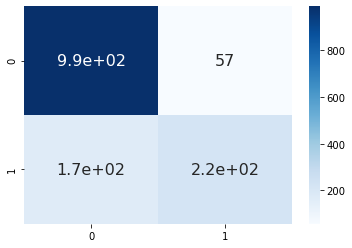

In [16]:
import seaborn as sn
sn.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Get final ANN accuracy over test set

In [17]:
from sklearn.metrics import accuracy_score

print('VALIDATION ACCURACY', accuracy_score(y_test, y_pred))

VALIDATION ACCURACY 0.8415566365531619


## Get SARS data

In [18]:
sars = pd.read_csv('795813_1365687_bundle_archive/input_sars.csv')

sars.head()

parent_protein_id                                        protein_seq  \
0          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
1          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
2          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
3          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   
4          AAU93319  MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...   

   start_position  end_position        peptide_seq  chou_fasman  emini  \
0               1            17  MFIFLLFLTLTSGSDLD        0.887  0.040   
1               1            15    MFIFLLFLTLTSGSD        0.869  0.047   
2               2            10          FIFLLFLTL        0.621  0.042   
3               6            20    LFLTLTSGSDLDRCT        1.021  0.230   
4               9            25  TLTSGSDLDRCTTFDDV        1.089  0.627   

   kolaskar_tongaonkar  parker  isoelectric_point  aromaticity  \
0                1.056  -2.159           5.569763     0.116335   
1                1.056  -2.500           5.569763     0.116335   
2                1.148  -7.467           5.569763     0.116335   
3                1.049   0.927           5.569763     0.116335   
4                1.015   3.165           5.569763     0.116335   

   hydrophobicity  stability  target  
0       -0.061116  33.205116       0  
1       -0.061116  33.205116       0  
2       -0.061116  33.205116       0  
3       -0.061116  33.205116       0  
4       -0.061116  33.205116       0

In [19]:
sars.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

In [20]:
sars.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [22]:
X_sars = sars.drop(columns=['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'])
X_sars.head()

start_position  end_position  chou_fasman  emini  kolaskar_tongaonkar  \
0               1            17        0.887  0.040                1.056   
1               1            15        0.869  0.047                1.056   
2               2            10        0.621  0.042                1.148   
3               6            20        1.021  0.230                1.049   
4               9            25        1.089  0.627                1.015   

   parker  isoelectric_point  aromaticity  hydrophobicity  stability  
0  -2.159           5.569763     0.116335       -0.061116  33.205116  
1  -2.500           5.569763     0.116335       -0.061116  33.205116  
2  -7.467           5.569763     0.116335       -0.061116  33.205116  
3   0.927           5.569763     0.116335       -0.061116  33.205116  
4   3.165           5.569763     0.116335       -0.061116  33.205116

In [25]:
y_sars = sars['target']
y_sars.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [26]:
# Predicting the Test set results

######ERROR -> Need to apply SC

y_sars_pred = grid_search.best_estimator_.model.predict(X_sars)
y_sars_pred = (y_sars_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_sars, y_sars_pred)

cm

array([[285,  95],
       [105,  35]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

print('VALIDATION ACCURACY', accuracy_score(y_sars, y_sars_pred))

VALIDATION ACCURACY 0.6153846153846154
